# LightScope

LightScope is the product of the [NASA Space Apps Challenge 2025](https://www.spaceappschallenge.org/2025/challenges/a-world-away-hunting-for-exoplanets-with-ai/) created by a team in Honolulu, Hawaii


## Team Members
__Curt Dodds__

__Miranda Hawarden-Ogata__


## References
The following sources were used to produce this work:

1 - [Using Kepler Data to Plot a Light Curve notebook](https://spacetelescope.github.io/notebooks/notebooks/MAST/Kepler/Kepler_Lightcurve/kepler_lightcurve.html), __Author: Josie Bunnell, STScI SASP Intern__
2 -

In [24]:
#%matplotlib notebook
%matplotlib inline
import os
import requests
import matplotlib.pyplot as plt
import pandas as pd

from astropy.io import fits
from astropy.table import Table

# Sample some Kepler data from our dataset website

Download each fits file in the manifest to the data directory.

In [25]:
import requests

def download_file(url, saveas):
    """
    Downloads a file from a given URL and saves it locally.

    Args:
        url (str): The URL of the file to download.
        saveas (str): The path and filename to save the downloaded file.
    """
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes

        with open(saveas, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"File downloaded successfully to {saveas}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")



In [26]:

datadir = 'data'
os.makedirs(datadir, exist_ok=True)
base_url = 'http://dtn-itc.ifa.hawaii.edu/exoplt/kepler'

kepid = '010797460'
target = f'kplr{kepid}'
obstimes = [
    '2009166043257',
    '2009259160929',
    '2009350155506',
    '2010078095331',
    '2010174085026',
    '2010265121752',
    '2010355172524',
    '2011073133259',
    '2011177032512',
    '2011271113734',
    '2012004120508',
    '2012088054726',
    '2012179063303',
    '2012277125453',
    '2013011073258',
    '2013098041711',
    '2013131215648',
]

for o in obstimes:
  timestamp = o
  fitsfile = f'{target}-{timestamp}_llc.fits'
  download_file(url=f'{base_url}/{fitsfile}', saveas=f'{datadir}/{fitsfile}')

In [27]:
fits_file = 'data/kplr010797460-2013131215648_llc.fits'
fits_file = 'data/kplr010797460-2011271113734_llc.fits'
#fits_file = 'data/kplr012785320-2013011073258_llc.fits'
hdul = fits.open(fits_file)
hdul.info()


Filename: data/kplr010797460-2011271113734_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    161   4573R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (5, 4)   int32   


In [28]:
data = hdul[1].data
image_data = hdul[0].data

df = pd.DataFrame(data)
df.head()

,TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
0,906.845574,0.002141,39049,9726.791016,3.362324,623.075562,0.240772,NaN,NaN,262144,NaN,NaN,NaN,NaN,968.693485,0.000481,846.675529,0.000480,-0.065744,-0.064208
1,906.866008,0.002142,39050,9728.405273,3.362759,624.030640,0.240611,11245.303711,3.946760,262144,NaN,NaN,NaN,NaN,968.694328,0.000482,846.674506,0.000481,-0.065672,-0.064376
2,906.886442,0.002142,39051,9723.959961,3.362055,621.929626,0.240661,11241.238281,3.946398,262144,NaN,NaN,NaN,NaN,968.694378,0.000481,846.675454,0.000480,-0.065420,-0.064525
3,906.906877,0.002143,39052,9736.177734,3.363246,623.101929,0.240301,11256.203125,3.948281,262144,NaN,NaN,NaN,NaN,968.694992,0.000481,846.674922,0.000480,-0.065118,-0.064938
4,906.927311,0.002143,39053,9733.167969,3.363002,623.411987,0.240328,11253.400391,3.948090,262144,NaN,NaN,NaN,NaN,968.694321,0.000481,846.674671,0.000480,-0.065041,-0.064981


List all of the FITS headers

In [29]:
# Get the header section
header = hdul[0].header
# Iterate through all keywords and values
for key, value in header.items():
    print(f"{key}: {value}")

SIMPLE: True
BITPIX: 8
NAXIS: 0
EXTEND: True
NEXTEND: 2
EXTNAME: PRIMARY
EXTVER: 1
ORIGIN: NASA/Ames
DATE: 2015-10-02
CREATOR: 1044920 FluxExporter2PipelineModule
PROCVER: svn+ssh://murzim/repo/soc/tags/release/9.3.29 r60484
FILEVER: 6.1
TIMVERSN: OGIP/93-003
TELESCOP: Kepler
INSTRUME: Kepler Photometer
OBJECT: KIC 10797460
KEPLERID: 10797460
CHANNEL: 66
SKYGROUP: 18
MODULE: 19
OUTPUT: 2
QUARTER: 10
SEASON: 0
DATA_REL: 25
OBSMODE: long cadence
MISSION: Kepler
TTABLEID: 47
RADESYS: ICRS
RA_OBJ: 291.93423
DEC_OBJ: 48.14165
EQUINOX: 2000.0
PMRA: 0.0
PMDEC: 0.0
PMTOTAL: 0.0
PARALLAX: None
GLON: 80.102268
GLAT: 14.237782
GMAG: 15.89
RMAG: 15.27
IMAG: 15.114
ZMAG: 15.006
D51MAG: 15.636
JMAG: 14.082
HMAG: 13.75
KMAG: 13.647
KEPMAG: 15.347
GRCOLOR: 0.62
JKCOLOR: 0.435
GKCOLOR: 2.243
TEFF: 5850
LOGG: 4.426
FEH: 0.14
EBMINUSV: 0.142
AV: 0.441
RADIUS: 1.04
TMINDEX: 312153317
SCPID: None
CHECKSUM: 59PLA8NJ78NJA8NJ


Now get headers from the Light Curve data section

In [30]:
# Get the header section
header = hdul[1].header
# Iterate through all keywords and values
for key, value in header.items():
    print(f"{key}: {value}")

XTENSION: BINTABLE
BITPIX: 8
NAXIS: 2
NAXIS1: 100
NAXIS2: 4573
PCOUNT: 0
GCOUNT: 1
TFIELDS: 20
TTYPE1: TIME
TFORM1: D
TUNIT1: BJD - 2454833
TDISP1: D14.7
TTYPE2: TIMECORR
TFORM2: E
TUNIT2: d
TDISP2: E13.6
TTYPE3: CADENCENO
TFORM3: J
TDISP3: I10
TTYPE4: SAP_FLUX
TFORM4: E
TUNIT4: e-/s
TDISP4: E14.7
TTYPE5: SAP_FLUX_ERR
TFORM5: E
TUNIT5: e-/s
TDISP5: E14.7
TTYPE6: SAP_BKG
TFORM6: E
TUNIT6: e-/s
TDISP6: E14.7
TTYPE7: SAP_BKG_ERR
TFORM7: E
TUNIT7: e-/s
TDISP7: E14.7
TTYPE8: PDCSAP_FLUX
TFORM8: E
TUNIT8: e-/s
TDISP8: E14.7
TTYPE9: PDCSAP_FLUX_ERR
TFORM9: E
TUNIT9: e-/s
TDISP9: E14.7
TTYPE10: SAP_QUALITY
TFORM10: J
TDISP10: B16.16
TTYPE11: PSF_CENTR1
TFORM11: D
TUNIT11: pixel
TDISP11: F10.5
TTYPE12: PSF_CENTR1_ERR
TFORM12: E
TUNIT12: pixel
TDISP12: E14.7
TTYPE13: PSF_CENTR2
TFORM13: D
TUNIT13: pixel
TDISP13: F10.5
TTYPE14: PSF_CENTR2_ERR
TFORM14: E
TUNIT14: pixel
TDISP14: E14.7
TTYPE15: MOM_CENTR1
TFORM15: D
TUNIT15: pixel
TDISP15: F10.5
TTYPE16: MOM_CENTR1_ERR
TFORM16: E
TUNIT16: pixel
TDIS

# Table data
We can see from NAXIS=2 that hdul[1].data is a 2D table with NAXIS1=100 rows and NAXIS2=1639 columns.

In [31]:
binaryext = hdul[1].data

binarytable = Table(binaryext)
binarytable[1:5]

TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
float64,float32,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
906.866008184501,0.0021416645,39050,9728.405,3.362759,624.03064,0.24061142,11245.304,3.9467602,262144,nan,nan,nan,nan,968.6943280361548,0.0004817937,846.6745061149154,0.00048085698,-0.06567239,-0.06437604
906.8864423495834,0.0021422296,39051,9723.96,3.362055,621.9296,0.24066056,11241.238,3.9463975,262144,nan,nan,nan,nan,968.6943781282573,0.00048136577,846.6754536071777,0.00048049013,-0.065419964,-0.06452534
906.9068766146665,0.0021427947,39052,9736.178,3.363246,623.1019,0.24030107,11256.203,3.9482806,262144,nan,nan,nan,nan,968.6949915257892,0.00048120727,846.6749216490473,0.00048028247,-0.06511788,-0.06493797
906.9273106795081,0.0021433595,39053,9733.168,3.3630023,623.412,0.24032839,11253.4,3.9480898,262144,nan,nan,nan,nan,968.6943211101698,0.00048114933,846.6746705233953,0.00048021495,-0.06504133,-0.06498138


# Plot a light curve
Let's plot the table

First we transform the data in the fits file into 3 numpy arrays, one for the X axis (time) and 2 plots of flux, one uncorrected and one corrected.

In [32]:
def GetArrays(fitsheader, fitsdata):
    # Read in the "BJDREF" which is the time offset of the time array.
    bjdrefi = fitsheader['BJDREFI']
    bjdreff = fitsheader['BJDREFF']

    # Read in the columns of data.
    times = fitsdata['time']
    uncorr_flux = fitsdata['SAP_FLUX']
    corr_flux = fitsdata['PDCSAP_FLUX']
    # Convert the time array to full BJD by adding the offset back in.
    obstime = times + bjdrefi + bjdreff
    return obstime, uncorr_flux, corr_flux

Now we can plot the light curve

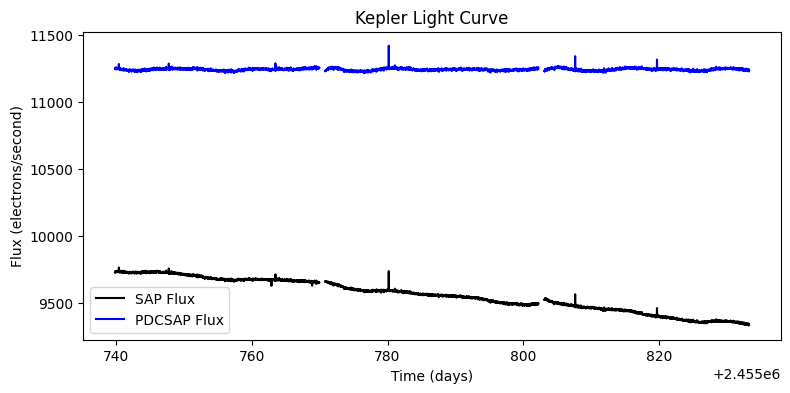

In [33]:
x, y1, y2 = GetArrays(hdul[1].header, hdul[1].data)
plt.figure(figsize=(9,4))

# Plot the time, uncorrected and corrected fluxes.
plt.plot(x, y1, '-k', label='SAP Flux')
plt.plot(x, y2, '-b', label='PDCSAP Flux')

plt.title('Kepler Light Curve')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Flux (electrons/second)')
plt.show()

# Data Reduction

A note about uncorrected and corrected flux. This is taken from the [Kepler Archive Manual](https://archive.stsci.edu/kepler/manuals/archive_manual.pdf#page=20) on page 20:


> The primary purpose of the Presearch Data Conditioning (PDC) module of the Kepler data processing
pipeline is the removal of signatures in the light curves that are correlated with systematic error sources
from the telescope and spacecraft, such as pointing drift, focus changes, and thermal transients. In most
cases PDC achieves its goal of removing these errors while preserving planet transits and other
astrophysically interesting signals. To do this, PDC uses a Bayesian Maximum A Posteriori (MAP)
approach to establish a range of “reasonable” robust fit parameters. These robust fit parameters are then
used to generate a “Bayesian Prior” and a “Bayesian Posterior” probability distribution function which,
when maximized, finds the best fit that simultaneously removes systematic effects reducing the
signal distortion and noise injection that commonly afflicts simple Least Squares (LS) fitting.




# Prepare a training dataset

Our strategy is to sample Kepler long cadence (llc.fits) light curves as 64hr chunks and label the chunks as 1 (planet) or 0 (no planet). Each chunk will be plotted and saved as an image in png format. The keplid number and 1 or 0 will be written to a csv file.

# Exploration Samples
Here are some samples for data exploration.
- 000757450: High S/N
- 010797460: Low S/N

# ETL process to transform fits files into a tensorflow tf.dataset
This process transforms a fits file containing a light curve into X (light curve plot image) and Y (keplid and 1/0 planet/notplanet) training examples in Tensorflow tf.dataset format.

In [11]:
url = 'http://dtn-itc.ifa.hawaii.edu/exoplt/kepler/kepler_catalog.csv'
catalog = 'kepler_catalog.csv'
download_file(url, catalog)

File downloaded successfully to kepler_catalog.csv


In [12]:
!grep -v '^#' kepler_catalog.csv >kepler.csv

In [13]:

koidf = pd.read_csv('kepler.csv')
koidf.head()

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_srad,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,35.8,1.0,5455.0,0.927,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,25.8,2.0,5455.0,0.927,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,76.3,1.0,5853.0,0.868,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,505.6,1.0,5805.0,0.791,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,40.9,1.0,6031.0,1.046,288.75488,48.226200,15.509


In [14]:
koidf.describe()

,loc_rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_srad,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9201.000000,9218.000000,9201.000000,9201.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,259.895001,1.243654,5706.823280,1.728712,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,795.806615,0.664573,796.857947,6.127185,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,1.000000,2661.000000,0.109000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,12.000000,1.000000,5310.000000,0.829000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,23.000000,1.000000,5767.000000,1.000000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,78.000000,1.000000,6112.000000,1.345000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,9054.700000,8.000000,15896.000000,229.908000,301.720760,52.336010,20.003000


# Download the training set manifest

We have downloaded a training set comprising the Kepler confirmed planet llc light curves.
These files are listed in the manifest file kepler_manifest.csv. Let's download the manifest file and inspect its contents.

In [15]:
url = 'http://dtn-itc.ifa.hawaii.edu/exoplt/kepler/kepler_manifest.csv'
manifest = 'kepler_manifest.csv'
download_file(url, manifest)

File downloaded successfully to kepler_manifest.csv


In [16]:
manidf = pd.read_csv('kepler_manifest.csv')
manidf.head()

,kepid,kepobs,kepfits
0,3541946,2012088054726,kplr003541946-2012088054726_llc.fits
1,8616637,2009350155506,kplr008616637-2009350155506_llc.fits
2,7515212,2013098041711,kplr007515212-2013098041711_llc.fits
3,6665695,2012004120508,kplr006665695-2012004120508_llc.fits
4,7626370,2013131215648,kplr007626370-2013131215648_llc.fits


In [17]:
manidf.describe()

,kepid,kepobs
count,2.727300e+04,2.727300e+04
mean,8.155322e+06,2.011157e+12
std,2.616033e+06,1.324492e+09
min,7.574500e+05,2.009131e+12
25%,6.205228e+06,2.010174e+12
50%,8.459663e+06,2.011177e+12
75%,1.026590e+07,2.012179e+12
max,1.283487e+07,2.013131e+12


# Download the fits files that comprise our training set
Now that we have downloaded the manifest, let's download each fits file in the manifest. We will save everything in a "data" subdirectory.

nlc = len(manidf['fitsfile'])
print(f'Downloading {nlc} fits files from {base_url} to ./data')
for ff in range(nlc):
  fitsname = manidf['fitsfile'][ff]
  url = f'{base_url}/{fitsname}'
  #download_file(url, f'data/{fitsname}')

# Generate a file manifest for the available data that we downloaded

def find_fits_files(directory, pattern='*_llc.fits'):
  """
  Walks through a directory and finds files matching a given pattern.

  Args:
    directory (str): The root directory to start walking from.
    pattern (str): The file pattern to match.

  Returns:
    list: A list of paths to the matching files.
  """
  matching_files = []
  for root, _, files in os.walk(directory):
    for file in files:
      if file.endswith(pattern[1:]): # Simple endswith check for this pattern
        #matching_files.append(os.path.join(root, file))
        matching_files.append(file)
  return matching_files


# Test the function
fits_directory = 'data'
os.makedirs('data', exist_ok=True)
fits_files = find_fits_files(fits_directory)
print(f"Found {len(fits_files)} matching files:")
manifest_file = 'manifest.csv'
with open(manifest_file, 'w') as f:
  f.write("kepid,kepobs,kepfits\n")
  for fname in fits_files:
    kepid = fname.split('-')[0][4:]
    kepobs = fname.split('-')[1][:13]
    kepfits = fname
    f.write(f"{kepid},{kepobs},{kepfits}\n")


# Training dataset
Now that we have a manifest file and have downloaded all the fits files we need to read the manifest file and, for each fits file, merge the fits file with each unique exoplanet transit duration from the KOI catalog for that kepler id. This is the training data that we need. We will output this training data in sharded files using the Tensorflow tf.data format.

In [18]:
from KeplerETL import KeplerETL, TrainingSet


os.makedirs('tfdata', exist_ok=True)
etl = KeplerETL('data', 'tfdata', koidf, manidf)

2025-10-06 00:49:16.431980: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
etl.manifest.head()

,kepid,kepler_name,koi_period,kepobs,kepfits
2637,757450,Kepler-75 b,8.884923,2009166043257,kplr000757450-2009166043257_llc.fits
2642,757450,Kepler-75 b,8.884923,2009259160929,kplr000757450-2009259160929_llc.fits
2634,757450,Kepler-75 b,8.884923,2009350155506,kplr000757450-2009350155506_llc.fits
2641,757450,Kepler-75 b,8.884923,2010078095331,kplr000757450-2010078095331_llc.fits
2638,757450,Kepler-75 b,8.884923,2010174085026,kplr000757450-2010174085026_llc.fits


In [20]:
etl.manifest.describe()

,kepid,koi_period,kepobs
count,4.315100e+04,43151.000000,4.315100e+04
mean,8.093370e+06,31.307588,2.011158e+12
std,2.592137e+06,64.940963,1.324363e+09
min,7.574500e+05,0.341842,2.009131e+12
25%,6.125481e+06,5.326673,2.010174e+12
50%,8.351704e+06,11.609085,2.011177e+12
75%,1.015386e+07,27.665285,2.012179e+12
max,1.283487e+07,1071.232624,2.013131e+12


In [21]:
# Load/Prepare the training examples
etl.OpenDataset()

tfdata/train_0.tfr 0
tfdata/valid_0.tfr 0
tfdata/test_0.tfr 0


In [22]:
# Write the training examples to the 'train' directory
etl.Load(TrainingSet.TRAIN)
etl.SaveDataset(TrainingSet.TRAIN, TrainingSet.TRAIN)

Loaded 38835 examples
Saving 38835 manifest entries
18 TrainingExamples for kplr008120608-2012004120508_llc.fits
6 TrainingExamples for kplr009597345-2013131215648_llc.fits
17 TrainingExamples for kplr005357901-2011271113734_llc.fits
18 TrainingExamples for kplr008780959-2012277125453_llc.fits
18 TrainingExamples for kplr009006186-2013011073258_llc.fits
18 TrainingExamples for kplr008552719-2012277125453_llc.fits
17 TrainingExamples for kplr008962094-2012179063303_llc.fits
17 TrainingExamples for kplr010005758-2010355172524_llc.fits
18 TrainingExamples for kplr011121752-2012277125453_llc.fits
15 TrainingExamples for kplr007663405-2012088054726_llc.fits
6 TrainingExamples for kplr008229696-2013131215648_llc.fits
17 TrainingExamples for kplr010070468-2010265121752_llc.fits
18 TrainingExamples for kplr003323887-2012277125453_llc.fits
18 TrainingExamples for kplr008630788-2013011073258_llc.fits
18 TrainingExamples for kplr010189546-2012004120508_llc.fits
6 TrainingExamples for kplr00187105

1 TrainingExamples for kplr011551692-2009131105131_llc.fits
17 TrainingExamples for kplr007960980-2011271113734_llc.fits
18 TrainingExamples for kplr008583696-2011177032512_llc.fits
18 TrainingExamples for kplr009277896-2011177032512_llc.fits
17 TrainingExamples for kplr012252424-2010078095331_llc.fits
17 TrainingExamples for kplr009020160-2010078095331_llc.fits
18 TrainingExamples for kplr003632089-2013011073258_llc.fits
18 TrainingExamples for kplr010910878-2012277125453_llc.fits
17 TrainingExamples for kplr010026502-2009350155506_llc.fits
18 TrainingExamples for kplr012058931-2012277125453_llc.fits
15 TrainingExamples for kplr012116489-2012088054726_llc.fits
6 TrainingExamples for kplr011601584-2013131215648_llc.fits
16 TrainingExamples for kplr009837661-2013098041711_llc.fits
18 TrainingExamples for kplr010722485-2012277125453_llc.fits
17 TrainingExamples for kplr010187017-2009350155506_llc.fits
15 TrainingExamples for kplr008077137-2012088054726_llc.fits
18 TrainingExamples for kp

18 TrainingExamples for kplr008233702-2011177032512_llc.fits
17 TrainingExamples for kplr005436502-2011271113734_llc.fits
16 TrainingExamples for kplr003444588-2013098041711_llc.fits
6 TrainingExamples for kplr004454934-2013131215648_llc.fits
18 TrainingExamples for kplr003962243-2012004120508_llc.fits
17 TrainingExamples for kplr006021275-2009259160929_llc.fits
17 TrainingExamples for kplr010717241-2009259160929_llc.fits
17 TrainingExamples for kplr008025596-2010265121752_llc.fits
15 TrainingExamples for kplr008552719-2012088054726_llc.fits
17 TrainingExamples for kplr010717241-2011271113734_llc.fits
18 TrainingExamples for kplr010130039-2011177032512_llc.fits
18 TrainingExamples for kplr011560897-2012004120508_llc.fits
6 TrainingExamples for kplr005956656-2013131215648_llc.fits
17 TrainingExamples for kplr010965008-2010355172524_llc.fits
18 TrainingExamples for kplr009956082-2013011073258_llc.fits
6 TrainingExamples for kplr004770365-2013131215648_llc.fits
6 TrainingExamples for kplr

15 TrainingExamples for kplr005364071-2012088054726_llc.fits
17 TrainingExamples for kplr005473556-2011271113734_llc.fits
15 TrainingExamples for kplr009753154-2012088054726_llc.fits
18 TrainingExamples for kplr008495415-2010174085026_llc.fits
12 TrainingExamples for kplr005213404-2011073133259_llc.fits
17 TrainingExamples for kplr011129258-2012179063303_llc.fits
17 TrainingExamples for kplr012024120-2009259160929_llc.fits
6 TrainingExamples for kplr010982872-2013131215648_llc.fits
18 TrainingExamples for kplr006850504-2012004120508_llc.fits
17 TrainingExamples for kplr004556468-2009350155506_llc.fits
18 TrainingExamples for kplr010141900-2010174085026_llc.fits
6 TrainingExamples for kplr005184911-2013131215648_llc.fits
6 TrainingExamples for kplr006869184-2009166043257_llc.fits
15 TrainingExamples for kplr008255887-2012088054726_llc.fits
17 TrainingExamples for kplr007620413-2009350155506_llc.fits
18 TrainingExamples for kplr007542813-2011177032512_llc.fits
18 TrainingExamples for kpl

12 TrainingExamples for kplr006020753-2011073133259_llc.fits
17 TrainingExamples for kplr011572193-2012179063303_llc.fits
17 TrainingExamples for kplr008554701-2009350155506_llc.fits
17 TrainingExamples for kplr003239671-2010265121752_llc.fits
6 TrainingExamples for kplr003244792-2009166043257_llc.fits
6 TrainingExamples for kplr008394721-2009166043257_llc.fits
18 TrainingExamples for kplr009958962-2010174085026_llc.fits
16 TrainingExamples for kplr010666592-2013098041711_llc.fits
18 TrainingExamples for kplr008801316-2011177032512_llc.fits
17 TrainingExamples for kplr006690082-2010355172524_llc.fits
17 TrainingExamples for kplr010460984-2010078095331_llc.fits
12 TrainingExamples for kplr008081187-2011073133259_llc.fits
16 TrainingExamples for kplr005371776-2013098041711_llc.fits
17 TrainingExamples for kplr005977470-2010265121752_llc.fits
12 TrainingExamples for kplr007604328-2011073133259_llc.fits
18 TrainingExamples for kplr007778437-2010174085026_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr006878240-2012179063303_llc.fits
18 TrainingExamples for kplr008822366-2010174085026_llc.fits
17 TrainingExamples for kplr006751874-2012179063303_llc.fits
18 TrainingExamples for kplr005881813-2012004120508_llc.fits
18 TrainingExamples for kplr008490993-2012004120508_llc.fits
18 TrainingExamples for kplr005651104-2012277125453_llc.fits
17 TrainingExamples for kplr006289257-2009259160929_llc.fits
18 TrainingExamples for kplr008773015-2012277125453_llc.fits
17 TrainingExamples for kplr006345732-2009259160929_llc.fits
17 TrainingExamples for kplr008773015-2010078095331_llc.fits
16 TrainingExamples for kplr011308499-2013098041711_llc.fits
17 TrainingExamples for kplr009821454-2010078095331_llc.fits
18 TrainingExamples for kplr005938970-2012277125453_llc.fits
17 TrainingExamples for kplr004349452-2010355172524_llc.fits
17 TrainingExamples for kplr009334893-2010265121752_llc.fits
18 TrainingExamples for kplr010910878-2011177032512_llc.fits
17 TrainingExamples for 

15 TrainingExamples for kplr008355239-2012088054726_llc.fits
18 TrainingExamples for kplr003967760-2010174085026_llc.fits
17 TrainingExamples for kplr005774349-2011271113734_llc.fits
6 TrainingExamples for kplr007100673-2009166043257_llc.fits
17 TrainingExamples for kplr006034945-2010355172524_llc.fits
17 TrainingExamples for kplr010000941-2011271113734_llc.fits
15 TrainingExamples for kplr010978763-2012088054726_llc.fits
17 TrainingExamples for kplr009209624-2012179063303_llc.fits
12 TrainingExamples for kplr010793172-2011073133259_llc.fits
6 TrainingExamples for kplr008826878-2009166043257_llc.fits
18 TrainingExamples for kplr006949061-2010174085026_llc.fits
17 TrainingExamples for kplr012418724-2010078095331_llc.fits
17 TrainingExamples for kplr006690836-2010355172524_llc.fits
18 TrainingExamples for kplr011512246-2012277125453_llc.fits
16 TrainingExamples for kplr006690082-2013098041711_llc.fits
18 TrainingExamples for kplr008156120-2010174085026_llc.fits
16 TrainingExamples for kp

18 TrainingExamples for kplr011650401-2012004120508_llc.fits
1 TrainingExamples for kplr010874614-2009131105131_llc.fits
17 TrainingExamples for kplr010187017-2011271113734_llc.fits
18 TrainingExamples for kplr011823054-2010174085026_llc.fits
18 TrainingExamples for kplr009718066-2011177032512_llc.fits
6 TrainingExamples for kplr010005758-2009166043257_llc.fits
12 TrainingExamples for kplr007802719-2011073133259_llc.fits
18 TrainingExamples for kplr012254378-2010174085026_llc.fits
12 TrainingExamples for kplr005531576-2011073133259_llc.fits
6 TrainingExamples for kplr008883329-2013131215648_llc.fits
18 TrainingExamples for kplr009209624-2010174085026_llc.fits
17 TrainingExamples for kplr011177707-2011271113734_llc.fits
17 TrainingExamples for kplr005546691-2010078095331_llc.fits
6 TrainingExamples for kplr004483138-2013131215648_llc.fits
16 TrainingExamples for kplr010227020-2013098041711_llc.fits
6 TrainingExamples for kplr004381429-2013131215648_llc.fits
6 TrainingExamples for kplr00

17 TrainingExamples for kplr011551692-2009350155506_llc.fits
6 TrainingExamples for kplr010810838-2009166043257_llc.fits
16 TrainingExamples for kplr003338885-2013098041711_llc.fits
17 TrainingExamples for kplr011442793-2011271113734_llc.fits
15 TrainingExamples for kplr006382217-2012088054726_llc.fits
15 TrainingExamples for kplr003239945-2012088054726_llc.fits
18 TrainingExamples for kplr011572193-2013011073258_llc.fits
6 TrainingExamples for kplr009349482-2009166043257_llc.fits
17 TrainingExamples for kplr005371777-2009259160929_llc.fits
18 TrainingExamples for kplr010397751-2011177032512_llc.fits
17 TrainingExamples for kplr006272413-2009350155506_llc.fits
17 TrainingExamples for kplr010157458-2011271113734_llc.fits
18 TrainingExamples for kplr011391018-2012277125453_llc.fits
17 TrainingExamples for kplr004164922-2010078095331_llc.fits
6 TrainingExamples for kplr008151055-2013131215648_llc.fits
12 TrainingExamples for kplr005364071-2011073133259_llc.fits
15 TrainingExamples for kpl

17 TrainingExamples for kplr005791986-2010355172524_llc.fits
16 TrainingExamples for kplr008226050-2013098041711_llc.fits
18 TrainingExamples for kplr005956656-2011177032512_llc.fits
17 TrainingExamples for kplr009002278-2011271113734_llc.fits
15 TrainingExamples for kplr006061119-2012088054726_llc.fits
17 TrainingExamples for kplr010453588-2010265121752_llc.fits
12 TrainingExamples for kplr004483138-2011073133259_llc.fits
6 TrainingExamples for kplr005120087-2013131215648_llc.fits
15 TrainingExamples for kplr006444896-2012088054726_llc.fits
6 TrainingExamples for kplr010793172-2013131215648_llc.fits
18 TrainingExamples for kplr009837661-2013011073258_llc.fits
tfdata/train_19.tfr 19000
18 TrainingExamples for kplr008934103-2011177032512_llc.fits
12 TrainingExamples for kplr003114811-2011073133259_llc.fits
17 TrainingExamples for kplr012306058-2010078095331_llc.fits
18 TrainingExamples for kplr004770365-2010174085026_llc.fits
6 TrainingExamples for kplr002716853-2013131215648_llc.fits
1

12 TrainingExamples for kplr006786037-2011073133259_llc.fits
18 TrainingExamples for kplr005621125-2012004120508_llc.fits
18 TrainingExamples for kplr008681833-2012277125453_llc.fits
tfdata/train_21.tfr 21000
12 TrainingExamples for kplr005956342-2011073133259_llc.fits
17 TrainingExamples for kplr004917596-2009259160929_llc.fits
17 TrainingExamples for kplr010328393-2010265121752_llc.fits
17 TrainingExamples for kplr010404582-2011271113734_llc.fits
18 TrainingExamples for kplr007133294-2012277125453_llc.fits
12 TrainingExamples for kplr005299459-2011073133259_llc.fits
18 TrainingExamples for kplr004275191-2011177032512_llc.fits
17 TrainingExamples for kplr010464050-2009350155506_llc.fits
3 TrainingExamples for kplr011284772-2010009091648_llc.fits
17 TrainingExamples for kplr010006581-2011271113734_llc.fits
17 TrainingExamples for kplr012055539-2010355172524_llc.fits
18 TrainingExamples for kplr009412623-2013011073258_llc.fits
15 TrainingExamples for kplr005780885-2012088054726_llc.fits

18 TrainingExamples for kplr008552719-2013011073258_llc.fits
17 TrainingExamples for kplr010489206-2009350155506_llc.fits
15 TrainingExamples for kplr002716801-2012088054726_llc.fits
18 TrainingExamples for kplr005436502-2010174085026_llc.fits
12 TrainingExamples for kplr010723750-2011073133259_llc.fits
18 TrainingExamples for kplr005629538-2013011073258_llc.fits
17 TrainingExamples for kplr008226994-2012179063303_llc.fits
17 TrainingExamples for kplr006046540-2010355172524_llc.fits
15 TrainingExamples for kplr010289119-2012088054726_llc.fits
6 TrainingExamples for kplr006047072-2009166043257_llc.fits
12 TrainingExamples for kplr010925104-2011073133259_llc.fits
12 TrainingExamples for kplr004473613-2011073133259_llc.fits
18 TrainingExamples for kplr009388479-2013011073258_llc.fits
12 TrainingExamples for kplr007269974-2011073133259_llc.fits
1 TrainingExamples for kplr008278371-2009131105131_llc.fits
18 TrainingExamples for kplr008962094-2012004120508_llc.fits
16 TrainingExamples for kp

17 TrainingExamples for kplr009965957-2012179063303_llc.fits
17 TrainingExamples for kplr004862625-2011271113734_llc.fits
17 TrainingExamples for kplr011547513-2011271113734_llc.fits
12 TrainingExamples for kplr010028792-2011073133259_llc.fits
17 TrainingExamples for kplr008644288-2012179063303_llc.fits
17 TrainingExamples for kplr004915638-2009259160929_llc.fits
17 TrainingExamples for kplr009285265-2010355172524_llc.fits
18 TrainingExamples for kplr009467404-2012277125453_llc.fits
17 TrainingExamples for kplr005599774-2010355172524_llc.fits
18 TrainingExamples for kplr008043638-2012277125453_llc.fits
17 TrainingExamples for kplr012301181-2011271113734_llc.fits
16 TrainingExamples for kplr010019065-2013098041711_llc.fits
18 TrainingExamples for kplr005965819-2010174085026_llc.fits
17 TrainingExamples for kplr010513530-2009350155506_llc.fits
17 TrainingExamples for kplr009941859-2009350155506_llc.fits
12 TrainingExamples for kplr004150804-2011073133259_llc.fits
17 TrainingExamples for 

16 TrainingExamples for kplr010872983-2013098041711_llc.fits
17 TrainingExamples for kplr010460984-2012179063303_llc.fits
16 TrainingExamples for kplr007303287-2013098041711_llc.fits
18 TrainingExamples for kplr004989057-2013011073258_llc.fits
18 TrainingExamples for kplr008280511-2011177032512_llc.fits
6 TrainingExamples for kplr010353968-2009166043257_llc.fits
3 TrainingExamples for kplr010910878-2010009091648_llc.fits
18 TrainingExamples for kplr008478994-2011177032512_llc.fits
17 TrainingExamples for kplr011414511-2010078095331_llc.fits
6 TrainingExamples for kplr007118364-2013131215648_llc.fits
17 TrainingExamples for kplr008959839-2011271113734_llc.fits
18 TrainingExamples for kplr002831055-2010174085026_llc.fits
18 TrainingExamples for kplr012116489-2012004120508_llc.fits
17 TrainingExamples for kplr009530945-2010265121752_llc.fits
18 TrainingExamples for kplr006508221-2012004120508_llc.fits
18 TrainingExamples for kplr005980208-2012004120508_llc.fits
1 TrainingExamples for kplr

18 TrainingExamples for kplr011442793-2013011073258_llc.fits
18 TrainingExamples for kplr006619815-2010174085026_llc.fits
18 TrainingExamples for kplr007509886-2013011073258_llc.fits
17 TrainingExamples for kplr010397751-2009350155506_llc.fits
18 TrainingExamples for kplr008282651-2012277125453_llc.fits
17 TrainingExamples for kplr008962094-2009259160929_llc.fits
17 TrainingExamples for kplr003640905-2009259160929_llc.fits
6 TrainingExamples for kplr004831728-2009166043257_llc.fits
12 TrainingExamples for kplr009209624-2011073133259_llc.fits
12 TrainingExamples for kplr006497146-2011073133259_llc.fits
17 TrainingExamples for kplr001724719-2012179063303_llc.fits
18 TrainingExamples for kplr008552719-2012277125453_llc.fits
17 TrainingExamples for kplr010662202-2010078095331_llc.fits
6 TrainingExamples for kplr012470954-2013131215648_llc.fits
18 TrainingExamples for kplr003103227-2012004120508_llc.fits
18 TrainingExamples for kplr004833421-2010174085026_llc.fits
18 TrainingExamples for kp

17 TrainingExamples for kplr004262581-2012179063303_llc.fits
15 TrainingExamples for kplr006383785-2012088054726_llc.fits
6 TrainingExamples for kplr007434875-2013131215648_llc.fits
16 TrainingExamples for kplr008609450-2013098041711_llc.fits
6 TrainingExamples for kplr010130039-2013131215648_llc.fits
17 TrainingExamples for kplr006062088-2010078095331_llc.fits
17 TrainingExamples for kplr008613535-2010265121752_llc.fits
6 TrainingExamples for kplr008292840-2009166043257_llc.fits
12 TrainingExamples for kplr009825174-2011073133259_llc.fits
18 TrainingExamples for kplr012314973-2011177032512_llc.fits
17 TrainingExamples for kplr009489524-2009259160929_llc.fits
17 TrainingExamples for kplr010858832-2010265121752_llc.fits
15 TrainingExamples for kplr010388286-2012088054726_llc.fits
12 TrainingExamples for kplr008753896-2011073133259_llc.fits
17 TrainingExamples for kplr009597345-2009350155506_llc.fits
6 TrainingExamples for kplr006508221-2009166043257_llc.fits
17 TrainingExamples for kplr

17 TrainingExamples for kplr002441495-2010355172524_llc.fits
17 TrainingExamples for kplr010024051-2010078095331_llc.fits
17 TrainingExamples for kplr006842682-2011271113734_llc.fits
18 TrainingExamples for kplr008120608-2012004120508_llc.fits
17 TrainingExamples for kplr009353314-2010355172524_llc.fits
16 TrainingExamples for kplr009787239-2013098041711_llc.fits
18 TrainingExamples for kplr008346392-2012277125453_llc.fits
17 TrainingExamples for kplr008962094-2010078095331_llc.fits
17 TrainingExamples for kplr006924203-2010355172524_llc.fits
17 TrainingExamples for kplr007347246-2011271113734_llc.fits
18 TrainingExamples for kplr011129738-2011177032512_llc.fits
17 TrainingExamples for kplr010795103-2009259160929_llc.fits
17 TrainingExamples for kplr006767840-2009259160929_llc.fits
17 TrainingExamples for kplr005706966-2010265121752_llc.fits
18 TrainingExamples for kplr010975146-2011177032512_llc.fits
16 TrainingExamples for kplr005185897-2013098041711_llc.fits
12 TrainingExamples for 

18 TrainingExamples for kplr009304101-2010174085026_llc.fits
18 TrainingExamples for kplr004072526-2013011073258_llc.fits
17 TrainingExamples for kplr007603200-2012179063303_llc.fits
17 TrainingExamples for kplr012066569-2010265121752_llc.fits
17 TrainingExamples for kplr006125481-2009350155506_llc.fits
17 TrainingExamples for kplr008558011-2010078095331_llc.fits
17 TrainingExamples for kplr008022489-2009259160929_llc.fits
6 TrainingExamples for kplr009589524-2013131215648_llc.fits
6 TrainingExamples for kplr010963242-2009166043257_llc.fits
15 TrainingExamples for kplr003847907-2012088054726_llc.fits
18 TrainingExamples for kplr010601284-2012004120508_llc.fits
17 TrainingExamples for kplr008494410-2009259160929_llc.fits
6 TrainingExamples for kplr008240797-2013131215648_llc.fits
17 TrainingExamples for kplr011624249-2010355172524_llc.fits
17 TrainingExamples for kplr006125481-2010265121752_llc.fits
17 TrainingExamples for kplr005688910-2009259160929_llc.fits
17 TrainingExamples for kpl

17 TrainingExamples for kplr010019708-2012179063303_llc.fits
17 TrainingExamples for kplr010601284-2010355172524_llc.fits
17 TrainingExamples for kplr007977197-2009259160929_llc.fits
15 TrainingExamples for kplr009761882-2012088054726_llc.fits
tfdata/train_38.tfr 38000
17 TrainingExamples for kplr007303253-2010355172524_llc.fits
17 TrainingExamples for kplr005966322-2009259160929_llc.fits
15 TrainingExamples for kplr009008737-2012088054726_llc.fits
18 TrainingExamples for kplr011153539-2010174085026_llc.fits
17 TrainingExamples for kplr006587280-2010078095331_llc.fits
17 TrainingExamples for kplr006665695-2012179063303_llc.fits
12 TrainingExamples for kplr012453581-2011073133259_llc.fits
6 TrainingExamples for kplr009480535-2013131215648_llc.fits
6 TrainingExamples for kplr001865042-2013131215648_llc.fits
12 TrainingExamples for kplr009595827-2011073133259_llc.fits
17 TrainingExamples for kplr007838675-2009259160929_llc.fits
18 TrainingExamples for kplr007955580-2011177032512_llc.fits


17 TrainingExamples for kplr011974540-2010265121752_llc.fits
18 TrainingExamples for kplr001995519-2011177032512_llc.fits
17 TrainingExamples for kplr012404954-2009259160929_llc.fits
17 TrainingExamples for kplr006878240-2010078095331_llc.fits
17 TrainingExamples for kplr005299459-2009350155506_llc.fits
18 TrainingExamples for kplr009347009-2012004120508_llc.fits
18 TrainingExamples for kplr005792202-2012004120508_llc.fits
6 TrainingExamples for kplr010656823-2013131215648_llc.fits
18 TrainingExamples for kplr007672097-2010174085026_llc.fits
17 TrainingExamples for kplr008260902-2011271113734_llc.fits
6 TrainingExamples for kplr006949061-2009166043257_llc.fits
17 TrainingExamples for kplr009009036-2011271113734_llc.fits
17 TrainingExamples for kplr008613535-2010265121752_llc.fits
18 TrainingExamples for kplr006849046-2012277125453_llc.fits
17 TrainingExamples for kplr006071903-2009259160929_llc.fits
15 TrainingExamples for kplr004282872-2012088054726_llc.fits
18 TrainingExamples for kp

18 TrainingExamples for kplr011075429-2013011073258_llc.fits
17 TrainingExamples for kplr006359320-2010078095331_llc.fits
6 TrainingExamples for kplr009963524-2009166043257_llc.fits
1 TrainingExamples for kplr011127479-2009131105131_llc.fits
17 TrainingExamples for kplr005184584-2010265121752_llc.fits
17 TrainingExamples for kplr006587105-2010355172524_llc.fits
16 TrainingExamples for kplr002837111-2013098041711_llc.fits
18 TrainingExamples for kplr009466429-2013011073258_llc.fits
6 TrainingExamples for kplr011253711-2009166043257_llc.fits
6 TrainingExamples for kplr008395660-2009166043257_llc.fits
15 TrainingExamples for kplr009466429-2012088054726_llc.fits
17 TrainingExamples for kplr009471268-2009259160929_llc.fits
15 TrainingExamples for kplr011014932-2012088054726_llc.fits
1 TrainingExamples for kplr012785320-2009131105131_llc.fits
17 TrainingExamples for kplr006528464-2009350155506_llc.fits
17 TrainingExamples for kplr009349482-2011271113734_llc.fits
18 TrainingExamples for kplr0

17 TrainingExamples for kplr010604335-2010078095331_llc.fits
16 TrainingExamples for kplr006359320-2013098041711_llc.fits
1 TrainingExamples for kplr011295426-2009131105131_llc.fits
6 TrainingExamples for kplr007765528-2009166043257_llc.fits
18 TrainingExamples for kplr009790806-2011177032512_llc.fits
18 TrainingExamples for kplr010593626-2012004120508_llc.fits
18 TrainingExamples for kplr005683743-2012004120508_llc.fits
16 TrainingExamples for kplr006803855-2013098041711_llc.fits
12 TrainingExamples for kplr004645174-2011073133259_llc.fits
12 TrainingExamples for kplr012120484-2011073133259_llc.fits
17 TrainingExamples for kplr009146018-2010265121752_llc.fits
6 TrainingExamples for kplr004741126-2009166043257_llc.fits
18 TrainingExamples for kplr011601584-2010174085026_llc.fits
15 TrainingExamples for kplr008226994-2012088054726_llc.fits
6 TrainingExamples for kplr011853878-2013131215648_llc.fits
18 TrainingExamples for kplr008806123-2012004120508_llc.fits
17 TrainingExamples for kplr

15 TrainingExamples for kplr005094751-2012088054726_llc.fits
17 TrainingExamples for kplr011962284-2010078095331_llc.fits
17 TrainingExamples for kplr003128552-2010078095331_llc.fits
16 TrainingExamples for kplr009458613-2013098041711_llc.fits
16 TrainingExamples for kplr011568987-2013098041711_llc.fits
18 TrainingExamples for kplr008962094-2012277125453_llc.fits
17 TrainingExamples for kplr012306058-2012179063303_llc.fits
12 TrainingExamples for kplr010858691-2011073133259_llc.fits
18 TrainingExamples for kplr006060203-2011177032512_llc.fits
16 TrainingExamples for kplr010187017-2013098041711_llc.fits
17 TrainingExamples for kplr009411166-2010355172524_llc.fits
15 TrainingExamples for kplr009002278-2012088054726_llc.fits
17 TrainingExamples for kplr010271806-2009259160929_llc.fits
17 TrainingExamples for kplr011905011-2009350155506_llc.fits
6 TrainingExamples for kplr005219234-2013131215648_llc.fits
18 TrainingExamples for kplr009710326-2013011073258_llc.fits
6 TrainingExamples for kp

6 TrainingExamples for kplr010227020-2009166043257_llc.fits
17 TrainingExamples for kplr009101496-2009259160929_llc.fits
18 TrainingExamples for kplr009447166-2012277125453_llc.fits
6 TrainingExamples for kplr012020218-2009166043257_llc.fits
16 TrainingExamples for kplr004548011-2013098041711_llc.fits
16 TrainingExamples for kplr003353050-2013098041711_llc.fits
17 TrainingExamples for kplr002307415-2010265121752_llc.fits
18 TrainingExamples for kplr002987027-2012277125453_llc.fits
17 TrainingExamples for kplr004633570-2009259160929_llc.fits
18 TrainingExamples for kplr008890150-2012004120508_llc.fits
6 TrainingExamples for kplr004644952-2013131215648_llc.fits
18 TrainingExamples for kplr008890150-2010174085026_llc.fits
15 TrainingExamples for kplr007935997-2012088054726_llc.fits
18 TrainingExamples for kplr006289257-2011177032512_llc.fits
17 TrainingExamples for kplr007295235-2009350155506_llc.fits
16 TrainingExamples for kplr009395719-2013098041711_llc.fits
18 TrainingExamples for kpl

18 TrainingExamples for kplr008505670-2011177032512_llc.fits
17 TrainingExamples for kplr007033233-2010078095331_llc.fits
17 TrainingExamples for kplr009480535-2009350155506_llc.fits
6 TrainingExamples for kplr009478990-2013131215648_llc.fits
17 TrainingExamples for kplr010489206-2009259160929_llc.fits
17 TrainingExamples for kplr011100383-2011271113734_llc.fits
18 TrainingExamples for kplr005272878-2012277125453_llc.fits
17 TrainingExamples for kplr006021275-2011271113734_llc.fits
18 TrainingExamples for kplr009873254-2011177032512_llc.fits
17 TrainingExamples for kplr007259298-2011271113734_llc.fits
17 TrainingExamples for kplr005809890-2009350155506_llc.fits
17 TrainingExamples for kplr010925104-2010265121752_llc.fits
18 TrainingExamples for kplr006365156-2012277125453_llc.fits
12 TrainingExamples for kplr011360805-2011073133259_llc.fits
17 TrainingExamples for kplr010141900-2010265121752_llc.fits
17 TrainingExamples for kplr011754430-2010265121752_llc.fits
17 TrainingExamples for k

16 TrainingExamples for kplr008409295-2013098041711_llc.fits
18 TrainingExamples for kplr010525077-2012004120508_llc.fits
17 TrainingExamples for kplr008288947-2011271113734_llc.fits
17 TrainingExamples for kplr003937519-2012179063303_llc.fits
tfdata/train_53.tfr 53000
18 TrainingExamples for kplr009022166-2013011073258_llc.fits
6 TrainingExamples for kplr011342416-2009166043257_llc.fits
6 TrainingExamples for kplr011401755-2009166043257_llc.fits
6 TrainingExamples for kplr008410727-2009166043257_llc.fits
17 TrainingExamples for kplr006849310-2010355172524_llc.fits
17 TrainingExamples for kplr004142847-2011271113734_llc.fits
18 TrainingExamples for kplr012557548-2011177032512_llc.fits
17 TrainingExamples for kplr005689351-2010265121752_llc.fits
17 TrainingExamples for kplr011410904-2009350155506_llc.fits
18 TrainingExamples for kplr006497146-2011177032512_llc.fits
18 TrainingExamples for kplr011614617-2012004120508_llc.fits
1 TrainingExamples for kplr011565924-2009131105131_llc.fits
12

18 TrainingExamples for kplr010964440-2010174085026_llc.fits
15 TrainingExamples for kplr008041216-2012088054726_llc.fits
18 TrainingExamples for kplr008107380-2010174085026_llc.fits
17 TrainingExamples for kplr009101496-2010355172524_llc.fits
17 TrainingExamples for kplr009458343-2009259160929_llc.fits
18 TrainingExamples for kplr007434875-2013011073258_llc.fits
6 TrainingExamples for kplr005794379-2013131215648_llc.fits
18 TrainingExamples for kplr010213902-2010174085026_llc.fits
17 TrainingExamples for kplr007673192-2010355172524_llc.fits
16 TrainingExamples for kplr008043638-2013098041711_llc.fits
18 TrainingExamples for kplr007455287-2010174085026_llc.fits
17 TrainingExamples for kplr005436502-2010078095331_llc.fits
18 TrainingExamples for kplr011250587-2011177032512_llc.fits
17 TrainingExamples for kplr011288051-2010265121752_llc.fits
12 TrainingExamples for kplr002713049-2011073133259_llc.fits
6 TrainingExamples for kplr005106313-2013131215648_llc.fits
17 TrainingExamples for kp

12 TrainingExamples for kplr006205228-2011073133259_llc.fits
6 TrainingExamples for kplr002165002-2009166043257_llc.fits
17 TrainingExamples for kplr008611781-2012179063303_llc.fits
18 TrainingExamples for kplr001724719-2011177032512_llc.fits
16 TrainingExamples for kplr005709725-2013098041711_llc.fits
18 TrainingExamples for kplr008257205-2012277125453_llc.fits
18 TrainingExamples for kplr010714072-2013011073258_llc.fits
18 TrainingExamples for kplr006428700-2010174085026_llc.fits
6 TrainingExamples for kplr010027247-2013131215648_llc.fits
15 TrainingExamples for kplr007831264-2012088054726_llc.fits
15 TrainingExamples for kplr011560897-2012088054726_llc.fits
17 TrainingExamples for kplr010098844-2009350155506_llc.fits
17 TrainingExamples for kplr006619815-2010355172524_llc.fits
18 TrainingExamples for kplr006949607-2012004120508_llc.fits
12 TrainingExamples for kplr004139816-2011073133259_llc.fits
17 TrainingExamples for kplr010864656-2010355172524_llc.fits
17 TrainingExamples for kp

18 TrainingExamples for kplr004563268-2013011073258_llc.fits
16 TrainingExamples for kplr005384079-2013098041711_llc.fits
12 TrainingExamples for kplr008056665-2011073133259_llc.fits
15 TrainingExamples for kplr009962455-2012088054726_llc.fits
18 TrainingExamples for kplr008552719-2012004120508_llc.fits
18 TrainingExamples for kplr007382313-2011177032512_llc.fits
15 TrainingExamples for kplr010089911-2012088054726_llc.fits
17 TrainingExamples for kplr008630788-2012179063303_llc.fits
17 TrainingExamples for kplr003962243-2010078095331_llc.fits
18 TrainingExamples for kplr008008067-2012277125453_llc.fits
18 TrainingExamples for kplr010000941-2010174085026_llc.fits
17 TrainingExamples for kplr008030148-2011271113734_llc.fits
17 TrainingExamples for kplr010905239-2010265121752_llc.fits
16 TrainingExamples for kplr007825899-2013098041711_llc.fits
16 TrainingExamples for kplr003348082-2013098041711_llc.fits
6 TrainingExamples for kplr011754430-2013131215648_llc.fits
17 TrainingExamples for k

17 TrainingExamples for kplr009873254-2012179063303_llc.fits
12 TrainingExamples for kplr005007345-2011073133259_llc.fits
18 TrainingExamples for kplr011074835-2012277125453_llc.fits
18 TrainingExamples for kplr008167996-2012004120508_llc.fits
18 TrainingExamples for kplr003326377-2010174085026_llc.fits
16 TrainingExamples for kplr008630788-2013098041711_llc.fits
18 TrainingExamples for kplr007582689-2012004120508_llc.fits
18 TrainingExamples for kplr011283615-2013011073258_llc.fits
17 TrainingExamples for kplr010788461-2011271113734_llc.fits
17 TrainingExamples for kplr006448890-2010078095331_llc.fits
18 TrainingExamples for kplr009008737-2012004120508_llc.fits
17 TrainingExamples for kplr005184911-2011271113734_llc.fits
18 TrainingExamples for kplr006442340-2013011073258_llc.fits
16 TrainingExamples for kplr004136466-2013098041711_llc.fits
17 TrainingExamples for kplr006435936-2010265121752_llc.fits
17 TrainingExamples for kplr011709124-2012179063303_llc.fits
6 TrainingExamples for k

6 TrainingExamples for kplr008150320-2009166043257_llc.fits
6 TrainingExamples for kplr007131760-2009166043257_llc.fits
12 TrainingExamples for kplr008282651-2011073133259_llc.fits
17 TrainingExamples for kplr011509504-2012179063303_llc.fits
6 TrainingExamples for kplr009839821-2009166043257_llc.fits
17 TrainingExamples for kplr010329835-2010078095331_llc.fits
18 TrainingExamples for kplr007303287-2011177032512_llc.fits
17 TrainingExamples for kplr010975146-2010078095331_llc.fits
15 TrainingExamples for kplr010271806-2012088054726_llc.fits
17 TrainingExamples for kplr005371776-2012179063303_llc.fits
18 TrainingExamples for kplr005706966-2013011073258_llc.fits
17 TrainingExamples for kplr007668663-2010078095331_llc.fits
17 TrainingExamples for kplr004563268-2010265121752_llc.fits
17 TrainingExamples for kplr009020160-2009350155506_llc.fits
15 TrainingExamples for kplr005546691-2012088054726_llc.fits
17 TrainingExamples for kplr011125613-2010355172524_llc.fits
17 TrainingExamples for kpl

17 TrainingExamples for kplr011100383-2009259160929_llc.fits
17 TrainingExamples for kplr009827149-2012179063303_llc.fits
18 TrainingExamples for kplr006690082-2012277125453_llc.fits
6 TrainingExamples for kplr010793172-2009166043257_llc.fits
17 TrainingExamples for kplr006850504-2010265121752_llc.fits
12 TrainingExamples for kplr009026749-2011073133259_llc.fits
1 TrainingExamples for kplr007269493-2009131105131_llc.fits
17 TrainingExamples for kplr009412760-2010078095331_llc.fits
15 TrainingExamples for kplr006521045-2012088054726_llc.fits
6 TrainingExamples for kplr009851662-2009166043257_llc.fits
6 TrainingExamples for kplr006962109-2013131215648_llc.fits
18 TrainingExamples for kplr012156347-2012004120508_llc.fits
18 TrainingExamples for kplr011187837-2011177032512_llc.fits
18 TrainingExamples for kplr003832474-2011177032512_llc.fits
15 TrainingExamples for kplr010879038-2012088054726_llc.fits
18 TrainingExamples for kplr011074835-2012277125453_llc.fits
18 TrainingExamples for kplr

18 TrainingExamples for kplr007977197-2012277125453_llc.fits
17 TrainingExamples for kplr007440748-2011271113734_llc.fits
18 TrainingExamples for kplr008081905-2012004120508_llc.fits
17 TrainingExamples for kplr010153855-2010078095331_llc.fits
17 TrainingExamples for kplr010350571-2009259160929_llc.fits
12 TrainingExamples for kplr005651104-2011073133259_llc.fits
17 TrainingExamples for kplr006522242-2009350155506_llc.fits
18 TrainingExamples for kplr006678383-2013011073258_llc.fits
1 TrainingExamples for kplr008077137-2009131105131_llc.fits
12 TrainingExamples for kplr003247268-2011073133259_llc.fits
18 TrainingExamples for kplr010709622-2013011073258_llc.fits
18 TrainingExamples for kplr009896558-2013011073258_llc.fits
12 TrainingExamples for kplr008564674-2011073133259_llc.fits
17 TrainingExamples for kplr008561231-2012179063303_llc.fits
18 TrainingExamples for kplr004548011-2010174085026_llc.fits
17 TrainingExamples for kplr006690836-2012179063303_llc.fits
12 TrainingExamples for k

17 TrainingExamples for kplr011568987-2010355172524_llc.fits
18 TrainingExamples for kplr010963065-2012004120508_llc.fits
18 TrainingExamples for kplr003240158-2011177032512_llc.fits
18 TrainingExamples for kplr003118797-2012004120508_llc.fits
18 TrainingExamples for kplr008017703-2013011073258_llc.fits
17 TrainingExamples for kplr011669239-2011271113734_llc.fits
18 TrainingExamples for kplr009827149-2012277125453_llc.fits
18 TrainingExamples for kplr003561464-2010174085026_llc.fits
17 TrainingExamples for kplr001871056-2010355172524_llc.fits
17 TrainingExamples for kplr010020423-2011271113734_llc.fits
18 TrainingExamples for kplr003645438-2012277125453_llc.fits
18 TrainingExamples for kplr008494142-2010174085026_llc.fits
17 TrainingExamples for kplr010934674-2009350155506_llc.fits
tfdata/train_70.tfr 70000
18 TrainingExamples for kplr003548044-2012004120508_llc.fits
17 TrainingExamples for kplr004455231-2010265121752_llc.fits
6 TrainingExamples for kplr012254378-2013131215648_llc.fits

18 TrainingExamples for kplr009941859-2010174085026_llc.fits
12 TrainingExamples for kplr010854555-2011073133259_llc.fits
18 TrainingExamples for kplr009632895-2012277125453_llc.fits
17 TrainingExamples for kplr007033233-2011271113734_llc.fits
tfdata/train_72.tfr 72000
18 TrainingExamples for kplr004770365-2010174085026_llc.fits
6 TrainingExamples for kplr007456001-2009166043257_llc.fits
18 TrainingExamples for kplr007747425-2010174085026_llc.fits
17 TrainingExamples for kplr006291653-2009259160929_llc.fits
17 TrainingExamples for kplr009471268-2012179063303_llc.fits
6 TrainingExamples for kplr011853878-2009166043257_llc.fits
18 TrainingExamples for kplr011337833-2012277125453_llc.fits
16 TrainingExamples for kplr006948054-2013098041711_llc.fits
15 TrainingExamples for kplr011457726-2012088054726_llc.fits
17 TrainingExamples for kplr004862625-2012179063303_llc.fits
6 TrainingExamples for kplr011403389-2013131215648_llc.fits
18 TrainingExamples for kplr007008211-2011177032512_llc.fits
6

tfdata/train_74.tfr 74000
17 TrainingExamples for kplr006716545-2010078095331_llc.fits
17 TrainingExamples for kplr011288051-2011271113734_llc.fits
17 TrainingExamples for kplr010187017-2011271113734_llc.fits
17 TrainingExamples for kplr008552719-2009259160929_llc.fits
17 TrainingExamples for kplr010717220-2011271113734_llc.fits
17 TrainingExamples for kplr008480285-2012179063303_llc.fits
18 TrainingExamples for kplr007102227-2012277125453_llc.fits
18 TrainingExamples for kplr008947520-2010174085026_llc.fits
18 TrainingExamples for kplr010328393-2012277125453_llc.fits
18 TrainingExamples for kplr009872831-2010174085026_llc.fits
17 TrainingExamples for kplr010028792-2009259160929_llc.fits
17 TrainingExamples for kplr007764367-2010355172524_llc.fits
17 TrainingExamples for kplr010793172-2011271113734_llc.fits
17 TrainingExamples for kplr007107802-2009259160929_llc.fits
17 TrainingExamples for kplr006541920-2010078095331_llc.fits
6 TrainingExamples for kplr005972334-2009166043257_llc.fits

17 TrainingExamples for kplr010386922-2010355172524_llc.fits
17 TrainingExamples for kplr009076971-2011271113734_llc.fits
18 TrainingExamples for kplr010601284-2010174085026_llc.fits
17 TrainingExamples for kplr011802615-2011271113734_llc.fits
18 TrainingExamples for kplr010730034-2012277125453_llc.fits
17 TrainingExamples for kplr009654468-2010355172524_llc.fits
18 TrainingExamples for kplr006962109-2012277125453_llc.fits
18 TrainingExamples for kplr010670119-2012277125453_llc.fits
15 TrainingExamples for kplr010730703-2012088054726_llc.fits
6 TrainingExamples for kplr009837661-2013131215648_llc.fits
18 TrainingExamples for kplr009710326-2011177032512_llc.fits
17 TrainingExamples for kplr007582689-2010265121752_llc.fits
17 TrainingExamples for kplr004139816-2012179063303_llc.fits
18 TrainingExamples for kplr009353314-2012004120508_llc.fits
17 TrainingExamples for kplr009701962-2009259160929_llc.fits
17 TrainingExamples for kplr007458762-2010265121752_llc.fits
17 TrainingExamples for k

18 TrainingExamples for kplr003554031-2010174085026_llc.fits
17 TrainingExamples for kplr006936909-2009259160929_llc.fits
17 TrainingExamples for kplr009520838-2010265121752_llc.fits
17 TrainingExamples for kplr011521793-2011271113734_llc.fits
17 TrainingExamples for kplr008689373-2010078095331_llc.fits
15 TrainingExamples for kplr010386922-2012088054726_llc.fits
18 TrainingExamples for kplr005436502-2013011073258_llc.fits
17 TrainingExamples for kplr001996180-2010265121752_llc.fits
6 TrainingExamples for kplr007603200-2013131215648_llc.fits
15 TrainingExamples for kplr004349452-2012088054726_llc.fits
17 TrainingExamples for kplr007901948-2010355172524_llc.fits
18 TrainingExamples for kplr005792202-2010174085026_llc.fits
17 TrainingExamples for kplr008161561-2010355172524_llc.fits
12 TrainingExamples for kplr002716801-2011073133259_llc.fits
17 TrainingExamples for kplr004349452-2011271113734_llc.fits
17 TrainingExamples for kplr010872983-2010265121752_llc.fits
18 TrainingExamples for k

18 TrainingExamples for kplr004473226-2013011073258_llc.fits
15 TrainingExamples for kplr002989404-2012088054726_llc.fits
18 TrainingExamples for kplr009718066-2013011073258_llc.fits
17 TrainingExamples for kplr006587280-2009259160929_llc.fits
16 TrainingExamples for kplr004458082-2013098041711_llc.fits
17 TrainingExamples for kplr009967771-2010078095331_llc.fits
18 TrainingExamples for kplr005299459-2011177032512_llc.fits
17 TrainingExamples for kplr007951018-2012179063303_llc.fits
17 TrainingExamples for kplr010397751-2012179063303_llc.fits
18 TrainingExamples for kplr009285265-2012277125453_llc.fits
18 TrainingExamples for kplr008394721-2013011073258_llc.fits
17 TrainingExamples for kplr003558849-2010078095331_llc.fits
18 TrainingExamples for kplr009950612-2012004120508_llc.fits
6 TrainingExamples for kplr009893318-2009166043257_llc.fits
15 TrainingExamples for kplr008959839-2012088054726_llc.fits
15 TrainingExamples for kplr002849805-2012088054726_llc.fits
16 TrainingExamples for k

16 TrainingExamples for kplr009366617-2013098041711_llc.fits
17 TrainingExamples for kplr005219234-2010265121752_llc.fits
18 TrainingExamples for kplr009823457-2011177032512_llc.fits
16 TrainingExamples for kplr008552719-2013098041711_llc.fits
15 TrainingExamples for kplr006462863-2012088054726_llc.fits
17 TrainingExamples for kplr007626370-2012179063303_llc.fits
18 TrainingExamples for kplr006774880-2012004120508_llc.fits
17 TrainingExamples for kplr011512246-2009259160929_llc.fits
12 TrainingExamples for kplr005966322-2011073133259_llc.fits
18 TrainingExamples for kplr012206313-2012004120508_llc.fits
18 TrainingExamples for kplr005651104-2011177032512_llc.fits
18 TrainingExamples for kplr004831728-2011177032512_llc.fits
17 TrainingExamples for kplr011360805-2012179063303_llc.fits
18 TrainingExamples for kplr007831264-2013011073258_llc.fits
17 TrainingExamples for kplr007046804-2010078095331_llc.fits
18 TrainingExamples for kplr006444896-2013011073258_llc.fits
16 TrainingExamples for 

6 TrainingExamples for kplr010020423-2013131215648_llc.fits
17 TrainingExamples for kplr008025596-2012179063303_llc.fits
17 TrainingExamples for kplr009757613-2011271113734_llc.fits
17 TrainingExamples for kplr008015907-2010078095331_llc.fits
6 TrainingExamples for kplr006587105-2009166043257_llc.fits
17 TrainingExamples for kplr006768394-2012179063303_llc.fits
18 TrainingExamples for kplr005735762-2012004120508_llc.fits
17 TrainingExamples for kplr010965008-2010265121752_llc.fits
17 TrainingExamples for kplr012784167-2012179063303_llc.fits
18 TrainingExamples for kplr011414511-2012004120508_llc.fits
17 TrainingExamples for kplr009875711-2009259160929_llc.fits
16 TrainingExamples for kplr009451706-2013098041711_llc.fits
17 TrainingExamples for kplr008099138-2009259160929_llc.fits
18 TrainingExamples for kplr008008067-2013011073258_llc.fits
6 TrainingExamples for kplr011337566-2013131215648_llc.fits
6 TrainingExamples for kplr010730034-2013131215648_llc.fits
6 TrainingExamples for kplr0

15 TrainingExamples for kplr011090765-2012088054726_llc.fits
6 TrainingExamples for kplr009839821-2013131215648_llc.fits
18 TrainingExamples for kplr012252424-2012004120508_llc.fits
16 TrainingExamples for kplr008950853-2013098041711_llc.fits
17 TrainingExamples for kplr006685526-2009350155506_llc.fits
15 TrainingExamples for kplr004757437-2012088054726_llc.fits
17 TrainingExamples for kplr002142522-2010355172524_llc.fits
17 TrainingExamples for kplr010663396-2009259160929_llc.fits
15 TrainingExamples for kplr011401767-2012088054726_llc.fits
17 TrainingExamples for kplr007509886-2010355172524_llc.fits
17 TrainingExamples for kplr010863608-2009259160929_llc.fits
18 TrainingExamples for kplr006922244-2012004120508_llc.fits
15 TrainingExamples for kplr010513530-2012088054726_llc.fits
17 TrainingExamples for kplr006690082-2012179063303_llc.fits
17 TrainingExamples for kplr002307415-2011271113734_llc.fits
18 TrainingExamples for kplr006294819-2010174085026_llc.fits
18 TrainingExamples for k

15 TrainingExamples for kplr005706595-2012088054726_llc.fits
17 TrainingExamples for kplr006497146-2011271113734_llc.fits
12 TrainingExamples for kplr003354846-2011073133259_llc.fits
18 TrainingExamples for kplr006442340-2011177032512_llc.fits
18 TrainingExamples for kplr010513530-2012004120508_llc.fits
17 TrainingExamples for kplr010909127-2012179063303_llc.fits
15 TrainingExamples for kplr012056139-2012088054726_llc.fits
17 TrainingExamples for kplr009230021-2010078095331_llc.fits
16 TrainingExamples for kplr003118797-2013098041711_llc.fits
18 TrainingExamples for kplr006948054-2011177032512_llc.fits
6 TrainingExamples for kplr007663405-2009166043257_llc.fits
17 TrainingExamples for kplr006365156-2010265121752_llc.fits
12 TrainingExamples for kplr001871056-2011073133259_llc.fits
12 TrainingExamples for kplr007603200-2011073133259_llc.fits
6 TrainingExamples for kplr010002866-2009166043257_llc.fits
18 TrainingExamples for kplr010587105-2012277125453_llc.fits
18 TrainingExamples for kp

18 TrainingExamples for kplr004645174-2013011073258_llc.fits
18 TrainingExamples for kplr006152974-2012277125453_llc.fits
17 TrainingExamples for kplr006948054-2012179063303_llc.fits
6 TrainingExamples for kplr010874614-2009166043257_llc.fits
18 TrainingExamples for kplr005526717-2011177032512_llc.fits
18 TrainingExamples for kplr011192998-2011177032512_llc.fits
12 TrainingExamples for kplr005640085-2011073133259_llc.fits
18 TrainingExamples for kplr009451706-2011177032512_llc.fits
12 TrainingExamples for kplr002716853-2011073133259_llc.fits
tfdata/train_91.tfr 91000
15 TrainingExamples for kplr009775938-2012088054726_llc.fits
18 TrainingExamples for kplr009471268-2012004120508_llc.fits
12 TrainingExamples for kplr008478994-2011073133259_llc.fits
17 TrainingExamples for kplr003832474-2009259160929_llc.fits
17 TrainingExamples for kplr010684670-2011271113734_llc.fits
17 TrainingExamples for kplr008874090-2012179063303_llc.fits
17 TrainingExamples for kplr008344004-2011271113734_llc.fits

17 TrainingExamples for kplr004346178-2010265121752_llc.fits
6 TrainingExamples for kplr004072526-2013131215648_llc.fits
18 TrainingExamples for kplr006768394-2011177032512_llc.fits
15 TrainingExamples for kplr010676014-2012088054726_llc.fits
17 TrainingExamples for kplr008689373-2010355172524_llc.fits
1 TrainingExamples for kplr005966322-2009131105131_llc.fits
17 TrainingExamples for kplr001725016-2012179063303_llc.fits
tfdata/train_93.tfr 93000
12 TrainingExamples for kplr007134976-2011073133259_llc.fits
18 TrainingExamples for kplr009085563-2012277125453_llc.fits
15 TrainingExamples for kplr006383785-2012088054726_llc.fits
18 TrainingExamples for kplr007100673-2011177032512_llc.fits
17 TrainingExamples for kplr012068975-2011271113734_llc.fits
18 TrainingExamples for kplr007047363-2012277125453_llc.fits
17 TrainingExamples for kplr006497146-2010265121752_llc.fits
18 TrainingExamples for kplr009471268-2012277125453_llc.fits
18 TrainingExamples for kplr009631762-2010174085026_llc.fits


17 TrainingExamples for kplr007419318-2010078095331_llc.fits
17 TrainingExamples for kplr008240797-2010078095331_llc.fits
12 TrainingExamples for kplr003656121-2011073133259_llc.fits
6 TrainingExamples for kplr006508221-2009166043257_llc.fits
17 TrainingExamples for kplr009141746-2012179063303_llc.fits
17 TrainingExamples for kplr010617017-2010265121752_llc.fits
17 TrainingExamples for kplr001718189-2009259160929_llc.fits
6 TrainingExamples for kplr003745690-2013131215648_llc.fits
17 TrainingExamples for kplr006964929-2011271113734_llc.fits
15 TrainingExamples for kplr005436502-2012088054726_llc.fits
17 TrainingExamples for kplr007100673-2009259160929_llc.fits
17 TrainingExamples for kplr005095269-2009259160929_llc.fits
17 TrainingExamples for kplr008229458-2009259160929_llc.fits
17 TrainingExamples for kplr009517393-2011271113734_llc.fits
17 TrainingExamples for kplr004466677-2012179063303_llc.fits
15 TrainingExamples for kplr011359879-2012088054726_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr004249725-2010265121752_llc.fits
18 TrainingExamples for kplr008611832-2012004120508_llc.fits
12 TrainingExamples for kplr010068659-2011073133259_llc.fits
16 TrainingExamples for kplr011709124-2013098041711_llc.fits
6 TrainingExamples for kplr010158729-2009166043257_llc.fits
17 TrainingExamples for kplr009787239-2010078095331_llc.fits
17 TrainingExamples for kplr007288306-2012179063303_llc.fits
6 TrainingExamples for kplr010089911-2009166043257_llc.fits
18 TrainingExamples for kplr010653179-2012277125453_llc.fits
17 TrainingExamples for kplr006936909-2011271113734_llc.fits
18 TrainingExamples for kplr011650401-2013011073258_llc.fits
15 TrainingExamples for kplr008760040-2012088054726_llc.fits
17 TrainingExamples for kplr008105398-2010078095331_llc.fits
12 TrainingExamples for kplr011968463-2011073133259_llc.fits
18 TrainingExamples for kplr006934291-2012004120508_llc.fits
18 TrainingExamples for kplr010063802-2012004120508_llc.fits
6 TrainingExamples for kpl

17 TrainingExamples for kplr010872983-2012179063303_llc.fits
16 TrainingExamples for kplr010004738-2013098041711_llc.fits
6 TrainingExamples for kplr010187017-2013131215648_llc.fits
18 TrainingExamples for kplr006696580-2012277125453_llc.fits
12 TrainingExamples for kplr011361646-2011073133259_llc.fits
12 TrainingExamples for kplr010577994-2011073133259_llc.fits
18 TrainingExamples for kplr008822216-2013011073258_llc.fits
12 TrainingExamples for kplr010670119-2011073133259_llc.fits
18 TrainingExamples for kplr009209624-2013011073258_llc.fits
12 TrainingExamples for kplr005794570-2011073133259_llc.fits
17 TrainingExamples for kplr002307415-2012179063303_llc.fits
16 TrainingExamples for kplr011015323-2013098041711_llc.fits
17 TrainingExamples for kplr005774349-2009259160929_llc.fits
18 TrainingExamples for kplr005371776-2010174085026_llc.fits
17 TrainingExamples for kplr008832512-2010265121752_llc.fits
17 TrainingExamples for kplr006026924-2009350155506_llc.fits
17 TrainingExamples for k

16 TrainingExamples for kplr010713616-2013098041711_llc.fits
18 TrainingExamples for kplr007870390-2010174085026_llc.fits
17 TrainingExamples for kplr009636135-2011271113734_llc.fits
17 TrainingExamples for kplr012470844-2010265121752_llc.fits
18 TrainingExamples for kplr009845898-2010174085026_llc.fits
17 TrainingExamples for kplr010328458-2011271113734_llc.fits
17 TrainingExamples for kplr010353968-2012179063303_llc.fits
6 TrainingExamples for kplr010386922-2009166043257_llc.fits
18 TrainingExamples for kplr005792202-2013011073258_llc.fits
15 TrainingExamples for kplr008490993-2012088054726_llc.fits
6 TrainingExamples for kplr012154526-2013131215648_llc.fits
18 TrainingExamples for kplr005972334-2012004120508_llc.fits
17 TrainingExamples for kplr004142847-2009350155506_llc.fits
17 TrainingExamples for kplr006265792-2010265121752_llc.fits
18 TrainingExamples for kplr012024120-2012004120508_llc.fits
17 TrainingExamples for kplr008866137-2010265121752_llc.fits
17 TrainingExamples for kp

16 TrainingExamples for kplr009941662-2013098041711_llc.fits
18 TrainingExamples for kplr006677841-2012277125453_llc.fits
17 TrainingExamples for kplr010271806-2009350155506_llc.fits
6 TrainingExamples for kplr004164922-2009166043257_llc.fits
17 TrainingExamples for kplr008559644-2010265121752_llc.fits
18 TrainingExamples for kplr008022489-2011177032512_llc.fits
12 TrainingExamples for kplr006937692-2011073133259_llc.fits
15 TrainingExamples for kplr009573685-2012088054726_llc.fits
18 TrainingExamples for kplr007703955-2012277125453_llc.fits
17 TrainingExamples for kplr008780959-2012179063303_llc.fits
18 TrainingExamples for kplr010271806-2012004120508_llc.fits
18 TrainingExamples for kplr008099138-2012004120508_llc.fits
6 TrainingExamples for kplr008478994-2013131215648_llc.fits
17 TrainingExamples for kplr011709124-2010355172524_llc.fits
18 TrainingExamples for kplr007347246-2012277125453_llc.fits
17 TrainingExamples for kplr012008872-2012179063303_llc.fits
17 TrainingExamples for kp

12 TrainingExamples for kplr008806123-2011073133259_llc.fits
16 TrainingExamples for kplr007047363-2013098041711_llc.fits
17 TrainingExamples for kplr011250587-2010355172524_llc.fits
17 TrainingExamples for kplr011192998-2010265121752_llc.fits
18 TrainingExamples for kplr006803855-2011177032512_llc.fits
6 TrainingExamples for kplr009664142-2009166043257_llc.fits
16 TrainingExamples for kplr006849310-2013098041711_llc.fits
18 TrainingExamples for kplr006975129-2012004120508_llc.fits
17 TrainingExamples for kplr006948054-2010265121752_llc.fits
18 TrainingExamples for kplr008077137-2012004120508_llc.fits
17 TrainingExamples for kplr012301181-2010078095331_llc.fits
6 TrainingExamples for kplr006152974-2013131215648_llc.fits
18 TrainingExamples for kplr005640085-2011177032512_llc.fits
17 TrainingExamples for kplr007815744-2009350155506_llc.fits
6 TrainingExamples for kplr009896558-2013131215648_llc.fits
18 TrainingExamples for kplr008081239-2012277125453_llc.fits
12 TrainingExamples for kpl

18 TrainingExamples for kplr007040629-2013011073258_llc.fits
6 TrainingExamples for kplr001995519-2013131215648_llc.fits
17 TrainingExamples for kplr009349482-2010078095331_llc.fits
18 TrainingExamples for kplr011601584-2012277125453_llc.fits
18 TrainingExamples for kplr008753896-2011177032512_llc.fits
6 TrainingExamples for kplr003120904-2013131215648_llc.fits
17 TrainingExamples for kplr006619815-2012179063303_llc.fits
6 TrainingExamples for kplr005613330-2013131215648_llc.fits
17 TrainingExamples for kplr011860395-2010355172524_llc.fits
18 TrainingExamples for kplr003338885-2011177032512_llc.fits
17 TrainingExamples for kplr008229696-2012179063303_llc.fits
17 TrainingExamples for kplr007366258-2010355172524_llc.fits
1 TrainingExamples for kplr012401863-2009131105131_llc.fits
6 TrainingExamples for kplr009656252-2013131215648_llc.fits
18 TrainingExamples for kplr009886255-2012004120508_llc.fits
6 TrainingExamples for kplr009963524-2009166043257_llc.fits
17 TrainingExamples for kplr00

17 TrainingExamples for kplr012314973-2009350155506_llc.fits
18 TrainingExamples for kplr008222813-2011177032512_llc.fits
18 TrainingExamples for kplr007871954-2012004120508_llc.fits
12 TrainingExamples for kplr011253711-2011073133259_llc.fits
tfdata/train_110.tfr 110000
18 TrainingExamples for kplr008644365-2012277125453_llc.fits
17 TrainingExamples for kplr008630788-2010265121752_llc.fits
18 TrainingExamples for kplr009895006-2012277125453_llc.fits
17 TrainingExamples for kplr009963524-2011271113734_llc.fits
18 TrainingExamples for kplr007047824-2012277125453_llc.fits
17 TrainingExamples for kplr006678383-2010078095331_llc.fits
17 TrainingExamples for kplr004164922-2009259160929_llc.fits
18 TrainingExamples for kplr005864975-2012277125453_llc.fits
17 TrainingExamples for kplr008760040-2012179063303_llc.fits
1 TrainingExamples for kplr005202905-2009131105131_llc.fits
18 TrainingExamples for kplr011295426-2010174085026_llc.fits
17 TrainingExamples for kplr010166274-2012179063303_llc.fi

17 TrainingExamples for kplr008780959-2009350155506_llc.fits
18 TrainingExamples for kplr008874090-2013011073258_llc.fits
15 TrainingExamples for kplr009837685-2012088054726_llc.fits
17 TrainingExamples for kplr007216284-2010355172524_llc.fits
12 TrainingExamples for kplr006937402-2011073133259_llc.fits
18 TrainingExamples for kplr003546060-2013011073258_llc.fits
17 TrainingExamples for kplr006949061-2010265121752_llc.fits
17 TrainingExamples for kplr004077526-2012179063303_llc.fits
6 TrainingExamples for kplr008226050-2009166043257_llc.fits
17 TrainingExamples for kplr006383821-2010355172524_llc.fits
17 TrainingExamples for kplr004043190-2012179063303_llc.fits
17 TrainingExamples for kplr005124667-2012179063303_llc.fits
17 TrainingExamples for kplr009458613-2010265121752_llc.fits
6 TrainingExamples for kplr006444896-2013131215648_llc.fits
17 TrainingExamples for kplr005177104-2011271113734_llc.fits
6 TrainingExamples for kplr011259686-2013131215648_llc.fits
18 TrainingExamples for kpl

17 TrainingExamples for kplr009880190-2010265121752_llc.fits
18 TrainingExamples for kplr003645438-2013011073258_llc.fits
18 TrainingExamples for kplr009285568-2012004120508_llc.fits
16 TrainingExamples for kplr009763348-2013098041711_llc.fits
17 TrainingExamples for kplr009100953-2012179063303_llc.fits
16 TrainingExamples for kplr009529744-2013098041711_llc.fits
18 TrainingExamples for kplr003116412-2013011073258_llc.fits
17 TrainingExamples for kplr007102227-2010355172524_llc.fits
17 TrainingExamples for kplr008760040-2009259160929_llc.fits
6 TrainingExamples for kplr010601284-2013131215648_llc.fits
15 TrainingExamples for kplr011656721-2012088054726_llc.fits
6 TrainingExamples for kplr003120355-2013131215648_llc.fits
17 TrainingExamples for kplr011449844-2010265121752_llc.fits
18 TrainingExamples for kplr009471268-2012004120508_llc.fits
16 TrainingExamples for kplr008081905-2013098041711_llc.fits
17 TrainingExamples for kplr005866724-2009259160929_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr005965819-2010078095331_llc.fits
17 TrainingExamples for kplr005959753-2009259160929_llc.fits
17 TrainingExamples for kplr005791986-2011271113734_llc.fits
15 TrainingExamples for kplr006922244-2012088054726_llc.fits
17 TrainingExamples for kplr009696358-2011271113734_llc.fits
18 TrainingExamples for kplr008008067-2011177032512_llc.fits
6 TrainingExamples for kplr010057494-2013131215648_llc.fits
17 TrainingExamples for kplr008611832-2009259160929_llc.fits
17 TrainingExamples for kplr004139816-2010078095331_llc.fits
17 TrainingExamples for kplr005301750-2010355172524_llc.fits
12 TrainingExamples for kplr006851425-2011073133259_llc.fits
17 TrainingExamples for kplr007455981-2011271113734_llc.fits
17 TrainingExamples for kplr005689351-2010078095331_llc.fits
16 TrainingExamples for kplr009642292-2013098041711_llc.fits
17 TrainingExamples for kplr010718726-2012179063303_llc.fits
18 TrainingExamples for kplr012055539-2011177032512_llc.fits
18 TrainingExamples for k

15 TrainingExamples for kplr012302530-2012088054726_llc.fits
17 TrainingExamples for kplr007673192-2010078095331_llc.fits
17 TrainingExamples for kplr008017703-2009350155506_llc.fits
16 TrainingExamples for kplr005202905-2013098041711_llc.fits
18 TrainingExamples for kplr003642289-2011177032512_llc.fits
12 TrainingExamples for kplr007445445-2011073133259_llc.fits
17 TrainingExamples for kplr007595157-2009350155506_llc.fits
6 TrainingExamples for kplr007373451-2009166043257_llc.fits
18 TrainingExamples for kplr004242692-2010174085026_llc.fits
17 TrainingExamples for kplr009015738-2010078095331_llc.fits
18 TrainingExamples for kplr007663691-2011177032512_llc.fits
18 TrainingExamples for kplr006436029-2012004120508_llc.fits
18 TrainingExamples for kplr005219234-2012004120508_llc.fits
17 TrainingExamples for kplr009715631-2010355172524_llc.fits
17 TrainingExamples for kplr009183378-2010265121752_llc.fits
17 TrainingExamples for kplr011611600-2012179063303_llc.fits
12 TrainingExamples for k

18 TrainingExamples for kplr007287995-2013011073258_llc.fits
18 TrainingExamples for kplr008121310-2011177032512_llc.fits
18 TrainingExamples for kplr004263293-2010174085026_llc.fits
6 TrainingExamples for kplr007107802-2013131215648_llc.fits
17 TrainingExamples for kplr008168187-2009350155506_llc.fits
3 TrainingExamples for kplr011389771-2010009091648_llc.fits
15 TrainingExamples for kplr009650808-2012088054726_llc.fits
17 TrainingExamples for kplr012068975-2010078095331_llc.fits
12 TrainingExamples for kplr009458343-2011073133259_llc.fits
18 TrainingExamples for kplr010187017-2012277125453_llc.fits
17 TrainingExamples for kplr006878240-2009350155506_llc.fits
17 TrainingExamples for kplr010875245-2010078095331_llc.fits
17 TrainingExamples for kplr008168187-2012179063303_llc.fits
6 TrainingExamples for kplr008780959-2013131215648_llc.fits
18 TrainingExamples for kplr011754553-2012004120508_llc.fits
18 TrainingExamples for kplr008355239-2012004120508_llc.fits
17 TrainingExamples for kpl

6 TrainingExamples for kplr008947520-2009166043257_llc.fits
1 TrainingExamples for kplr006365156-2009131105131_llc.fits
6 TrainingExamples for kplr007131760-2013131215648_llc.fits
18 TrainingExamples for kplr008564587-2013011073258_llc.fits
17 TrainingExamples for kplr011810124-2009259160929_llc.fits
16 TrainingExamples for kplr003541946-2013098041711_llc.fits
6 TrainingExamples for kplr008802165-2013131215648_llc.fits
18 TrainingExamples for kplr006962977-2010174085026_llc.fits
17 TrainingExamples for kplr011773022-2010265121752_llc.fits
16 TrainingExamples for kplr010271806-2013098041711_llc.fits
17 TrainingExamples for kplr007382313-2010265121752_llc.fits
18 TrainingExamples for kplr005871985-2013011073258_llc.fits
18 TrainingExamples for kplr009579641-2011177032512_llc.fits
17 TrainingExamples for kplr006287313-2011271113734_llc.fits
18 TrainingExamples for kplr009958962-2010174085026_llc.fits
17 TrainingExamples for kplr010489206-2010078095331_llc.fits
17 TrainingExamples for kplr

15 TrainingExamples for kplr008168187-2012088054726_llc.fits
1 TrainingExamples for kplr009631995-2009131105131_llc.fits
17 TrainingExamples for kplr008630788-2010355172524_llc.fits
17 TrainingExamples for kplr012735740-2010265121752_llc.fits
15 TrainingExamples for kplr007366258-2012088054726_llc.fits
17 TrainingExamples for kplr009872283-2011271113734_llc.fits
17 TrainingExamples for kplr007100673-2010355172524_llc.fits
15 TrainingExamples for kplr005272878-2012088054726_llc.fits
12 TrainingExamples for kplr006948054-2011073133259_llc.fits
6 TrainingExamples for kplr007838675-2013131215648_llc.fits
17 TrainingExamples for kplr004833421-2010355172524_llc.fits
18 TrainingExamples for kplr005977470-2012277125453_llc.fits
tfdata/train_125.tfr 125000
16 TrainingExamples for kplr004278221-2013098041711_llc.fits
17 TrainingExamples for kplr005735762-2010265121752_llc.fits
6 TrainingExamples for kplr008036287-2013131215648_llc.fits
17 TrainingExamples for kplr009139084-2010265121752_llc.fits

17 TrainingExamples for kplr011657614-2011271113734_llc.fits
17 TrainingExamples for kplr008344004-2012179063303_llc.fits
18 TrainingExamples for kplr008017703-2013011073258_llc.fits
17 TrainingExamples for kplr011568987-2012179063303_llc.fits
15 TrainingExamples for kplr010271806-2012088054726_llc.fits
12 TrainingExamples for kplr010340423-2011073133259_llc.fits
17 TrainingExamples for kplr006425957-2011271113734_llc.fits
18 TrainingExamples for kplr011177707-2011177032512_llc.fits
17 TrainingExamples for kplr010875245-2011271113734_llc.fits
18 TrainingExamples for kplr011017901-2012004120508_llc.fits
12 TrainingExamples for kplr008240904-2011073133259_llc.fits
18 TrainingExamples for kplr011754430-2012004120508_llc.fits
17 TrainingExamples for kplr006267535-2009259160929_llc.fits
17 TrainingExamples for kplr009549648-2009259160929_llc.fits
16 TrainingExamples for kplr009353742-2013098041711_llc.fits
17 TrainingExamples for kplr008478994-2010078095331_llc.fits
18 TrainingExamples for 

18 TrainingExamples for kplr002985767-2013011073258_llc.fits
18 TrainingExamples for kplr004770617-2013011073258_llc.fits
18 TrainingExamples for kplr009489524-2010174085026_llc.fits
17 TrainingExamples for kplr011512246-2010078095331_llc.fits
18 TrainingExamples for kplr012116380-2011177032512_llc.fits
6 TrainingExamples for kplr004275191-2009166043257_llc.fits
18 TrainingExamples for kplr008395660-2010174085026_llc.fits
17 TrainingExamples for kplr009651234-2011271113734_llc.fits
15 TrainingExamples for kplr007216284-2012088054726_llc.fits
6 TrainingExamples for kplr003645438-2013131215648_llc.fits
17 TrainingExamples for kplr011754553-2009259160929_llc.fits
6 TrainingExamples for kplr005185897-2013131215648_llc.fits
18 TrainingExamples for kplr007877496-2012004120508_llc.fits
6 TrainingExamples for kplr009390653-2013131215648_llc.fits
17 TrainingExamples for kplr006451936-2010355172524_llc.fits
17 TrainingExamples for kplr003447722-2010355172524_llc.fits
17 TrainingExamples for kplr

17 TrainingExamples for kplr008017703-2012179063303_llc.fits
12 TrainingExamples for kplr009285568-2011073133259_llc.fits
6 TrainingExamples for kplr008349582-2013131215648_llc.fits
18 TrainingExamples for kplr007211221-2010174085026_llc.fits
17 TrainingExamples for kplr010842192-2009259160929_llc.fits
17 TrainingExamples for kplr010340423-2010355172524_llc.fits
6 TrainingExamples for kplr006948054-2009166043257_llc.fits
18 TrainingExamples for kplr009520838-2012277125453_llc.fits
15 TrainingExamples for kplr009886661-2012088054726_llc.fits
6 TrainingExamples for kplr007100673-2013131215648_llc.fits
17 TrainingExamples for kplr010730034-2010078095331_llc.fits
17 TrainingExamples for kplr011014932-2009259160929_llc.fits
6 TrainingExamples for kplr010545066-2013131215648_llc.fits
18 TrainingExamples for kplr006960913-2012277125453_llc.fits
15 TrainingExamples for kplr010656823-2012088054726_llc.fits
17 TrainingExamples for kplr006381846-2010355172524_llc.fits
6 TrainingExamples for kplr0

6 TrainingExamples for kplr003545135-2013131215648_llc.fits
18 TrainingExamples for kplr005602588-2012004120508_llc.fits
15 TrainingExamples for kplr007849854-2012088054726_llc.fits
18 TrainingExamples for kplr011253711-2012277125453_llc.fits
16 TrainingExamples for kplr006422155-2013098041711_llc.fits
17 TrainingExamples for kplr010353968-2011271113734_llc.fits
18 TrainingExamples for kplr010024701-2011177032512_llc.fits
18 TrainingExamples for kplr012600735-2013011073258_llc.fits
17 TrainingExamples for kplr011455181-2009350155506_llc.fits
17 TrainingExamples for kplr008030148-2010265121752_llc.fits
17 TrainingExamples for kplr011518142-2010078095331_llc.fits
12 TrainingExamples for kplr009475552-2011073133259_llc.fits
17 TrainingExamples for kplr010730070-2009259160929_llc.fits
17 TrainingExamples for kplr009896558-2009259160929_llc.fits
15 TrainingExamples for kplr003247268-2012088054726_llc.fits
17 TrainingExamples for kplr006436029-2010355172524_llc.fits
17 TrainingExamples for k

17 TrainingExamples for kplr006975129-2011271113734_llc.fits
17 TrainingExamples for kplr007269493-2011271113734_llc.fits
16 TrainingExamples for kplr003323887-2013098041711_llc.fits
6 TrainingExamples for kplr012058204-2013131215648_llc.fits
18 TrainingExamples for kplr012600735-2010174085026_llc.fits
17 TrainingExamples for kplr011090556-2009350155506_llc.fits
18 TrainingExamples for kplr006948054-2013011073258_llc.fits
17 TrainingExamples for kplr008121310-2010355172524_llc.fits
18 TrainingExamples for kplr005786676-2013011073258_llc.fits
17 TrainingExamples for kplr009466668-2009350155506_llc.fits
18 TrainingExamples for kplr008804845-2012004120508_llc.fits
6 TrainingExamples for kplr007008211-2009166043257_llc.fits
17 TrainingExamples for kplr008962094-2010355172524_llc.fits
16 TrainingExamples for kplr004263293-2013098041711_llc.fits
18 TrainingExamples for kplr003548044-2013011073258_llc.fits
18 TrainingExamples for kplr009579641-2012004120508_llc.fits
17 TrainingExamples for kp

18 TrainingExamples for kplr006962109-2013011073258_llc.fits
15 TrainingExamples for kplr009787239-2012088054726_llc.fits
17 TrainingExamples for kplr011446443-2009350155506_llc.fits
18 TrainingExamples for kplr010265898-2012004120508_llc.fits
12 TrainingExamples for kplr006504954-2011073133259_llc.fits
18 TrainingExamples for kplr006387542-2012004120508_llc.fits
17 TrainingExamples for kplr009787239-2012179063303_llc.fits
6 TrainingExamples for kplr011656918-2013131215648_llc.fits
17 TrainingExamples for kplr007046804-2009350155506_llc.fits
18 TrainingExamples for kplr008367644-2013011073258_llc.fits
18 TrainingExamples for kplr008561063-2013011073258_llc.fits
6 TrainingExamples for kplr010714072-2009166043257_llc.fits
16 TrainingExamples for kplr002721030-2013098041711_llc.fits
17 TrainingExamples for kplr005080636-2009350155506_llc.fits
16 TrainingExamples for kplr006922710-2013098041711_llc.fits
17 TrainingExamples for kplr006880517-2010265121752_llc.fits
15 TrainingExamples for kp

6 TrainingExamples for kplr012055539-2009166043257_llc.fits
12 TrainingExamples for kplr004770365-2011073133259_llc.fits
6 TrainingExamples for kplr006021275-2009166043257_llc.fits
16 TrainingExamples for kplr007767162-2013098041711_llc.fits
17 TrainingExamples for kplr005436502-2011271113734_llc.fits
18 TrainingExamples for kplr006368230-2012277125453_llc.fits
15 TrainingExamples for kplr005371777-2012088054726_llc.fits
12 TrainingExamples for kplr003937814-2011073133259_llc.fits
18 TrainingExamples for kplr008644365-2013011073258_llc.fits
17 TrainingExamples for kplr011189311-2010265121752_llc.fits
18 TrainingExamples for kplr008043638-2011177032512_llc.fits
16 TrainingExamples for kplr008193178-2013098041711_llc.fits
6 TrainingExamples for kplr004650674-2009166043257_llc.fits
18 TrainingExamples for kplr007132798-2011177032512_llc.fits
17 TrainingExamples for kplr011461433-2010355172524_llc.fits
17 TrainingExamples for kplr011127479-2010265121752_llc.fits
17 TrainingExamples for kpl

6 TrainingExamples for kplr010905239-2009166043257_llc.fits
18 TrainingExamples for kplr011285870-2010174085026_llc.fits
15 TrainingExamples for kplr003128552-2012088054726_llc.fits
17 TrainingExamples for kplr005351250-2012179063303_llc.fits
12 TrainingExamples for kplr008644365-2011073133259_llc.fits
17 TrainingExamples for kplr008167996-2010265121752_llc.fits
17 TrainingExamples for kplr010386922-2009259160929_llc.fits
18 TrainingExamples for kplr011754553-2011177032512_llc.fits
1 TrainingExamples for kplr010318874-2009131105131_llc.fits
17 TrainingExamples for kplr009517393-2009259160929_llc.fits
17 TrainingExamples for kplr007609553-2009259160929_llc.fits
18 TrainingExamples for kplr010978763-2013011073258_llc.fits
tfdata/train_142.tfr 142000
17 TrainingExamples for kplr005470739-2010265121752_llc.fits
18 TrainingExamples for kplr006221385-2013011073258_llc.fits
6 TrainingExamples for kplr003734418-2009166043257_llc.fits
17 TrainingExamples for kplr011656246-2011271113734_llc.fits

6 TrainingExamples for kplr010454632-2009166043257_llc.fits
17 TrainingExamples for kplr011074178-2009350155506_llc.fits
18 TrainingExamples for kplr006665695-2010174085026_llc.fits
6 TrainingExamples for kplr009821454-2009166043257_llc.fits
18 TrainingExamples for kplr001432789-2011177032512_llc.fits
15 TrainingExamples for kplr008025596-2012088054726_llc.fits
17 TrainingExamples for kplr006026438-2009259160929_llc.fits
18 TrainingExamples for kplr010990886-2011177032512_llc.fits
tfdata/train_144.tfr 144000
18 TrainingExamples for kplr011401767-2012004120508_llc.fits
18 TrainingExamples for kplr006289257-2012277125453_llc.fits
17 TrainingExamples for kplr011086270-2010078095331_llc.fits
17 TrainingExamples for kplr009837661-2010265121752_llc.fits
17 TrainingExamples for kplr010005758-2010078095331_llc.fits
18 TrainingExamples for kplr011080405-2012277125453_llc.fits
17 TrainingExamples for kplr009579641-2009259160929_llc.fits
17 TrainingExamples for kplr001996180-2009350155506_llc.fit

16 TrainingExamples for kplr007907423-2013098041711_llc.fits
17 TrainingExamples for kplr009886661-2010265121752_llc.fits
15 TrainingExamples for kplr010329469-2012088054726_llc.fits
17 TrainingExamples for kplr010526549-2012179063303_llc.fits
18 TrainingExamples for kplr008800954-2013011073258_llc.fits
18 TrainingExamples for kplr006543893-2011177032512_llc.fits
18 TrainingExamples for kplr010714072-2012277125453_llc.fits
6 TrainingExamples for kplr006677841-2013131215648_llc.fits
18 TrainingExamples for kplr009946525-2013011073258_llc.fits
17 TrainingExamples for kplr005959719-2009350155506_llc.fits
17 TrainingExamples for kplr005128673-2012179063303_llc.fits
18 TrainingExamples for kplr005865654-2011177032512_llc.fits
17 TrainingExamples for kplr011905011-2010265121752_llc.fits
6 TrainingExamples for kplr010404582-2009166043257_llc.fits
6 TrainingExamples for kplr005364071-2013131215648_llc.fits
17 TrainingExamples for kplr005438757-2009350155506_llc.fits
6 TrainingExamples for kplr

18 TrainingExamples for kplr008492026-2011177032512_llc.fits
17 TrainingExamples for kplr008183288-2009259160929_llc.fits
18 TrainingExamples for kplr007918992-2010174085026_llc.fits
17 TrainingExamples for kplr005651104-2010078095331_llc.fits
12 TrainingExamples for kplr004841374-2011073133259_llc.fits
18 TrainingExamples for kplr001871056-2010174085026_llc.fits
6 TrainingExamples for kplr005980208-2013131215648_llc.fits
17 TrainingExamples for kplr010593626-2011271113734_llc.fits
16 TrainingExamples for kplr008804845-2013098041711_llc.fits
17 TrainingExamples for kplr010989274-2011271113734_llc.fits
3 TrainingExamples for kplr011497958-2010009091648_llc.fits
17 TrainingExamples for kplr011295426-2011271113734_llc.fits
17 TrainingExamples for kplr010577994-2012179063303_llc.fits
18 TrainingExamples for kplr011853878-2010174085026_llc.fits
17 TrainingExamples for kplr012453581-2012179063303_llc.fits
17 TrainingExamples for kplr003955817-2009259160929_llc.fits
15 TrainingExamples for kp

15 TrainingExamples for kplr001996180-2012088054726_llc.fits
18 TrainingExamples for kplr003234598-2012277125453_llc.fits
18 TrainingExamples for kplr006200235-2012277125453_llc.fits
18 TrainingExamples for kplr009473078-2011177032512_llc.fits
17 TrainingExamples for kplr007033233-2009350155506_llc.fits
17 TrainingExamples for kplr004175630-2010078095331_llc.fits
17 TrainingExamples for kplr011551692-2010265121752_llc.fits
6 TrainingExamples for kplr003732035-2009166043257_llc.fits
18 TrainingExamples for kplr008409295-2013011073258_llc.fits
6 TrainingExamples for kplr010157458-2009166043257_llc.fits
18 TrainingExamples for kplr007098355-2013011073258_llc.fits
16 TrainingExamples for kplr010468885-2013098041711_llc.fits
18 TrainingExamples for kplr010616679-2011177032512_llc.fits
18 TrainingExamples for kplr011974540-2011177032512_llc.fits
12 TrainingExamples for kplr008760040-2011073133259_llc.fits
17 TrainingExamples for kplr007778767-2010265121752_llc.fits
6 TrainingExamples for kpl

17 TrainingExamples for kplr007871954-2012179063303_llc.fits
6 TrainingExamples for kplr004862625-2013131215648_llc.fits
17 TrainingExamples for kplr006587002-2010078095331_llc.fits
17 TrainingExamples for kplr006200235-2010265121752_llc.fits
17 TrainingExamples for kplr008282846-2011271113734_llc.fits
17 TrainingExamples for kplr007678434-2010265121752_llc.fits
18 TrainingExamples for kplr010525027-2011177032512_llc.fits
18 TrainingExamples for kplr010227020-2012277125453_llc.fits
18 TrainingExamples for kplr010963242-2011177032512_llc.fits
6 TrainingExamples for kplr003962357-2009166043257_llc.fits
18 TrainingExamples for kplr011875734-2012004120508_llc.fits
16 TrainingExamples for kplr010290666-2013098041711_llc.fits
6 TrainingExamples for kplr007134976-2013131215648_llc.fits
18 TrainingExamples for kplr008026752-2010174085026_llc.fits
18 TrainingExamples for kplr008750043-2012277125453_llc.fits
17 TrainingExamples for kplr009845898-2009350155506_llc.fits
6 TrainingExamples for kplr

17 TrainingExamples for kplr008381204-2009350155506_llc.fits
15 TrainingExamples for kplr004991208-2012088054726_llc.fits
17 TrainingExamples for kplr003218908-2010355172524_llc.fits
17 TrainingExamples for kplr004278221-2010355172524_llc.fits
18 TrainingExamples for kplr007907423-2012004120508_llc.fits
18 TrainingExamples for kplr008711794-2013011073258_llc.fits
17 TrainingExamples for kplr008490993-2010078095331_llc.fits
18 TrainingExamples for kplr011497977-2012004120508_llc.fits
18 TrainingExamples for kplr010585738-2012004120508_llc.fits
17 TrainingExamples for kplr011361646-2009259160929_llc.fits
17 TrainingExamples for kplr006021275-2011271113734_llc.fits
17 TrainingExamples for kplr005868793-2010355172524_llc.fits
18 TrainingExamples for kplr006294819-2011177032512_llc.fits
17 TrainingExamples for kplr003833007-2010265121752_llc.fits
17 TrainingExamples for kplr006690082-2009259160929_llc.fits
18 TrainingExamples for kplr006508221-2012277125453_llc.fits
18 TrainingExamples for 

18 TrainingExamples for kplr008700771-2013011073258_llc.fits
18 TrainingExamples for kplr009395024-2012004120508_llc.fits
18 TrainingExamples for kplr010858691-2013011073258_llc.fits
6 TrainingExamples for kplr008884274-2013131215648_llc.fits
16 TrainingExamples for kplr009412760-2013098041711_llc.fits
16 TrainingExamples for kplr003832474-2013098041711_llc.fits
18 TrainingExamples for kplr008480582-2012004120508_llc.fits
17 TrainingExamples for kplr003632089-2010078095331_llc.fits
17 TrainingExamples for kplr010670119-2010355172524_llc.fits
18 TrainingExamples for kplr011614617-2010174085026_llc.fits
17 TrainingExamples for kplr008073705-2010078095331_llc.fits
12 TrainingExamples for kplr012470954-2011073133259_llc.fits
18 TrainingExamples for kplr011656918-2010174085026_llc.fits
18 TrainingExamples for kplr003657758-2012004120508_llc.fits
18 TrainingExamples for kplr004349452-2012004120508_llc.fits
18 TrainingExamples for kplr011517719-2010174085026_llc.fits
6 TrainingExamples for kp

18 TrainingExamples for kplr008218379-2012277125453_llc.fits
12 TrainingExamples for kplr011014932-2011073133259_llc.fits
6 TrainingExamples for kplr001718189-2009166043257_llc.fits
6 TrainingExamples for kplr008832512-2009166043257_llc.fits
15 TrainingExamples for kplr007021681-2012088054726_llc.fits
15 TrainingExamples for kplr006936909-2012088054726_llc.fits
17 TrainingExamples for kplr011304958-2009259160929_llc.fits
12 TrainingExamples for kplr008022244-2011073133259_llc.fits
17 TrainingExamples for kplr007626506-2009259160929_llc.fits
15 TrainingExamples for kplr008222813-2012088054726_llc.fits
18 TrainingExamples for kplr008505670-2012277125453_llc.fits
12 TrainingExamples for kplr005640085-2011073133259_llc.fits
18 TrainingExamples for kplr007838675-2011177032512_llc.fits
6 TrainingExamples for kplr011764462-2009166043257_llc.fits
12 TrainingExamples for kplr006949607-2011073133259_llc.fits
17 TrainingExamples for kplr011754553-2011271113734_llc.fits
12 TrainingExamples for kpl

17 TrainingExamples for kplr006347299-2009350155506_llc.fits
16 TrainingExamples for kplr004852528-2013098041711_llc.fits
15 TrainingExamples for kplr011403389-2012088054726_llc.fits
18 TrainingExamples for kplr007021681-2012277125453_llc.fits
15 TrainingExamples for kplr005881813-2012088054726_llc.fits
18 TrainingExamples for kplr011014932-2011177032512_llc.fits
17 TrainingExamples for kplr008583696-2009259160929_llc.fits
12 TrainingExamples for kplr010990886-2011073133259_llc.fits
18 TrainingExamples for kplr006428700-2013011073258_llc.fits
17 TrainingExamples for kplr011389771-2009259160929_llc.fits
17 TrainingExamples for kplr008878187-2011271113734_llc.fits
18 TrainingExamples for kplr010404582-2012004120508_llc.fits
18 TrainingExamples for kplr007047824-2011177032512_llc.fits
17 TrainingExamples for kplr004841374-2012179063303_llc.fits
18 TrainingExamples for kplr010404582-2012004120508_llc.fits
tfdata/train_161.tfr 161000
17 TrainingExamples for kplr012061222-2009350155506_llc.f

18 TrainingExamples for kplr011611600-2012004120508_llc.fits
16 TrainingExamples for kplr010875245-2013098041711_llc.fits
6 TrainingExamples for kplr012351927-2009166043257_llc.fits
18 TrainingExamples for kplr002849805-2010174085026_llc.fits
tfdata/train_163.tfr 163000
17 TrainingExamples for kplr011853905-2009350155506_llc.fits
17 TrainingExamples for kplr007265298-2010355172524_llc.fits
18 TrainingExamples for kplr009466668-2013011073258_llc.fits
12 TrainingExamples for kplr008081239-2011073133259_llc.fits
17 TrainingExamples for kplr005966154-2012179063303_llc.fits
17 TrainingExamples for kplr010904857-2009350155506_llc.fits
16 TrainingExamples for kplr010662202-2013098041711_llc.fits
17 TrainingExamples for kplr007265298-2012179063303_llc.fits
15 TrainingExamples for kplr009480189-2012088054726_llc.fits
17 TrainingExamples for kplr006060203-2009350155506_llc.fits
17 TrainingExamples for kplr006504534-2011271113734_llc.fits
18 TrainingExamples for kplr008494617-2010174085026_llc.fi

17 TrainingExamples for kplr008644288-2010355172524_llc.fits
6 TrainingExamples for kplr010489206-2013131215648_llc.fits
17 TrainingExamples for kplr011410904-2009259160929_llc.fits
1 TrainingExamples for kplr011069176-2009131105131_llc.fits
15 TrainingExamples for kplr012314973-2012088054726_llc.fits
17 TrainingExamples for kplr006383785-2011271113734_llc.fits
18 TrainingExamples for kplr005358241-2013011073258_llc.fits
17 TrainingExamples for kplr005794379-2010078095331_llc.fits
17 TrainingExamples for kplr011244682-2011271113734_llc.fits
15 TrainingExamples for kplr012302530-2012088054726_llc.fits
17 TrainingExamples for kplr009904006-2010265121752_llc.fits
18 TrainingExamples for kplr009632895-2012004120508_llc.fits
18 TrainingExamples for kplr009153570-2012277125453_llc.fits
17 TrainingExamples for kplr011401767-2010078095331_llc.fits
18 TrainingExamples for kplr008288947-2010174085026_llc.fits
18 TrainingExamples for kplr007841925-2013011073258_llc.fits
17 TrainingExamples for kp

6 TrainingExamples for kplr012110942-2013131215648_llc.fits
6 TrainingExamples for kplr006381846-2009166043257_llc.fits
12 TrainingExamples for kplr003239671-2011073133259_llc.fits
17 TrainingExamples for kplr008478994-2010265121752_llc.fits
17 TrainingExamples for kplr004815520-2011271113734_llc.fits
17 TrainingExamples for kplr004165473-2009259160929_llc.fits
15 TrainingExamples for kplr011401767-2012088054726_llc.fits
17 TrainingExamples for kplr005735762-2010265121752_llc.fits
17 TrainingExamples for kplr010793172-2010355172524_llc.fits
17 TrainingExamples for kplr009009953-2011271113734_llc.fits
17 TrainingExamples for kplr009753154-2011271113734_llc.fits
17 TrainingExamples for kplr009002278-2010265121752_llc.fits
17 TrainingExamples for kplr006705026-2011271113734_llc.fits
16 TrainingExamples for kplr008277797-2013098041711_llc.fits
15 TrainingExamples for kplr006850504-2012088054726_llc.fits
16 TrainingExamples for kplr003728432-2013098041711_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr007212184-2010078095331_llc.fits
17 TrainingExamples for kplr011037335-2010078095331_llc.fits
16 TrainingExamples for kplr003239671-2013098041711_llc.fits
15 TrainingExamples for kplr006289257-2012088054726_llc.fits
6 TrainingExamples for kplr008017703-2009166043257_llc.fits
16 TrainingExamples for kplr010676014-2013098041711_llc.fits
6 TrainingExamples for kplr010136549-2013131215648_llc.fits
18 TrainingExamples for kplr010978763-2012277125453_llc.fits
18 TrainingExamples for kplr008751933-2012277125453_llc.fits
18 TrainingExamples for kplr012120307-2013011073258_llc.fits
17 TrainingExamples for kplr004346178-2009350155506_llc.fits
17 TrainingExamples for kplr004636578-2010265121752_llc.fits
12 TrainingExamples for kplr008959839-2011073133259_llc.fits
17 TrainingExamples for kplr010055126-2010078095331_llc.fits
15 TrainingExamples for kplr008609450-2012088054726_llc.fits
17 TrainingExamples for kplr005438757-2012179063303_llc.fits
6 TrainingExamples for kpl

17 TrainingExamples for kplr007100673-2010265121752_llc.fits
18 TrainingExamples for kplr005480640-2010174085026_llc.fits
16 TrainingExamples for kplr006381846-2013098041711_llc.fits
6 TrainingExamples for kplr009411412-2013131215648_llc.fits
18 TrainingExamples for kplr006541920-2012277125453_llc.fits
3 TrainingExamples for kplr011129738-2010009091648_llc.fits
18 TrainingExamples for kplr011709124-2010174085026_llc.fits
17 TrainingExamples for kplr004644604-2010355172524_llc.fits
17 TrainingExamples for kplr003433668-2010265121752_llc.fits
17 TrainingExamples for kplr012120484-2010265121752_llc.fits
18 TrainingExamples for kplr005438099-2010174085026_llc.fits
6 TrainingExamples for kplr002438264-2009166043257_llc.fits
17 TrainingExamples for kplr003239945-2012179063303_llc.fits
17 TrainingExamples for kplr006543893-2010078095331_llc.fits
12 TrainingExamples for kplr005881813-2011073133259_llc.fits
18 TrainingExamples for kplr004157325-2012004120508_llc.fits
6 TrainingExamples for kplr

18 TrainingExamples for kplr006850504-2012277125453_llc.fits
6 TrainingExamples for kplr009272070-2013131215648_llc.fits
17 TrainingExamples for kplr010468940-2009259160929_llc.fits
6 TrainingExamples for kplr011758544-2013131215648_llc.fits
18 TrainingExamples for kplr011403339-2012277125453_llc.fits
15 TrainingExamples for kplr007102227-2012088054726_llc.fits
18 TrainingExamples for kplr006964929-2011177032512_llc.fits
17 TrainingExamples for kplr008280511-2010355172524_llc.fits
18 TrainingExamples for kplr004144576-2013011073258_llc.fits
17 TrainingExamples for kplr008564674-2009350155506_llc.fits
17 TrainingExamples for kplr006392727-2011271113734_llc.fits
18 TrainingExamples for kplr004633570-2012277125453_llc.fits
6 TrainingExamples for kplr006462863-2009166043257_llc.fits
17 TrainingExamples for kplr008630788-2009259160929_llc.fits
18 TrainingExamples for kplr009823457-2012277125453_llc.fits
18 TrainingExamples for kplr009458343-2010174085026_llc.fits
6 TrainingExamples for kplr

15 TrainingExamples for kplr007673192-2012088054726_llc.fits
18 TrainingExamples for kplr011551692-2011177032512_llc.fits
16 TrainingExamples for kplr008543100-2013098041711_llc.fits
17 TrainingExamples for kplr009008737-2010355172524_llc.fits
12 TrainingExamples for kplr004664847-2011073133259_llc.fits
18 TrainingExamples for kplr010190777-2010174085026_llc.fits
18 TrainingExamples for kplr007512982-2010174085026_llc.fits
12 TrainingExamples for kplr009573685-2011073133259_llc.fits
18 TrainingExamples for kplr011671579-2010174085026_llc.fits
18 TrainingExamples for kplr011295426-2012277125453_llc.fits
18 TrainingExamples for kplr012602568-2010174085026_llc.fits
18 TrainingExamples for kplr003348082-2011177032512_llc.fits
15 TrainingExamples for kplr005786676-2012088054726_llc.fits
12 TrainingExamples for kplr008753896-2011073133259_llc.fits
6 TrainingExamples for kplr011121752-2009166043257_llc.fits
17 TrainingExamples for kplr007529266-2009350155506_llc.fits
15 TrainingExamples for k

18 TrainingExamples for kplr011074541-2011177032512_llc.fits
18 TrainingExamples for kplr009787239-2011177032512_llc.fits
17 TrainingExamples for kplr009395719-2009350155506_llc.fits
18 TrainingExamples for kplr004249725-2013011073258_llc.fits
12 TrainingExamples for kplr009221517-2011073133259_llc.fits
6 TrainingExamples for kplr003640905-2013131215648_llc.fits
18 TrainingExamples for kplr009006449-2012004120508_llc.fits
17 TrainingExamples for kplr010587105-2010265121752_llc.fits
18 TrainingExamples for kplr010468940-2012004120508_llc.fits
18 TrainingExamples for kplr009146018-2012004120508_llc.fits
18 TrainingExamples for kplr011669239-2012277125453_llc.fits
17 TrainingExamples for kplr003962243-2009350155506_llc.fits
18 TrainingExamples for kplr006599975-2013011073258_llc.fits
17 TrainingExamples for kplr007033233-2010355172524_llc.fits
12 TrainingExamples for kplr004077526-2011073133259_llc.fits
18 TrainingExamples for kplr012366084-2012277125453_llc.fits
18 TrainingExamples for k

17 TrainingExamples for kplr007303287-2009350155506_llc.fits
18 TrainingExamples for kplr010905239-2012277125453_llc.fits
18 TrainingExamples for kplr009650808-2012004120508_llc.fits
17 TrainingExamples for kplr011461433-2009350155506_llc.fits
16 TrainingExamples for kplr010089911-2013098041711_llc.fits
18 TrainingExamples for kplr008609450-2012277125453_llc.fits
18 TrainingExamples for kplr003747817-2010174085026_llc.fits
17 TrainingExamples for kplr008280511-2011271113734_llc.fits
18 TrainingExamples for kplr010793172-2012004120508_llc.fits
17 TrainingExamples for kplr008168187-2009259160929_llc.fits
17 TrainingExamples for kplr010397751-2012179063303_llc.fits
6 TrainingExamples for kplr003342970-2013131215648_llc.fits
16 TrainingExamples for kplr005124667-2013098041711_llc.fits
12 TrainingExamples for kplr010006581-2011073133259_llc.fits
17 TrainingExamples for kplr007668663-2012179063303_llc.fits
18 TrainingExamples for kplr008822216-2010174085026_llc.fits
15 TrainingExamples for k

17 TrainingExamples for kplr006949607-2010078095331_llc.fits
18 TrainingExamples for kplr009489524-2012004120508_llc.fits
17 TrainingExamples for kplr008007644-2010078095331_llc.fits
17 TrainingExamples for kplr008168187-2009259160929_llc.fits
12 TrainingExamples for kplr009026749-2011073133259_llc.fits
17 TrainingExamples for kplr006191521-2010355172524_llc.fits
17 TrainingExamples for kplr009285568-2011271113734_llc.fits
18 TrainingExamples for kplr012252424-2013011073258_llc.fits
16 TrainingExamples for kplr011037818-2013098041711_llc.fits
17 TrainingExamples for kplr004135665-2010265121752_llc.fits
12 TrainingExamples for kplr005438099-2011073133259_llc.fits
12 TrainingExamples for kplr003541946-2011073133259_llc.fits
15 TrainingExamples for kplr011308499-2012088054726_llc.fits
17 TrainingExamples for kplr010933561-2009259160929_llc.fits
17 TrainingExamples for kplr009654468-2012179063303_llc.fits
6 TrainingExamples for kplr008349582-2009166043257_llc.fits
17 TrainingExamples for k

6 TrainingExamples for kplr011565924-2009166043257_llc.fits
18 TrainingExamples for kplr005880320-2012004120508_llc.fits
18 TrainingExamples for kplr010797460-2013011073258_llc.fits
17 TrainingExamples for kplr006924203-2009259160929_llc.fits
17 TrainingExamples for kplr008956206-2010265121752_llc.fits
15 TrainingExamples for kplr008395660-2012088054726_llc.fits
17 TrainingExamples for kplr005880320-2012179063303_llc.fits
17 TrainingExamples for kplr008802693-2010265121752_llc.fits
18 TrainingExamples for kplr003444588-2010174085026_llc.fits
15 TrainingExamples for kplr010795103-2012088054726_llc.fits
17 TrainingExamples for kplr008459663-2010078095331_llc.fits
17 TrainingExamples for kplr009607164-2009259160929_llc.fits
18 TrainingExamples for kplr007529266-2012004120508_llc.fits
18 TrainingExamples for kplr004077526-2013011073258_llc.fits
18 TrainingExamples for kplr009958962-2012277125453_llc.fits
17 TrainingExamples for kplr006707833-2012179063303_llc.fits
18 TrainingExamples for k

18 TrainingExamples for kplr007021681-2013011073258_llc.fits
18 TrainingExamples for kplr009334289-2011177032512_llc.fits
18 TrainingExamples for kplr007375348-2013011073258_llc.fits
18 TrainingExamples for kplr009466668-2013011073258_llc.fits
18 TrainingExamples for kplr006587105-2012277125453_llc.fits
15 TrainingExamples for kplr011153121-2012088054726_llc.fits
6 TrainingExamples for kplr011080405-2013131215648_llc.fits
17 TrainingExamples for kplr006383785-2010265121752_llc.fits
12 TrainingExamples for kplr004914423-2011073133259_llc.fits
17 TrainingExamples for kplr003734418-2010078095331_llc.fits
tfdata/train_186.tfr 186000
17 TrainingExamples for kplr008417078-2010078095331_llc.fits
17 TrainingExamples for kplr011014932-2009350155506_llc.fits
17 TrainingExamples for kplr008750043-2011271113734_llc.fits
17 TrainingExamples for kplr012366084-2009259160929_llc.fits
12 TrainingExamples for kplr003219995-2011073133259_llc.fits
6 TrainingExamples for kplr009278725-2009166043257_llc.fit

18 TrainingExamples for kplr007673841-2012277125453_llc.fits
17 TrainingExamples for kplr007347246-2010265121752_llc.fits
18 TrainingExamples for kplr006034945-2011177032512_llc.fits
17 TrainingExamples for kplr009883606-2010265121752_llc.fits
18 TrainingExamples for kplr009279669-2010174085026_llc.fits
17 TrainingExamples for kplr010973664-2009259160929_llc.fits
tfdata/train_188.tfr 188000
18 TrainingExamples for kplr009008737-2010174085026_llc.fits
16 TrainingExamples for kplr010203349-2013098041711_llc.fits
16 TrainingExamples for kplr004478168-2013098041711_llc.fits
18 TrainingExamples for kplr011337566-2012277125453_llc.fits
12 TrainingExamples for kplr009512687-2011073133259_llc.fits
6 TrainingExamples for kplr008874090-2013131215648_llc.fits
15 TrainingExamples for kplr012008872-2012088054726_llc.fits
6 TrainingExamples for kplr005351250-2009166043257_llc.fits
18 TrainingExamples for kplr010340423-2013011073258_llc.fits
17 TrainingExamples for kplr009334289-2011271113734_llc.fit

17 TrainingExamples for kplr004991208-2010078095331_llc.fits
tfdata/train_190.tfr 190000
17 TrainingExamples for kplr009597806-2010355172524_llc.fits
17 TrainingExamples for kplr007456001-2009350155506_llc.fits
18 TrainingExamples for kplr009820483-2012004120508_llc.fits
17 TrainingExamples for kplr012058204-2009259160929_llc.fits
18 TrainingExamples for kplr005689351-2013011073258_llc.fits
18 TrainingExamples for kplr010525077-2013011073258_llc.fits
18 TrainingExamples for kplr012785320-2012277125453_llc.fits
15 TrainingExamples for kplr010684670-2012088054726_llc.fits
17 TrainingExamples for kplr008492026-2009350155506_llc.fits
12 TrainingExamples for kplr005299459-2011073133259_llc.fits
15 TrainingExamples for kplr003832474-2012088054726_llc.fits
17 TrainingExamples for kplr009963524-2011271113734_llc.fits
17 TrainingExamples for kplr006587280-2011271113734_llc.fits
18 TrainingExamples for kplr006037187-2011177032512_llc.fits
17 TrainingExamples for kplr008883329-2010355172524_llc.f

15 TrainingExamples for kplr003120355-2012088054726_llc.fits
17 TrainingExamples for kplr012120307-2009259160929_llc.fits
18 TrainingExamples for kplr005358241-2013011073258_llc.fits
17 TrainingExamples for kplr006786037-2012179063303_llc.fits
18 TrainingExamples for kplr002985767-2011177032512_llc.fits
12 TrainingExamples for kplr006021193-2011073133259_llc.fits
15 TrainingExamples for kplr003120904-2012088054726_llc.fits
17 TrainingExamples for kplr010005758-2012179063303_llc.fits
17 TrainingExamples for kplr009892816-2012179063303_llc.fits
18 TrainingExamples for kplr008557374-2011177032512_llc.fits
17 TrainingExamples for kplr007978202-2009259160929_llc.fits
18 TrainingExamples for kplr004466677-2010174085026_llc.fits
17 TrainingExamples for kplr006975129-2009259160929_llc.fits
17 TrainingExamples for kplr006021275-2010355172524_llc.fits
17 TrainingExamples for kplr004770617-2010355172524_llc.fits
18 TrainingExamples for kplr009412760-2013011073258_llc.fits
6 TrainingExamples for k

18 TrainingExamples for kplr006349881-2013011073258_llc.fits
17 TrainingExamples for kplr003937519-2009350155506_llc.fits
15 TrainingExamples for kplr002302548-2012088054726_llc.fits
12 TrainingExamples for kplr010982872-2011073133259_llc.fits
17 TrainingExamples for kplr012020218-2010078095331_llc.fits
17 TrainingExamples for kplr009941066-2009259160929_llc.fits
18 TrainingExamples for kplr002438264-2011177032512_llc.fits
17 TrainingExamples for kplr010874614-2010265121752_llc.fits
6 TrainingExamples for kplr008505670-2013131215648_llc.fits
17 TrainingExamples for kplr006850504-2012179063303_llc.fits
17 TrainingExamples for kplr010600261-2012179063303_llc.fits
18 TrainingExamples for kplr007620413-2010174085026_llc.fits
17 TrainingExamples for kplr005953297-2010265121752_llc.fits
17 TrainingExamples for kplr008559644-2009259160929_llc.fits
6 TrainingExamples for kplr008874090-2009166043257_llc.fits
18 TrainingExamples for kplr003458028-2011177032512_llc.fits
17 TrainingExamples for kp

18 TrainingExamples for kplr010599206-2011177032512_llc.fits
17 TrainingExamples for kplr008017703-2009350155506_llc.fits
17 TrainingExamples for kplr005959753-2009350155506_llc.fits
18 TrainingExamples for kplr009958962-2013011073258_llc.fits
18 TrainingExamples for kplr008780959-2011177032512_llc.fits
17 TrainingExamples for kplr009896558-2011271113734_llc.fits
18 TrainingExamples for kplr010028792-2011177032512_llc.fits
18 TrainingExamples for kplr008008067-2013011073258_llc.fits
17 TrainingExamples for kplr007871954-2010355172524_llc.fits
17 TrainingExamples for kplr005956656-2010078095331_llc.fits
17 TrainingExamples for kplr003967760-2009350155506_llc.fits
18 TrainingExamples for kplr008505670-2010174085026_llc.fits
18 TrainingExamples for kplr003967760-2012004120508_llc.fits
15 TrainingExamples for kplr004142847-2012088054726_llc.fits
17 TrainingExamples for kplr007978202-2012179063303_llc.fits
15 TrainingExamples for kplr007134976-2012088054726_llc.fits
17 TrainingExamples for 

17 TrainingExamples for kplr008561063-2010265121752_llc.fits
18 TrainingExamples for kplr005706595-2012277125453_llc.fits
17 TrainingExamples for kplr007870390-2009259160929_llc.fits
6 TrainingExamples for kplr008282846-2009166043257_llc.fits
17 TrainingExamples for kplr003832474-2010078095331_llc.fits
18 TrainingExamples for kplr011449844-2013011073258_llc.fits
18 TrainingExamples for kplr009279669-2011177032512_llc.fits
15 TrainingExamples for kplr006021275-2012088054726_llc.fits
16 TrainingExamples for kplr009077124-2013098041711_llc.fits
18 TrainingExamples for kplr008150320-2011177032512_llc.fits
18 TrainingExamples for kplr010797460-2012277125453_llc.fits
16 TrainingExamples for kplr005514383-2013098041711_llc.fits
17 TrainingExamples for kplr007831264-2012179063303_llc.fits
6 TrainingExamples for kplr007045496-2009166043257_llc.fits
15 TrainingExamples for kplr008395660-2012088054726_llc.fits
17 TrainingExamples for kplr004827723-2010078095331_llc.fits
15 TrainingExamples for kp

15 TrainingExamples for kplr007939330-2012088054726_llc.fits
17 TrainingExamples for kplr009589323-2009259160929_llc.fits
16 TrainingExamples for kplr006105462-2013098041711_llc.fits
17 TrainingExamples for kplr011442793-2010355172524_llc.fits
18 TrainingExamples for kplr005965819-2011177032512_llc.fits
18 TrainingExamples for kplr008895758-2012277125453_llc.fits
17 TrainingExamples for kplr007673192-2010355172524_llc.fits
17 TrainingExamples for kplr003348082-2009350155506_llc.fits
12 TrainingExamples for kplr010989274-2011073133259_llc.fits
17 TrainingExamples for kplr010552611-2009350155506_llc.fits
15 TrainingExamples for kplr011774991-2012088054726_llc.fits
15 TrainingExamples for kplr008344004-2012088054726_llc.fits
17 TrainingExamples for kplr006850504-2009350155506_llc.fits
17 TrainingExamples for kplr006287313-2009259160929_llc.fits
18 TrainingExamples for kplr012068975-2011177032512_llc.fits
18 TrainingExamples for kplr009002278-2011177032512_llc.fits
17 TrainingExamples for 

17 TrainingExamples for kplr007663405-2009259160929_llc.fits
17 TrainingExamples for kplr010723367-2010078095331_llc.fits
17 TrainingExamples for kplr009597058-2009259160929_llc.fits
18 TrainingExamples for kplr010662202-2012277125453_llc.fits
18 TrainingExamples for kplr002716853-2013011073258_llc.fits
17 TrainingExamples for kplr010063208-2010078095331_llc.fits
17 TrainingExamples for kplr009941662-2009259160929_llc.fits
18 TrainingExamples for kplr011904151-2013011073258_llc.fits
18 TrainingExamples for kplr006867555-2010174085026_llc.fits
17 TrainingExamples for kplr010662202-2011271113734_llc.fits
15 TrainingExamples for kplr008026752-2012088054726_llc.fits
16 TrainingExamples for kplr009100953-2013098041711_llc.fits
17 TrainingExamples for kplr011709244-2010355172524_llc.fits
18 TrainingExamples for kplr004570949-2010174085026_llc.fits
17 TrainingExamples for kplr011923270-2009259160929_llc.fits
18 TrainingExamples for kplr002693736-2013011073258_llc.fits
15 TrainingExamples for 

17 TrainingExamples for kplr011757451-2010078095331_llc.fits
18 TrainingExamples for kplr006768394-2012277125453_llc.fits
17 TrainingExamples for kplr005956342-2010265121752_llc.fits
16 TrainingExamples for kplr006046540-2013098041711_llc.fits
18 TrainingExamples for kplr004455231-2012004120508_llc.fits
15 TrainingExamples for kplr005301750-2012088054726_llc.fits
15 TrainingExamples for kplr010858832-2012088054726_llc.fits
17 TrainingExamples for kplr010265898-2009350155506_llc.fits
18 TrainingExamples for kplr006508221-2012004120508_llc.fits
18 TrainingExamples for kplr001724719-2012277125453_llc.fits
18 TrainingExamples for kplr012735740-2012277125453_llc.fits
18 TrainingExamples for kplr011547513-2012004120508_llc.fits
12 TrainingExamples for kplr010132832-2011073133259_llc.fits
18 TrainingExamples for kplr007522911-2013011073258_llc.fits
17 TrainingExamples for kplr006867555-2012179063303_llc.fits
18 TrainingExamples for kplr007100673-2010174085026_llc.fits
17 TrainingExamples for 

17 TrainingExamples for kplr005474613-2010265121752_llc.fits
6 TrainingExamples for kplr011518142-2013131215648_llc.fits
17 TrainingExamples for kplr009950612-2011271113734_llc.fits
6 TrainingExamples for kplr008644288-2013131215648_llc.fits
17 TrainingExamples for kplr003247268-2012179063303_llc.fits
17 TrainingExamples for kplr010619192-2012179063303_llc.fits
17 TrainingExamples for kplr007549209-2009259160929_llc.fits
17 TrainingExamples for kplr011623629-2012179063303_llc.fits
17 TrainingExamples for kplr007747425-2010265121752_llc.fits
15 TrainingExamples for kplr006962977-2012088054726_llc.fits
17 TrainingExamples for kplr004832837-2010355172524_llc.fits
17 TrainingExamples for kplr006278762-2009259160929_llc.fits
6 TrainingExamples for kplr008478994-2009166043257_llc.fits
6 TrainingExamples for kplr006365156-2009166043257_llc.fits
16 TrainingExamples for kplr007175184-2013098041711_llc.fits
17 TrainingExamples for kplr010187017-2010078095331_llc.fits
17 TrainingExamples for kplr

16 TrainingExamples for kplr010858691-2013098041711_llc.fits
6 TrainingExamples for kplr005768816-2009166043257_llc.fits
6 TrainingExamples for kplr009489524-2013131215648_llc.fits
17 TrainingExamples for kplr007289317-2010355172524_llc.fits
17 TrainingExamples for kplr010337517-2010078095331_llc.fits
18 TrainingExamples for kplr009141746-2012277125453_llc.fits
tfdata/train_209.tfr 209000
17 TrainingExamples for kplr003835670-2012179063303_llc.fits
12 TrainingExamples for kplr009570741-2011073133259_llc.fits
17 TrainingExamples for kplr005437945-2010078095331_llc.fits
17 TrainingExamples for kplr008292840-2010265121752_llc.fits
17 TrainingExamples for kplr012735740-2009350155506_llc.fits
17 TrainingExamples for kplr002853093-2012179063303_llc.fits
17 TrainingExamples for kplr006690082-2009259160929_llc.fits
18 TrainingExamples for kplr010616679-2012277125453_llc.fits
18 TrainingExamples for kplr003745690-2010174085026_llc.fits
12 TrainingExamples for kplr007808587-2011073133259_llc.fit

18 TrainingExamples for kplr009583881-2012004120508_llc.fits
17 TrainingExamples for kplr008680979-2010265121752_llc.fits
18 TrainingExamples for kplr007047207-2013011073258_llc.fits
16 TrainingExamples for kplr008280511-2013098041711_llc.fits
18 TrainingExamples for kplr012116380-2010174085026_llc.fits
17 TrainingExamples for kplr004077526-2010078095331_llc.fits
17 TrainingExamples for kplr008008206-2012179063303_llc.fits
18 TrainingExamples for kplr011572193-2010174085026_llc.fits
18 TrainingExamples for kplr006118370-2012277125453_llc.fits
6 TrainingExamples for kplr003240158-2013131215648_llc.fits
18 TrainingExamples for kplr006932987-2010174085026_llc.fits
12 TrainingExamples for kplr005202905-2011073133259_llc.fits
18 TrainingExamples for kplr009183378-2012004120508_llc.fits
18 TrainingExamples for kplr009941859-2013011073258_llc.fits
6 TrainingExamples for kplr006125481-2013131215648_llc.fits
17 TrainingExamples for kplr009458613-2009350155506_llc.fits
17 TrainingExamples for kp

12 TrainingExamples for kplr008689373-2011073133259_llc.fits
18 TrainingExamples for kplr010982872-2012277125453_llc.fits
18 TrainingExamples for kplr005786676-2011177032512_llc.fits
17 TrainingExamples for kplr010601284-2012179063303_llc.fits
12 TrainingExamples for kplr008494410-2011073133259_llc.fits
17 TrainingExamples for kplr007449541-2010355172524_llc.fits
17 TrainingExamples for kplr005686174-2010265121752_llc.fits
6 TrainingExamples for kplr012557548-2013131215648_llc.fits
17 TrainingExamples for kplr007368664-2009350155506_llc.fits
6 TrainingExamples for kplr007287995-2009166043257_llc.fits
17 TrainingExamples for kplr009277896-2009259160929_llc.fits
17 TrainingExamples for kplr011125797-2010355172524_llc.fits
17 TrainingExamples for kplr003548044-2010265121752_llc.fits
16 TrainingExamples for kplr007620413-2013098041711_llc.fits
17 TrainingExamples for kplr009715631-2011271113734_llc.fits
17 TrainingExamples for kplr004135665-2011271113734_llc.fits
17 TrainingExamples for kp

16 TrainingExamples for kplr007102316-2013098041711_llc.fits
6 TrainingExamples for kplr008890150-2013131215648_llc.fits
17 TrainingExamples for kplr011810124-2011271113734_llc.fits
18 TrainingExamples for kplr010872983-2010174085026_llc.fits
18 TrainingExamples for kplr012456601-2012004120508_llc.fits
16 TrainingExamples for kplr007373451-2013098041711_llc.fits
12 TrainingExamples for kplr007375348-2011073133259_llc.fits
16 TrainingExamples for kplr010005758-2013098041711_llc.fits
16 TrainingExamples for kplr009825625-2013098041711_llc.fits
17 TrainingExamples for kplr008277797-2010355172524_llc.fits
17 TrainingExamples for kplr010513530-2009350155506_llc.fits
17 TrainingExamples for kplr009264949-2010078095331_llc.fits
17 TrainingExamples for kplr008802165-2010078095331_llc.fits
18 TrainingExamples for kplr009015738-2012277125453_llc.fits
18 TrainingExamples for kplr011512246-2012004120508_llc.fits
18 TrainingExamples for kplr008692861-2012004120508_llc.fits
17 TrainingExamples for k

17 TrainingExamples for kplr008822366-2010355172524_llc.fits
18 TrainingExamples for kplr005184911-2010174085026_llc.fits
18 TrainingExamples for kplr009527334-2011177032512_llc.fits
12 TrainingExamples for kplr008459663-2011073133259_llc.fits
17 TrainingExamples for kplr010905239-2010265121752_llc.fits
17 TrainingExamples for kplr011624249-2012179063303_llc.fits
18 TrainingExamples for kplr008892157-2011177032512_llc.fits
18 TrainingExamples for kplr008573193-2013011073258_llc.fits
18 TrainingExamples for kplr012254378-2011177032512_llc.fits
16 TrainingExamples for kplr009590976-2013098041711_llc.fits
6 TrainingExamples for kplr006422070-2009166043257_llc.fits
17 TrainingExamples for kplr005456651-2010355172524_llc.fits
18 TrainingExamples for kplr008022244-2010174085026_llc.fits
18 TrainingExamples for kplr008351704-2013011073258_llc.fits
17 TrainingExamples for kplr010964440-2012179063303_llc.fits
17 TrainingExamples for kplr010718726-2009350155506_llc.fits
17 TrainingExamples for k

17 TrainingExamples for kplr006422155-2009259160929_llc.fits
18 TrainingExamples for kplr008042453-2010174085026_llc.fits
15 TrainingExamples for kplr005794570-2012088054726_llc.fits
18 TrainingExamples for kplr011133306-2011177032512_llc.fits
18 TrainingExamples for kplr011336883-2011177032512_llc.fits
18 TrainingExamples for kplr009518318-2012277125453_llc.fits
17 TrainingExamples for kplr009458613-2009350155506_llc.fits
18 TrainingExamples for kplr011413812-2010174085026_llc.fits
17 TrainingExamples for kplr009775938-2010355172524_llc.fits
18 TrainingExamples for kplr003832474-2010174085026_llc.fits
17 TrainingExamples for kplr002692377-2010355172524_llc.fits
18 TrainingExamples for kplr010963242-2012004120508_llc.fits
12 TrainingExamples for kplr006266741-2011073133259_llc.fits
17 TrainingExamples for kplr009076971-2010265121752_llc.fits
17 TrainingExamples for kplr008255887-2010355172524_llc.fits
18 TrainingExamples for kplr006442340-2012004120508_llc.fits
17 TrainingExamples for 

18 TrainingExamples for kplr011450414-2012004120508_llc.fits
18 TrainingExamples for kplr006448890-2012004120508_llc.fits
6 TrainingExamples for kplr009946525-2013131215648_llc.fits
17 TrainingExamples for kplr009529744-2011271113734_llc.fits
17 TrainingExamples for kplr008242434-2010078095331_llc.fits
18 TrainingExamples for kplr009823457-2010174085026_llc.fits
16 TrainingExamples for kplr006381846-2013098041711_llc.fits
1 TrainingExamples for kplr012306058-2009131105131_llc.fits
6 TrainingExamples for kplr006106282-2009166043257_llc.fits
17 TrainingExamples for kplr012058147-2009259160929_llc.fits
18 TrainingExamples for kplr005128673-2012277125453_llc.fits
17 TrainingExamples for kplr008800954-2010355172524_llc.fits
18 TrainingExamples for kplr006287313-2013011073258_llc.fits
17 TrainingExamples for kplr010963242-2010265121752_llc.fits
12 TrainingExamples for kplr006964929-2011073133259_llc.fits
18 TrainingExamples for kplr004636578-2012004120508_llc.fits
16 TrainingExamples for kpl

15 TrainingExamples for kplr009272070-2012088054726_llc.fits
18 TrainingExamples for kplr005351250-2013011073258_llc.fits
16 TrainingExamples for kplr010875245-2013098041711_llc.fits
12 TrainingExamples for kplr008636434-2011073133259_llc.fits
18 TrainingExamples for kplr007265298-2012277125453_llc.fits
18 TrainingExamples for kplr006508221-2011177032512_llc.fits
17 TrainingExamples for kplr008822216-2010078095331_llc.fits
6 TrainingExamples for kplr011547505-2013131215648_llc.fits
15 TrainingExamples for kplr007515762-2012088054726_llc.fits
18 TrainingExamples for kplr009962455-2011177032512_llc.fits
17 TrainingExamples for kplr012400538-2010265121752_llc.fits
17 TrainingExamples for kplr005866724-2009259160929_llc.fits
tfdata/train_224.tfr 224000
17 TrainingExamples for kplr008260902-2010265121752_llc.fits
15 TrainingExamples for kplr011657614-2012088054726_llc.fits
6 TrainingExamples for kplr006196457-2013131215648_llc.fits
17 TrainingExamples for kplr006021193-2010355172524_llc.fit

15 TrainingExamples for kplr009100953-2012088054726_llc.fits
17 TrainingExamples for kplr011179076-2010265121752_llc.fits
tfdata/train_226.tfr 226000
17 TrainingExamples for kplr008463346-2010265121752_llc.fits
1 TrainingExamples for kplr007603200-2009131105131_llc.fits
18 TrainingExamples for kplr004757437-2012004120508_llc.fits
15 TrainingExamples for kplr005456651-2012088054726_llc.fits
6 TrainingExamples for kplr007115785-2009166043257_llc.fits
18 TrainingExamples for kplr005351250-2012004120508_llc.fits
17 TrainingExamples for kplr009030537-2012179063303_llc.fits
17 TrainingExamples for kplr005856571-2009350155506_llc.fits
17 TrainingExamples for kplr011358389-2010355172524_llc.fits
17 TrainingExamples for kplr005350244-2010355172524_llc.fits
16 TrainingExamples for kplr007512982-2013098041711_llc.fits
18 TrainingExamples for kplr012058931-2013011073258_llc.fits
6 TrainingExamples for kplr008802693-2013131215648_llc.fits
18 TrainingExamples for kplr011074178-2013011073258_llc.fits

12 TrainingExamples for kplr008801316-2011073133259_llc.fits
18 TrainingExamples for kplr008689373-2011177032512_llc.fits
6 TrainingExamples for kplr008644365-2009166043257_llc.fits
18 TrainingExamples for kplr004455231-2012277125453_llc.fits
16 TrainingExamples for kplr010531955-2013098041711_llc.fits
17 TrainingExamples for kplr008874090-2011271113734_llc.fits
6 TrainingExamples for kplr007703955-2013131215648_llc.fits
17 TrainingExamples for kplr010586004-2009259160929_llc.fits
17 TrainingExamples for kplr011875734-2010078095331_llc.fits
17 TrainingExamples for kplr010653179-2011271113734_llc.fits
18 TrainingExamples for kplr005445681-2013011073258_llc.fits
17 TrainingExamples for kplr007620413-2010078095331_llc.fits
16 TrainingExamples for kplr003939150-2013098041711_llc.fits
17 TrainingExamples for kplr004833421-2010355172524_llc.fits
18 TrainingExamples for kplr007769819-2012277125453_llc.fits
17 TrainingExamples for kplr006428700-2012179063303_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr004841374-2010355172524_llc.fits
18 TrainingExamples for kplr006665695-2012277125453_llc.fits
6 TrainingExamples for kplr012404086-2013131215648_llc.fits
17 TrainingExamples for kplr006444896-2010355172524_llc.fits
17 TrainingExamples for kplr008013439-2009350155506_llc.fits
15 TrainingExamples for kplr006975129-2012088054726_llc.fits
6 TrainingExamples for kplr010858691-2009166043257_llc.fits
17 TrainingExamples for kplr011773022-2010078095331_llc.fits
17 TrainingExamples for kplr009956082-2010265121752_llc.fits
16 TrainingExamples for kplr010189546-2013098041711_llc.fits
17 TrainingExamples for kplr010908248-2010265121752_llc.fits
15 TrainingExamples for kplr007455287-2012088054726_llc.fits
18 TrainingExamples for kplr008415200-2011177032512_llc.fits
17 TrainingExamples for kplr009583881-2009259160929_llc.fits
17 TrainingExamples for kplr007366258-2009350155506_llc.fits
6 TrainingExamples for kplr003942670-2009166043257_llc.fits
16 TrainingExamples for kpl

17 TrainingExamples for kplr008895758-2011271113734_llc.fits
6 TrainingExamples for kplr012116380-2013131215648_llc.fits
18 TrainingExamples for kplr006186964-2012277125453_llc.fits
18 TrainingExamples for kplr009006449-2011177032512_llc.fits
16 TrainingExamples for kplr011709244-2013098041711_llc.fits
12 TrainingExamples for kplr006696580-2011073133259_llc.fits
17 TrainingExamples for kplr008773015-2010355172524_llc.fits
16 TrainingExamples for kplr011923270-2013098041711_llc.fits
17 TrainingExamples for kplr012254792-2010078095331_llc.fits
12 TrainingExamples for kplr004263293-2011073133259_llc.fits
17 TrainingExamples for kplr009950612-2010355172524_llc.fits
17 TrainingExamples for kplr011621223-2009350155506_llc.fits
18 TrainingExamples for kplr009146018-2013011073258_llc.fits
17 TrainingExamples for kplr009605514-2012179063303_llc.fits
17 TrainingExamples for kplr009391506-2009350155506_llc.fits
18 TrainingExamples for kplr009995402-2012004120508_llc.fits
16 TrainingExamples for k

6 TrainingExamples for kplr008609450-2013131215648_llc.fits
18 TrainingExamples for kplr008226994-2013011073258_llc.fits
17 TrainingExamples for kplr008120608-2009350155506_llc.fits
17 TrainingExamples for kplr005640085-2009259160929_llc.fits
15 TrainingExamples for kplr004139816-2012088054726_llc.fits
17 TrainingExamples for kplr010723367-2012179063303_llc.fits
12 TrainingExamples for kplr009664142-2011073133259_llc.fits
17 TrainingExamples for kplr005807769-2009259160929_llc.fits
17 TrainingExamples for kplr009139084-2010078095331_llc.fits
17 TrainingExamples for kplr002975770-2010355172524_llc.fits
17 TrainingExamples for kplr004847534-2012179063303_llc.fits
16 TrainingExamples for kplr010227020-2013098041711_llc.fits
17 TrainingExamples for kplr009411166-2010355172524_llc.fits
17 TrainingExamples for kplr005438099-2012179063303_llc.fits
17 TrainingExamples for kplr011336883-2009259160929_llc.fits
17 TrainingExamples for kplr011551692-2012179063303_llc.fits
18 TrainingExamples for k

12 TrainingExamples for kplr011968463-2011073133259_llc.fits
12 TrainingExamples for kplr012401863-2011073133259_llc.fits
15 TrainingExamples for kplr009650808-2012088054726_llc.fits
17 TrainingExamples for kplr005809890-2010355172524_llc.fits
6 TrainingExamples for kplr010397751-2009166043257_llc.fits
17 TrainingExamples for kplr011669239-2010078095331_llc.fits
17 TrainingExamples for kplr005689351-2009350155506_llc.fits
18 TrainingExamples for kplr008962094-2012004120508_llc.fits
18 TrainingExamples for kplr003937814-2013011073258_llc.fits
17 TrainingExamples for kplr006349881-2010265121752_llc.fits
16 TrainingExamples for kplr003240158-2013098041711_llc.fits
18 TrainingExamples for kplr012061222-2012277125453_llc.fits
17 TrainingExamples for kplr010464050-2012179063303_llc.fits
12 TrainingExamples for kplr003338885-2011073133259_llc.fits
17 TrainingExamples for kplr002716853-2011271113734_llc.fits
18 TrainingExamples for kplr011568987-2013011073258_llc.fits
tfdata/train_237.tfr 2370

18 TrainingExamples for kplr011360805-2010174085026_llc.fits
17 TrainingExamples for kplr009466668-2010078095331_llc.fits
18 TrainingExamples for kplr012459913-2012277125453_llc.fits
tfdata/train_239.tfr 239000
15 TrainingExamples for kplr007434875-2012088054726_llc.fits
6 TrainingExamples for kplr009279669-2009166043257_llc.fits
17 TrainingExamples for kplr010910878-2009259160929_llc.fits
18 TrainingExamples for kplr009766437-2013011073258_llc.fits
17 TrainingExamples for kplr006871071-2010355172524_llc.fits
6 TrainingExamples for kplr006343170-2009166043257_llc.fits
17 TrainingExamples for kplr007019524-2012179063303_llc.fits
18 TrainingExamples for kplr005185897-2010174085026_llc.fits
17 TrainingExamples for kplr006850504-2009259160929_llc.fits
6 TrainingExamples for kplr003962243-2009166043257_llc.fits
18 TrainingExamples for kplr008056665-2010174085026_llc.fits
17 TrainingExamples for kplr006381846-2012179063303_llc.fits
15 TrainingExamples for kplr005880320-2012088054726_llc.fits

12 TrainingExamples for kplr004164994-2011073133259_llc.fits
17 TrainingExamples for kplr009696358-2010078095331_llc.fits
6 TrainingExamples for kplr003839488-2013131215648_llc.fits
17 TrainingExamples for kplr006932987-2010265121752_llc.fits
17 TrainingExamples for kplr006037581-2010355172524_llc.fits
16 TrainingExamples for kplr007765528-2013098041711_llc.fits
17 TrainingExamples for kplr010730034-2011271113734_llc.fits
17 TrainingExamples for kplr004282191-2010078095331_llc.fits
18 TrainingExamples for kplr009605514-2010174085026_llc.fits
18 TrainingExamples for kplr007124613-2012004120508_llc.fits
17 TrainingExamples for kplr008039892-2009259160929_llc.fits
17 TrainingExamples for kplr009892816-2010265121752_llc.fits
17 TrainingExamples for kplr005094751-2011271113734_llc.fits
6 TrainingExamples for kplr010864531-2009166043257_llc.fits
15 TrainingExamples for kplr008174625-2012088054726_llc.fits
6 TrainingExamples for kplr009883606-2013131215648_llc.fits
17 TrainingExamples for kpl

6 TrainingExamples for kplr008394721-2009166043257_llc.fits
17 TrainingExamples for kplr012366084-2012179063303_llc.fits
18 TrainingExamples for kplr006383821-2013011073258_llc.fits
16 TrainingExamples for kplr005728139-2013098041711_llc.fits
15 TrainingExamples for kplr003351888-2012088054726_llc.fits
17 TrainingExamples for kplr005880320-2010265121752_llc.fits
17 TrainingExamples for kplr007522911-2009350155506_llc.fits
6 TrainingExamples for kplr012401863-2009166043257_llc.fits
18 TrainingExamples for kplr010585738-2012277125453_llc.fits
18 TrainingExamples for kplr004349452-2010174085026_llc.fits
6 TrainingExamples for kplr010857519-2013131215648_llc.fits
17 TrainingExamples for kplr011442793-2012179063303_llc.fits
17 TrainingExamples for kplr011547513-2009350155506_llc.fits
17 TrainingExamples for kplr002837111-2010078095331_llc.fits
6 TrainingExamples for kplr008559152-2009166043257_llc.fits
17 TrainingExamples for kplr006584273-2010355172524_llc.fits
18 TrainingExamples for kplr

17 TrainingExamples for kplr008628973-2010355172524_llc.fits
12 TrainingExamples for kplr009002278-2011073133259_llc.fits
18 TrainingExamples for kplr008395660-2010174085026_llc.fits
6 TrainingExamples for kplr011442793-2013131215648_llc.fits
18 TrainingExamples for kplr007273277-2012004120508_llc.fits
17 TrainingExamples for kplr008750043-2009350155506_llc.fits
18 TrainingExamples for kplr010552611-2010174085026_llc.fits
18 TrainingExamples for kplr005371776-2012004120508_llc.fits
6 TrainingExamples for kplr004164922-2009166043257_llc.fits
18 TrainingExamples for kplr002995392-2012277125453_llc.fits
6 TrainingExamples for kplr012120307-2009166043257_llc.fits
18 TrainingExamples for kplr005965819-2011177032512_llc.fits
16 TrainingExamples for kplr008505670-2013098041711_llc.fits
17 TrainingExamples for kplr009838949-2009350155506_llc.fits
17 TrainingExamples for kplr011601584-2009350155506_llc.fits
17 TrainingExamples for kplr006871071-2009259160929_llc.fits
18 TrainingExamples for kpl

17 TrainingExamples for kplr003240158-2010078095331_llc.fits
17 TrainingExamples for kplr012470954-2009350155506_llc.fits
18 TrainingExamples for kplr012017109-2012277125453_llc.fits
1 TrainingExamples for kplr012365184-2009131105131_llc.fits
15 TrainingExamples for kplr009002278-2012088054726_llc.fits
18 TrainingExamples for kplr011547513-2010174085026_llc.fits
17 TrainingExamples for kplr003632089-2011271113734_llc.fits
18 TrainingExamples for kplr009824805-2011177032512_llc.fits
17 TrainingExamples for kplr008394721-2009259160929_llc.fits
16 TrainingExamples for kplr003939150-2013098041711_llc.fits
17 TrainingExamples for kplr003240158-2009350155506_llc.fits
15 TrainingExamples for kplr007534267-2012088054726_llc.fits
18 TrainingExamples for kplr006936909-2012277125453_llc.fits
18 TrainingExamples for kplr012506770-2011177032512_llc.fits
12 TrainingExamples for kplr007939330-2011073133259_llc.fits
18 TrainingExamples for kplr007109675-2011177032512_llc.fits
6 TrainingExamples for kp

6 TrainingExamples for kplr008760040-2009166043257_llc.fits
17 TrainingExamples for kplr006428700-2010265121752_llc.fits
18 TrainingExamples for kplr005640085-2013011073258_llc.fits
6 TrainingExamples for kplr006356207-2013131215648_llc.fits
6 TrainingExamples for kplr010001368-2013131215648_llc.fits
18 TrainingExamples for kplr009076513-2013011073258_llc.fits
16 TrainingExamples for kplr009390653-2013098041711_llc.fits
17 TrainingExamples for kplr011401755-2009259160929_llc.fits
18 TrainingExamples for kplr010001368-2013011073258_llc.fits
17 TrainingExamples for kplr011187436-2012179063303_llc.fits
6 TrainingExamples for kplr012456601-2013131215648_llc.fits
12 TrainingExamples for kplr009146018-2011073133259_llc.fits
17 TrainingExamples for kplr005644412-2010265121752_llc.fits
18 TrainingExamples for kplr009230021-2010174085026_llc.fits
17 TrainingExamples for kplr008544992-2009350155506_llc.fits
17 TrainingExamples for kplr009844088-2011271113734_llc.fits
6 TrainingExamples for kplr0

1 TrainingExamples for kplr003852655-2009131105131_llc.fits
17 TrainingExamples for kplr003544595-2012179063303_llc.fits
18 TrainingExamples for kplr006948054-2010174085026_llc.fits
17 TrainingExamples for kplr010604335-2009350155506_llc.fits
18 TrainingExamples for kplr008167996-2012004120508_llc.fits
18 TrainingExamples for kplr010328393-2010174085026_llc.fits
18 TrainingExamples for kplr008183288-2011177032512_llc.fits
17 TrainingExamples for kplr006272413-2011271113734_llc.fits
18 TrainingExamples for kplr006541920-2010174085026_llc.fits
17 TrainingExamples for kplr006268648-2009259160929_llc.fits
6 TrainingExamples for kplr012401863-2013131215648_llc.fits
18 TrainingExamples for kplr006948054-2012004120508_llc.fits
17 TrainingExamples for kplr007605093-2010265121752_llc.fits
17 TrainingExamples for kplr011623629-2009259160929_llc.fits
17 TrainingExamples for kplr010080248-2011271113734_llc.fits
18 TrainingExamples for kplr008288947-2012277125453_llc.fits
15 TrainingExamples for kp

17 TrainingExamples for kplr005080636-2011271113734_llc.fits
6 TrainingExamples for kplr007021681-2009166043257_llc.fits
17 TrainingExamples for kplr010264660-2010078095331_llc.fits
12 TrainingExamples for kplr008547140-2011073133259_llc.fits
17 TrainingExamples for kplr008822216-2010355172524_llc.fits
17 TrainingExamples for kplr010122538-2012179063303_llc.fits
18 TrainingExamples for kplr008802165-2013011073258_llc.fits
12 TrainingExamples for kplr010528068-2011073133259_llc.fits
6 TrainingExamples for kplr010777591-2013131215648_llc.fits
18 TrainingExamples for kplr008022244-2012004120508_llc.fits
17 TrainingExamples for kplr005786676-2009350155506_llc.fits
17 TrainingExamples for kplr005856571-2011271113734_llc.fits
18 TrainingExamples for kplr010982872-2010174085026_llc.fits
18 TrainingExamples for kplr007220429-2012004120508_llc.fits
18 TrainingExamples for kplr009347899-2010174085026_llc.fits
18 TrainingExamples for kplr008884274-2011177032512_llc.fits
tfdata/train_254.tfr 25400

17 TrainingExamples for kplr003234598-2011271113734_llc.fits
15 TrainingExamples for kplr009349757-2012088054726_llc.fits
17 TrainingExamples for kplr009589524-2011271113734_llc.fits
12 TrainingExamples for kplr009006449-2011073133259_llc.fits
17 TrainingExamples for kplr003835670-2009350155506_llc.fits
17 TrainingExamples for kplr009651234-2010078095331_llc.fits
18 TrainingExamples for kplr010063802-2011177032512_llc.fits
17 TrainingExamples for kplr006690082-2011271113734_llc.fits
17 TrainingExamples for kplr004741126-2011271113734_llc.fits
16 TrainingExamples for kplr010055126-2013098041711_llc.fits
18 TrainingExamples for kplr011125613-2012004120508_llc.fits
17 TrainingExamples for kplr010350571-2012179063303_llc.fits
18 TrainingExamples for kplr009884104-2013011073258_llc.fits
18 TrainingExamples for kplr007901948-2011177032512_llc.fits
tfdata/train_256.tfr 256000
18 TrainingExamples for kplr004633570-2012277125453_llc.fits
12 TrainingExamples for kplr009412623-2011073133259_llc.f

6 TrainingExamples for kplr010793172-2013131215648_llc.fits
17 TrainingExamples for kplr004548011-2010078095331_llc.fits
17 TrainingExamples for kplr003559935-2009259160929_llc.fits
18 TrainingExamples for kplr007449541-2012277125453_llc.fits
17 TrainingExamples for kplr011709124-2009259160929_llc.fits
18 TrainingExamples for kplr006604328-2013011073258_llc.fits
6 TrainingExamples for kplr009146018-2013131215648_llc.fits
6 TrainingExamples for kplr011019987-2013131215648_llc.fits
15 TrainingExamples for kplr008822216-2012088054726_llc.fits
16 TrainingExamples for kplr010350571-2013098041711_llc.fits
16 TrainingExamples for kplr003244792-2013098041711_llc.fits
17 TrainingExamples for kplr007429240-2012179063303_llc.fits
tfdata/train_258.tfr 258000
18 TrainingExamples for kplr006508221-2011177032512_llc.fits
17 TrainingExamples for kplr009579641-2010355172524_llc.fits
17 TrainingExamples for kplr010925104-2012179063303_llc.fits
12 TrainingExamples for kplr009837578-2011073133259_llc.fits

12 TrainingExamples for kplr003632089-2011073133259_llc.fits
18 TrainingExamples for kplr006850504-2010174085026_llc.fits
18 TrainingExamples for kplr012366084-2010174085026_llc.fits
18 TrainingExamples for kplr009967771-2012277125453_llc.fits
12 TrainingExamples for kplr010020423-2011073133259_llc.fits
16 TrainingExamples for kplr011507101-2013098041711_llc.fits
16 TrainingExamples for kplr006937529-2013098041711_llc.fits
17 TrainingExamples for kplr003323887-2010355172524_llc.fits
tfdata/train_260.tfr 260000
12 TrainingExamples for kplr005438757-2011073133259_llc.fits
17 TrainingExamples for kplr009636135-2010265121752_llc.fits
17 TrainingExamples for kplr004831728-2010265121752_llc.fits
18 TrainingExamples for kplr007458762-2013011073258_llc.fits
17 TrainingExamples for kplr007118364-2010265121752_llc.fits
17 TrainingExamples for kplr007825899-2011271113734_llc.fits
17 TrainingExamples for kplr012154526-2012179063303_llc.fits
17 TrainingExamples for kplr010880507-2010265121752_llc.f

18 TrainingExamples for kplr009946525-2012004120508_llc.fits
18 TrainingExamples for kplr006289257-2013011073258_llc.fits
15 TrainingExamples for kplr005096590-2012088054726_llc.fits
17 TrainingExamples for kplr006693640-2009350155506_llc.fits
12 TrainingExamples for kplr009775938-2011073133259_llc.fits
17 TrainingExamples for kplr008120608-2011271113734_llc.fits
12 TrainingExamples for kplr006428794-2011073133259_llc.fits
6 TrainingExamples for kplr010019643-2013131215648_llc.fits
6 TrainingExamples for kplr008017703-2013131215648_llc.fits
17 TrainingExamples for kplr011518142-2011271113734_llc.fits
18 TrainingExamples for kplr006850504-2011177032512_llc.fits
17 TrainingExamples for kplr008491277-2011271113734_llc.fits
15 TrainingExamples for kplr004847534-2012088054726_llc.fits
17 TrainingExamples for kplr008644288-2009350155506_llc.fits
6 TrainingExamples for kplr005735762-2009166043257_llc.fits
12 TrainingExamples for kplr002302548-2011073133259_llc.fits
17 TrainingExamples for kpl

6 TrainingExamples for kplr007955580-2013131215648_llc.fits
17 TrainingExamples for kplr007102227-2011271113734_llc.fits
15 TrainingExamples for kplr010123064-2012088054726_llc.fits
17 TrainingExamples for kplr005183357-2010355172524_llc.fits
17 TrainingExamples for kplr006587002-2011271113734_llc.fits
17 TrainingExamples for kplr011612280-2009259160929_llc.fits
16 TrainingExamples for kplr004770617-2013098041711_llc.fits
18 TrainingExamples for kplr004275191-2012004120508_llc.fits
18 TrainingExamples for kplr009820483-2010174085026_llc.fits
17 TrainingExamples for kplr011413812-2010078095331_llc.fits
17 TrainingExamples for kplr003234598-2012179063303_llc.fits
17 TrainingExamples for kplr004175630-2010355172524_llc.fits
18 TrainingExamples for kplr011905011-2012004120508_llc.fits
18 TrainingExamples for kplr006278762-2012277125453_llc.fits
17 TrainingExamples for kplr006462863-2010078095331_llc.fits
17 TrainingExamples for kplr006381846-2010078095331_llc.fits
15 TrainingExamples for k

6 TrainingExamples for kplr010657406-2013131215648_llc.fits
6 TrainingExamples for kplr005688910-2009166043257_llc.fits
16 TrainingExamples for kplr008095441-2013098041711_llc.fits
6 TrainingExamples for kplr004139816-2009166043257_llc.fits
17 TrainingExamples for kplr009735426-2009259160929_llc.fits
17 TrainingExamples for kplr009825174-2010355172524_llc.fits
16 TrainingExamples for kplr010020423-2013098041711_llc.fits
17 TrainingExamples for kplr012120307-2010265121752_llc.fits
17 TrainingExamples for kplr012110942-2009350155506_llc.fits
17 TrainingExamples for kplr008494142-2010355172524_llc.fits
18 TrainingExamples for kplr003541946-2012277125453_llc.fits
17 TrainingExamples for kplr010055126-2010078095331_llc.fits
18 TrainingExamples for kplr010619192-2010174085026_llc.fits
17 TrainingExamples for kplr010916600-2010078095331_llc.fits
17 TrainingExamples for kplr009904006-2011271113734_llc.fits
18 TrainingExamples for kplr008564587-2011177032512_llc.fits
18 TrainingExamples for kpl

18 TrainingExamples for kplr010388286-2010174085026_llc.fits
15 TrainingExamples for kplr009651668-2012088054726_llc.fits
15 TrainingExamples for kplr008478994-2012088054726_llc.fits
17 TrainingExamples for kplr008802693-2009350155506_llc.fits
18 TrainingExamples for kplr004466677-2010174085026_llc.fits
12 TrainingExamples for kplr008611832-2011073133259_llc.fits
12 TrainingExamples for kplr008822216-2011073133259_llc.fits
18 TrainingExamples for kplr009765975-2011177032512_llc.fits
17 TrainingExamples for kplr011656918-2010265121752_llc.fits
17 TrainingExamples for kplr008866137-2009259160929_llc.fits
18 TrainingExamples for kplr006392727-2011177032512_llc.fits
18 TrainingExamples for kplr008257205-2011177032512_llc.fits
18 TrainingExamples for kplr006191521-2012277125453_llc.fits
18 TrainingExamples for kplr007269493-2012277125453_llc.fits
3 TrainingExamples for kplr011498128-2010009091648_llc.fits
17 TrainingExamples for kplr003116412-2009350155506_llc.fits
17 TrainingExamples for k

15 TrainingExamples for kplr005436502-2012088054726_llc.fits
12 TrainingExamples for kplr009009953-2011073133259_llc.fits
15 TrainingExamples for kplr009336200-2012088054726_llc.fits
18 TrainingExamples for kplr007033671-2011177032512_llc.fits
17 TrainingExamples for kplr007747425-2010078095331_llc.fits
17 TrainingExamples for kplr004139816-2010078095331_llc.fits
12 TrainingExamples for kplr008417078-2011073133259_llc.fits
17 TrainingExamples for kplr005770074-2011271113734_llc.fits
6 TrainingExamples for kplr006716545-2009166043257_llc.fits
17 TrainingExamples for kplr012366084-2011271113734_llc.fits
17 TrainingExamples for kplr008561063-2010265121752_llc.fits
18 TrainingExamples for kplr009895006-2010174085026_llc.fits
15 TrainingExamples for kplr001718189-2012088054726_llc.fits
17 TrainingExamples for kplr007219825-2010355172524_llc.fits
18 TrainingExamples for kplr005640085-2012004120508_llc.fits
18 TrainingExamples for kplr006226290-2012277125453_llc.fits
17 TrainingExamples for k

18 TrainingExamples for kplr006383785-2010174085026_llc.fits
17 TrainingExamples for kplr004076098-2010078095331_llc.fits
17 TrainingExamples for kplr003114811-2011271113734_llc.fits
18 TrainingExamples for kplr010797460-2012004120508_llc.fits
17 TrainingExamples for kplr003544595-2010265121752_llc.fits
18 TrainingExamples for kplr011125797-2013011073258_llc.fits
17 TrainingExamples for kplr006696580-2010078095331_llc.fits
18 TrainingExamples for kplr008766650-2010174085026_llc.fits
17 TrainingExamples for kplr009965439-2010078095331_llc.fits
18 TrainingExamples for kplr007769819-2010174085026_llc.fits
18 TrainingExamples for kplr003426367-2011177032512_llc.fits
6 TrainingExamples for kplr004164994-2013131215648_llc.fits
6 TrainingExamples for kplr005941160-2009166043257_llc.fits
17 TrainingExamples for kplr008394721-2010078095331_llc.fits
16 TrainingExamples for kplr009963524-2013098041711_llc.fits
18 TrainingExamples for kplr010978763-2010174085026_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr010418224-2012179063303_llc.fits
18 TrainingExamples for kplr010924562-2012004120508_llc.fits
18 TrainingExamples for kplr009411166-2010174085026_llc.fits
17 TrainingExamples for kplr010055126-2010355172524_llc.fits
17 TrainingExamples for kplr002557816-2010078095331_llc.fits
18 TrainingExamples for kplr010337517-2011177032512_llc.fits
18 TrainingExamples for kplr002989404-2011177032512_llc.fits
17 TrainingExamples for kplr007259298-2010078095331_llc.fits
18 TrainingExamples for kplr008804845-2012004120508_llc.fits
6 TrainingExamples for kplr005881813-2013131215648_llc.fits
18 TrainingExamples for kplr010028792-2011177032512_llc.fits
17 TrainingExamples for kplr007831264-2011271113734_llc.fits
17 TrainingExamples for kplr002989404-2010265121752_llc.fits
15 TrainingExamples for kplr007810483-2012088054726_llc.fits
17 TrainingExamples for kplr007455287-2012179063303_llc.fits
15 TrainingExamples for kplr007019524-2012088054726_llc.fits
18 TrainingExamples for k

15 TrainingExamples for kplr006521045-2012088054726_llc.fits
17 TrainingExamples for kplr003833007-2009350155506_llc.fits
18 TrainingExamples for kplr008394721-2010174085026_llc.fits
6 TrainingExamples for kplr010813132-2013131215648_llc.fits
18 TrainingExamples for kplr007755636-2010174085026_llc.fits
18 TrainingExamples for kplr009415172-2013011073258_llc.fits
6 TrainingExamples for kplr005794379-2013131215648_llc.fits
18 TrainingExamples for kplr005511081-2013011073258_llc.fits
18 TrainingExamples for kplr012206313-2011177032512_llc.fits
17 TrainingExamples for kplr008959839-2010355172524_llc.fits
17 TrainingExamples for kplr010924562-2012179063303_llc.fits
15 TrainingExamples for kplr003962243-2012088054726_llc.fits
16 TrainingExamples for kplr007585481-2013098041711_llc.fits
16 TrainingExamples for kplr003861595-2013098041711_llc.fits
17 TrainingExamples for kplr011709244-2010078095331_llc.fits
tfdata/train_277.tfr 277000
17 TrainingExamples for kplr011394027-2010355172524_llc.fit

12 TrainingExamples for kplr012735830-2011073133259_llc.fits
16 TrainingExamples for kplr008806123-2013098041711_llc.fits
15 TrainingExamples for kplr007626506-2012088054726_llc.fits
18 TrainingExamples for kplr008429314-2012277125453_llc.fits
18 TrainingExamples for kplr003458028-2013011073258_llc.fits
17 TrainingExamples for kplr009512687-2010265121752_llc.fits
12 TrainingExamples for kplr005792202-2011073133259_llc.fits
17 TrainingExamples for kplr010600261-2010265121752_llc.fits
15 TrainingExamples for kplr010854555-2012088054726_llc.fits
15 TrainingExamples for kplr005272233-2012088054726_llc.fits
18 TrainingExamples for kplr003937814-2013011073258_llc.fits
tfdata/train_279.tfr 279000
17 TrainingExamples for kplr010360722-2010078095331_llc.fits
17 TrainingExamples for kplr006129524-2010265121752_llc.fits
18 TrainingExamples for kplr009844088-2012277125453_llc.fits
17 TrainingExamples for kplr008962094-2010355172524_llc.fits
17 TrainingExamples for kplr011414465-2009259160929_llc.f

18 TrainingExamples for kplr009020160-2013011073258_llc.fits
6 TrainingExamples for kplr007898352-2009166043257_llc.fits
6 TrainingExamples for kplr009883606-2013131215648_llc.fits
17 TrainingExamples for kplr005709725-2009350155506_llc.fits
tfdata/train_281.tfr 281000
18 TrainingExamples for kplr008095441-2012277125453_llc.fits
18 TrainingExamples for kplr007046804-2011177032512_llc.fits
16 TrainingExamples for kplr008780959-2013098041711_llc.fits
15 TrainingExamples for kplr011621223-2012088054726_llc.fits
18 TrainingExamples for kplr009631995-2012277125453_llc.fits
18 TrainingExamples for kplr003247268-2010174085026_llc.fits
17 TrainingExamples for kplr008056665-2009259160929_llc.fits
17 TrainingExamples for kplr004247991-2012179063303_llc.fits
18 TrainingExamples for kplr011807274-2011177032512_llc.fits
12 TrainingExamples for kplr012068975-2011073133259_llc.fits
17 TrainingExamples for kplr006755944-2009259160929_llc.fits
18 TrainingExamples for kplr007517261-2010174085026_llc.fit

18 TrainingExamples for kplr011568987-2010174085026_llc.fits
6 TrainingExamples for kplr010154388-2009166043257_llc.fits
15 TrainingExamples for kplr008845205-2012088054726_llc.fits
17 TrainingExamples for kplr007445445-2012179063303_llc.fits
18 TrainingExamples for kplr004043190-2013011073258_llc.fits
6 TrainingExamples for kplr009401997-2009166043257_llc.fits
17 TrainingExamples for kplr005965819-2009259160929_llc.fits
6 TrainingExamples for kplr005438099-2013131215648_llc.fits
17 TrainingExamples for kplr009753154-2009350155506_llc.fits
18 TrainingExamples for kplr005706595-2010174085026_llc.fits
18 TrainingExamples for kplr006021193-2012004120508_llc.fits
18 TrainingExamples for kplr011461844-2012004120508_llc.fits
17 TrainingExamples for kplr004139816-2011271113734_llc.fits
6 TrainingExamples for kplr006185331-2009166043257_llc.fits
17 TrainingExamples for kplr008105398-2012179063303_llc.fits
17 TrainingExamples for kplr008572936-2012179063303_llc.fits
17 TrainingExamples for kplr

16 TrainingExamples for kplr008212002-2013098041711_llc.fits
17 TrainingExamples for kplr009395719-2011271113734_llc.fits
18 TrainingExamples for kplr006349881-2011177032512_llc.fits
18 TrainingExamples for kplr008495415-2011177032512_llc.fits
18 TrainingExamples for kplr010141900-2013011073258_llc.fits
16 TrainingExamples for kplr006462863-2013098041711_llc.fits
6 TrainingExamples for kplr010028535-2009166043257_llc.fits
17 TrainingExamples for kplr006268648-2009350155506_llc.fits
6 TrainingExamples for kplr005364071-2009166043257_llc.fits
18 TrainingExamples for kplr011450414-2013011073258_llc.fits
18 TrainingExamples for kplr004545187-2011177032512_llc.fits
6 TrainingExamples for kplr008733898-2013131215648_llc.fits
17 TrainingExamples for kplr008866102-2009350155506_llc.fits
12 TrainingExamples for kplr008197343-2011073133259_llc.fits
17 TrainingExamples for kplr011497958-2011271113734_llc.fits
16 TrainingExamples for kplr010330115-2013098041711_llc.fits
12 TrainingExamples for kpl

17 TrainingExamples for kplr003642289-2009350155506_llc.fits
17 TrainingExamples for kplr005113822-2010355172524_llc.fits
18 TrainingExamples for kplr004349452-2013011073258_llc.fits
18 TrainingExamples for kplr011709244-2012004120508_llc.fits
18 TrainingExamples for kplr011709244-2011177032512_llc.fits
18 TrainingExamples for kplr004175630-2010174085026_llc.fits
17 TrainingExamples for kplr007582689-2010078095331_llc.fits
18 TrainingExamples for kplr012066335-2013011073258_llc.fits
16 TrainingExamples for kplr007977197-2013098041711_llc.fits
18 TrainingExamples for kplr009489524-2013011073258_llc.fits
17 TrainingExamples for kplr010187017-2010265121752_llc.fits
17 TrainingExamples for kplr010358759-2010078095331_llc.fits
17 TrainingExamples for kplr012834874-2010265121752_llc.fits
6 TrainingExamples for kplr012068975-2009166043257_llc.fits
6 TrainingExamples for kplr008681734-2013131215648_llc.fits
17 TrainingExamples for kplr011080405-2012179063303_llc.fits
12 TrainingExamples for kp

18 TrainingExamples for kplr008557374-2012277125453_llc.fits
18 TrainingExamples for kplr007204981-2010174085026_llc.fits
18 TrainingExamples for kplr009597806-2012004120508_llc.fits
12 TrainingExamples for kplr009458613-2011073133259_llc.fits
18 TrainingExamples for kplr010908248-2011177032512_llc.fits
17 TrainingExamples for kplr009597345-2011271113734_llc.fits
18 TrainingExamples for kplr009101496-2011177032512_llc.fits
17 TrainingExamples for kplr010984090-2010078095331_llc.fits
17 TrainingExamples for kplr011758544-2012179063303_llc.fits
17 TrainingExamples for kplr011904151-2012179063303_llc.fits
17 TrainingExamples for kplr008490993-2011271113734_llc.fits
16 TrainingExamples for kplr009757613-2013098041711_llc.fits
18 TrainingExamples for kplr006922710-2012277125453_llc.fits
6 TrainingExamples for kplr009076513-2013131215648_llc.fits
18 TrainingExamples for kplr007610663-2013011073258_llc.fits
6 TrainingExamples for kplr009146018-2013131215648_llc.fits
17 TrainingExamples for kp

18 TrainingExamples for kplr003762468-2012004120508_llc.fits
18 TrainingExamples for kplr010843590-2011177032512_llc.fits
18 TrainingExamples for kplr007175184-2012004120508_llc.fits
17 TrainingExamples for kplr005857540-2010265121752_llc.fits
18 TrainingExamples for kplr001432789-2012004120508_llc.fits
6 TrainingExamples for kplr004254466-2009166043257_llc.fits
17 TrainingExamples for kplr005531694-2011271113734_llc.fits
16 TrainingExamples for kplr002716801-2013098041711_llc.fits
6 TrainingExamples for kplr009590976-2013131215648_llc.fits
18 TrainingExamples for kplr009364290-2012004120508_llc.fits
18 TrainingExamples for kplr006768394-2013011073258_llc.fits
15 TrainingExamples for kplr003728432-2012088054726_llc.fits
18 TrainingExamples for kplr009026749-2012004120508_llc.fits
18 TrainingExamples for kplr007445445-2011177032512_llc.fits
18 TrainingExamples for kplr004141376-2013011073258_llc.fits
18 TrainingExamples for kplr010136549-2012004120508_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr011074835-2009259160929_llc.fits
6 TrainingExamples for kplr012314973-2013131215648_llc.fits
6 TrainingExamples for kplr005706595-2013131215648_llc.fits
17 TrainingExamples for kplr004548011-2011271113734_llc.fits
18 TrainingExamples for kplr003964109-2013011073258_llc.fits
6 TrainingExamples for kplr010513530-2009166043257_llc.fits
18 TrainingExamples for kplr010842192-2011177032512_llc.fits
18 TrainingExamples for kplr008883329-2011177032512_llc.fits
18 TrainingExamples for kplr010583761-2011177032512_llc.fits
17 TrainingExamples for kplr011125797-2010355172524_llc.fits
17 TrainingExamples for kplr003545135-2011271113734_llc.fits
17 TrainingExamples for kplr009884104-2010355172524_llc.fits
18 TrainingExamples for kplr007504778-2013011073258_llc.fits
6 TrainingExamples for kplr005792202-2009166043257_llc.fits
17 TrainingExamples for kplr012784167-2010355172524_llc.fits
6 TrainingExamples for kplr010973814-2013131215648_llc.fits
18 TrainingExamples for kplr0

18 TrainingExamples for kplr003847138-2012004120508_llc.fits
18 TrainingExamples for kplr007373451-2012004120508_llc.fits
6 TrainingExamples for kplr005473556-2013131215648_llc.fits
6 TrainingExamples for kplr009886361-2013131215648_llc.fits
18 TrainingExamples for kplr001718189-2012277125453_llc.fits
17 TrainingExamples for kplr010858691-2009350155506_llc.fits
17 TrainingExamples for kplr011121752-2010355172524_llc.fits
18 TrainingExamples for kplr007287995-2012004120508_llc.fits
12 TrainingExamples for kplr010864531-2011073133259_llc.fits
18 TrainingExamples for kplr009570741-2012004120508_llc.fits
18 TrainingExamples for kplr007609553-2011177032512_llc.fits
18 TrainingExamples for kplr008561063-2011177032512_llc.fits
tfdata/train_296.tfr 296000
16 TrainingExamples for kplr009828127-2013098041711_llc.fits
17 TrainingExamples for kplr009941066-2010078095331_llc.fits
18 TrainingExamples for kplr004644604-2010174085026_llc.fits
17 TrainingExamples for kplr006278762-2012179063303_llc.fit

18 TrainingExamples for kplr006934291-2013011073258_llc.fits
18 TrainingExamples for kplr011253827-2013011073258_llc.fits
17 TrainingExamples for kplr007019524-2010078095331_llc.fits
17 TrainingExamples for kplr004142847-2012179063303_llc.fits
tfdata/train_298.tfr 298000
17 TrainingExamples for kplr011614617-2010265121752_llc.fits
17 TrainingExamples for kplr009836149-2010265121752_llc.fits
17 TrainingExamples for kplr011391018-2011271113734_llc.fits
15 TrainingExamples for kplr005357901-2012088054726_llc.fits
17 TrainingExamples for kplr009451706-2010355172524_llc.fits
17 TrainingExamples for kplr011773022-2009350155506_llc.fits
17 TrainingExamples for kplr007515679-2010265121752_llc.fits
17 TrainingExamples for kplr003642289-2010078095331_llc.fits
17 TrainingExamples for kplr005272233-2009259160929_llc.fits
17 TrainingExamples for kplr002438264-2010265121752_llc.fits
6 TrainingExamples for kplr011153121-2013131215648_llc.fits
18 TrainingExamples for kplr003239671-2012277125453_llc.fi

17 TrainingExamples for kplr003118797-2012179063303_llc.fits
17 TrainingExamples for kplr007100673-2009350155506_llc.fits
18 TrainingExamples for kplr009941662-2013011073258_llc.fits
17 TrainingExamples for kplr006937692-2009259160929_llc.fits
18 TrainingExamples for kplr004645174-2013011073258_llc.fits
15 TrainingExamples for kplr009518318-2012088054726_llc.fits
15 TrainingExamples for kplr009008737-2012088054726_llc.fits
15 TrainingExamples for kplr005185897-2012088054726_llc.fits
6 TrainingExamples for kplr003962243-2013131215648_llc.fits
18 TrainingExamples for kplr011974540-2012277125453_llc.fits
18 TrainingExamples for kplr003447722-2012004120508_llc.fits
15 TrainingExamples for kplr008878187-2012088054726_llc.fits
6 TrainingExamples for kplr011193263-2009166043257_llc.fits
17 TrainingExamples for kplr002142522-2010265121752_llc.fits
18 TrainingExamples for kplr008280511-2013011073258_llc.fits
17 TrainingExamples for kplr006599975-2009350155506_llc.fits
6 TrainingExamples for kpl

17 TrainingExamples for kplr005613330-2011271113734_llc.fits
6 TrainingExamples for kplr005128673-2009166043257_llc.fits
15 TrainingExamples for kplr010872983-2012088054726_llc.fits
18 TrainingExamples for kplr008240904-2012277125453_llc.fits
18 TrainingExamples for kplr009787239-2012277125453_llc.fits
15 TrainingExamples for kplr008077137-2012088054726_llc.fits
6 TrainingExamples for kplr010924562-2013131215648_llc.fits
6 TrainingExamples for kplr009529744-2009166043257_llc.fits
16 TrainingExamples for kplr006422155-2013098041711_llc.fits
12 TrainingExamples for kplr005780885-2011073133259_llc.fits
12 TrainingExamples for kplr011043167-2011073133259_llc.fits
12 TrainingExamples for kplr008120608-2011073133259_llc.fits
17 TrainingExamples for kplr008826168-2009259160929_llc.fits
16 TrainingExamples for kplr008540376-2013098041711_llc.fits
17 TrainingExamples for kplr010545066-2009259160929_llc.fits
17 TrainingExamples for kplr009015738-2011271113734_llc.fits
17 TrainingExamples for kpl

18 TrainingExamples for kplr008845205-2012004120508_llc.fits
17 TrainingExamples for kplr005956342-2009259160929_llc.fits
12 TrainingExamples for kplr011774991-2011073133259_llc.fits
18 TrainingExamples for kplr008037038-2012277125453_llc.fits
17 TrainingExamples for kplr010990917-2012179063303_llc.fits
17 TrainingExamples for kplr008883593-2010355172524_llc.fits
17 TrainingExamples for kplr008628973-2010265121752_llc.fits
18 TrainingExamples for kplr008874090-2010174085026_llc.fits
17 TrainingExamples for kplr010528068-2010355172524_llc.fits
6 TrainingExamples for kplr012314973-2009166043257_llc.fits
18 TrainingExamples for kplr003747817-2012004120508_llc.fits
17 TrainingExamples for kplr004545187-2012179063303_llc.fits
12 TrainingExamples for kplr005652893-2011073133259_llc.fits
17 TrainingExamples for kplr007747425-2011271113734_llc.fits
17 TrainingExamples for kplr003541946-2009350155506_llc.fits
17 TrainingExamples for kplr006677841-2010355172524_llc.fits
17 TrainingExamples for k

15 TrainingExamples for kplr010528068-2012088054726_llc.fits
6 TrainingExamples for kplr006432345-2013131215648_llc.fits
12 TrainingExamples for kplr006106282-2011073133259_llc.fits
17 TrainingExamples for kplr007603200-2009259160929_llc.fits
18 TrainingExamples for kplr010984090-2011177032512_llc.fits
18 TrainingExamples for kplr009411412-2010174085026_llc.fits
18 TrainingExamples for kplr008495415-2011177032512_llc.fits
15 TrainingExamples for kplr006948054-2012088054726_llc.fits
17 TrainingExamples for kplr008424002-2011271113734_llc.fits
18 TrainingExamples for kplr002439243-2013011073258_llc.fits
15 TrainingExamples for kplr007764367-2012088054726_llc.fits
1 TrainingExamples for kplr007582689-2009131105131_llc.fits
17 TrainingExamples for kplr004263293-2012179063303_llc.fits
17 TrainingExamples for kplr009026749-2009350155506_llc.fits
18 TrainingExamples for kplr011963206-2011177032512_llc.fits
15 TrainingExamples for kplr005177104-2012088054726_llc.fits
15 TrainingExamples for kp

17 TrainingExamples for kplr005371777-2009350155506_llc.fits
1 TrainingExamples for kplr012644769-2009131105131_llc.fits
18 TrainingExamples for kplr005351250-2012277125453_llc.fits
17 TrainingExamples for kplr005301750-2010355172524_llc.fits
17 TrainingExamples for kplr003447722-2010355172524_llc.fits
17 TrainingExamples for kplr011074835-2010355172524_llc.fits
15 TrainingExamples for kplr003348082-2012088054726_llc.fits
17 TrainingExamples for kplr004832837-2010078095331_llc.fits
6 TrainingExamples for kplr005561278-2013131215648_llc.fits
16 TrainingExamples for kplr005436502-2013098041711_llc.fits
6 TrainingExamples for kplr006448890-2009166043257_llc.fits
15 TrainingExamples for kplr007678434-2012088054726_llc.fits
6 TrainingExamples for kplr011192998-2013131215648_llc.fits
6 TrainingExamples for kplr006599975-2009166043257_llc.fits
15 TrainingExamples for kplr006041734-2012088054726_llc.fits
17 TrainingExamples for kplr009406990-2009350155506_llc.fits
18 TrainingExamples for kplr0

17 TrainingExamples for kplr010166274-2010078095331_llc.fits
18 TrainingExamples for kplr007747425-2012277125453_llc.fits
18 TrainingExamples for kplr002693736-2012277125453_llc.fits
6 TrainingExamples for kplr007046035-2009166043257_llc.fits
18 TrainingExamples for kplr005956342-2013011073258_llc.fits
6 TrainingExamples for kplr003745690-2013131215648_llc.fits
17 TrainingExamples for kplr003942670-2009259160929_llc.fits
17 TrainingExamples for kplr010615440-2011271113734_llc.fits
6 TrainingExamples for kplr010460984-2013131215648_llc.fits
12 TrainingExamples for kplr009166862-2011073133259_llc.fits
17 TrainingExamples for kplr011295426-2010078095331_llc.fits
18 TrainingExamples for kplr009837661-2012277125453_llc.fits
6 TrainingExamples for kplr010350571-2013131215648_llc.fits
18 TrainingExamples for kplr007455287-2012277125453_llc.fits
17 TrainingExamples for kplr003559935-2012179063303_llc.fits
18 TrainingExamples for kplr010328458-2010174085026_llc.fits
15 TrainingExamples for kplr

17 TrainingExamples for kplr008426567-2011271113734_llc.fits
18 TrainingExamples for kplr004142847-2012004120508_llc.fits
15 TrainingExamples for kplr009823519-2012088054726_llc.fits
17 TrainingExamples for kplr008573193-2011271113734_llc.fits
17 TrainingExamples for kplr004143755-2010265121752_llc.fits
18 TrainingExamples for kplr011875734-2012277125453_llc.fits
16 TrainingExamples for kplr008773015-2013098041711_llc.fits
15 TrainingExamples for kplr011773022-2012088054726_llc.fits
6 TrainingExamples for kplr011709244-2013131215648_llc.fits
18 TrainingExamples for kplr011918099-2012004120508_llc.fits
15 TrainingExamples for kplr011669125-2012088054726_llc.fits
18 TrainingExamples for kplr007134976-2013011073258_llc.fits
18 TrainingExamples for kplr009044228-2010174085026_llc.fits
12 TrainingExamples for kplr012314973-2011073133259_llc.fits
6 TrainingExamples for kplr003323887-2009166043257_llc.fits
17 TrainingExamples for kplr010577994-2009350155506_llc.fits
18 TrainingExamples for kp

17 TrainingExamples for kplr005088536-2009259160929_llc.fits
12 TrainingExamples for kplr009271752-2011073133259_llc.fits
17 TrainingExamples for kplr009520838-2012179063303_llc.fits
6 TrainingExamples for kplr010858691-2009166043257_llc.fits
6 TrainingExamples for kplr004932442-2013131215648_llc.fits
17 TrainingExamples for kplr006677841-2010355172524_llc.fits
17 TrainingExamples for kplr007115785-2010355172524_llc.fits
17 TrainingExamples for kplr008636434-2010265121752_llc.fits
18 TrainingExamples for kplr002854914-2013011073258_llc.fits
6 TrainingExamples for kplr006616218-2009166043257_llc.fits
6 TrainingExamples for kplr006685609-2009166043257_llc.fits
18 TrainingExamples for kplr005358624-2012004120508_llc.fits
16 TrainingExamples for kplr010022908-2013098041711_llc.fits
18 TrainingExamples for kplr008950568-2011177032512_llc.fits
6 TrainingExamples for kplr011773022-2009166043257_llc.fits
17 TrainingExamples for kplr003103227-2010078095331_llc.fits
17 TrainingExamples for kplr0

18 TrainingExamples for kplr009589323-2012277125453_llc.fits
17 TrainingExamples for kplr008167996-2011271113734_llc.fits
17 TrainingExamples for kplr007439316-2011271113734_llc.fits
17 TrainingExamples for kplr009077124-2010265121752_llc.fits
1 TrainingExamples for kplr008280511-2009131105131_llc.fits
15 TrainingExamples for kplr003342970-2012088054726_llc.fits
17 TrainingExamples for kplr010018233-2011271113734_llc.fits
18 TrainingExamples for kplr003662838-2010174085026_llc.fits
18 TrainingExamples for kplr003629330-2012277125453_llc.fits
18 TrainingExamples for kplr003728701-2012004120508_llc.fits
18 TrainingExamples for kplr008164012-2011177032512_llc.fits
17 TrainingExamples for kplr011358389-2009259160929_llc.fits
12 TrainingExamples for kplr002581316-2011073133259_llc.fits
16 TrainingExamples for kplr007747425-2013098041711_llc.fits
17 TrainingExamples for kplr006021193-2010078095331_llc.fits
18 TrainingExamples for kplr009518318-2012004120508_llc.fits
18 TrainingExamples for k

17 TrainingExamples for kplr008564587-2009350155506_llc.fits
18 TrainingExamples for kplr005219234-2010174085026_llc.fits
18 TrainingExamples for kplr010337517-2012277125453_llc.fits
16 TrainingExamples for kplr008278371-2013098041711_llc.fits
16 TrainingExamples for kplr006922244-2013098041711_llc.fits
6 TrainingExamples for kplr008226994-2009166043257_llc.fits
15 TrainingExamples for kplr007211469-2012088054726_llc.fits
18 TrainingExamples for kplr009583881-2012277125453_llc.fits
18 TrainingExamples for kplr004742414-2010174085026_llc.fits
15 TrainingExamples for kplr009008737-2012088054726_llc.fits
17 TrainingExamples for kplr012506770-2011271113734_llc.fits
17 TrainingExamples for kplr005446285-2009350155506_llc.fits
17 TrainingExamples for kplr003239945-2009350155506_llc.fits
12 TrainingExamples for kplr009030537-2011073133259_llc.fits
15 TrainingExamples for kplr009410930-2012088054726_llc.fits
17 TrainingExamples for kplr010460984-2010355172524_llc.fits
6 TrainingExamples for kp

18 TrainingExamples for kplr005384079-2012004120508_llc.fits
17 TrainingExamples for kplr008956206-2009350155506_llc.fits
17 TrainingExamples for kplr009520838-2009350155506_llc.fits
16 TrainingExamples for kplr011241912-2013098041711_llc.fits
18 TrainingExamples for kplr007265298-2013011073258_llc.fits
18 TrainingExamples for kplr004381429-2013011073258_llc.fits
17 TrainingExamples for kplr007021681-2010078095331_llc.fits
17 TrainingExamples for kplr008494410-2011271113734_llc.fits
18 TrainingExamples for kplr009466668-2011177032512_llc.fits
17 TrainingExamples for kplr006021275-2009350155506_llc.fits
tfdata/train_321.tfr 321000
17 TrainingExamples for kplr006949607-2010265121752_llc.fits
18 TrainingExamples for kplr007668663-2012004120508_llc.fits
17 TrainingExamples for kplr009590976-2009350155506_llc.fits
17 TrainingExamples for kplr008247638-2010265121752_llc.fits
17 TrainingExamples for kplr011401755-2012179063303_llc.fits
17 TrainingExamples for kplr003749134-2009259160929_llc.f

18 TrainingExamples for kplr011086270-2012277125453_llc.fits
16 TrainingExamples for kplr008959839-2013098041711_llc.fits
tfdata/train_323.tfr 323000
6 TrainingExamples for kplr011499192-2009166043257_llc.fits
1 TrainingExamples for kplr010089911-2009131105131_llc.fits
6 TrainingExamples for kplr009718066-2013131215648_llc.fits
17 TrainingExamples for kplr011774991-2010078095331_llc.fits
18 TrainingExamples for kplr007673192-2012004120508_llc.fits
17 TrainingExamples for kplr009280239-2012179063303_llc.fits
6 TrainingExamples for kplr005384079-2009166043257_llc.fits
12 TrainingExamples for kplr010272442-2011073133259_llc.fits
18 TrainingExamples for kplr007434875-2010174085026_llc.fits
17 TrainingExamples for kplr008505920-2010078095331_llc.fits
17 TrainingExamples for kplr007767162-2010078095331_llc.fits
18 TrainingExamples for kplr009455556-2011177032512_llc.fits
18 TrainingExamples for kplr011968463-2012004120508_llc.fits
17 TrainingExamples for kplr008026752-2010355172524_llc.fits


tfdata/train_325.tfr 325000
16 TrainingExamples for kplr012600735-2013098041711_llc.fits
1 TrainingExamples for kplr006021193-2009131105131_llc.fits
17 TrainingExamples for kplr008644365-2010078095331_llc.fits
18 TrainingExamples for kplr012416661-2013011073258_llc.fits
17 TrainingExamples for kplr007100673-2010078095331_llc.fits
17 TrainingExamples for kplr007877496-2010265121752_llc.fits
17 TrainingExamples for kplr009092504-2010355172524_llc.fits
1 TrainingExamples for kplr008478994-2009131105131_llc.fits
16 TrainingExamples for kplr003832474-2013098041711_llc.fits
16 TrainingExamples for kplr012404305-2013098041711_llc.fits
12 TrainingExamples for kplr011192998-2011073133259_llc.fits
6 TrainingExamples for kplr002854914-2009166043257_llc.fits
15 TrainingExamples for kplr008890150-2012088054726_llc.fits
18 TrainingExamples for kplr011600889-2010174085026_llc.fits
17 TrainingExamples for kplr008183288-2009350155506_llc.fits
18 TrainingExamples for kplr009351316-2013011073258_llc.fits

16 TrainingExamples for kplr005280587-2013098041711_llc.fits
17 TrainingExamples for kplr005364071-2010355172524_llc.fits
17 TrainingExamples for kplr006937529-2012179063303_llc.fits
18 TrainingExamples for kplr007047363-2012004120508_llc.fits
17 TrainingExamples for kplr011014932-2010355172524_llc.fits
17 TrainingExamples for kplr006867555-2010355172524_llc.fits
6 TrainingExamples for kplr010662202-2013131215648_llc.fits
17 TrainingExamples for kplr005371777-2010078095331_llc.fits
18 TrainingExamples for kplr011403389-2011177032512_llc.fits
17 TrainingExamples for kplr003558849-2012179063303_llc.fits
17 TrainingExamples for kplr004346178-2011271113734_llc.fits
17 TrainingExamples for kplr009825174-2010078095331_llc.fits
17 TrainingExamples for kplr008355239-2010078095331_llc.fits
12 TrainingExamples for kplr006693640-2011073133259_llc.fits
17 TrainingExamples for kplr006448890-2009350155506_llc.fits
16 TrainingExamples for kplr009527915-2013098041711_llc.fits
17 TrainingExamples for k

1 TrainingExamples for kplr006442340-2009131105131_llc.fits
17 TrainingExamples for kplr003447722-2011271113734_llc.fits
18 TrainingExamples for kplr006362874-2012004120508_llc.fits
18 TrainingExamples for kplr009529744-2012277125453_llc.fits
17 TrainingExamples for kplr004770617-2009259160929_llc.fits
17 TrainingExamples for kplr010982872-2010265121752_llc.fits
18 TrainingExamples for kplr006707835-2012277125453_llc.fits
17 TrainingExamples for kplr009729691-2012179063303_llc.fits
17 TrainingExamples for kplr010525027-2010078095331_llc.fits
17 TrainingExamples for kplr003559935-2010355172524_llc.fits
12 TrainingExamples for kplr005080636-2011073133259_llc.fits
17 TrainingExamples for kplr011336883-2012179063303_llc.fits
18 TrainingExamples for kplr009825625-2010174085026_llc.fits
18 TrainingExamples for kplr004275721-2012004120508_llc.fits
17 TrainingExamples for kplr010019708-2009350155506_llc.fits
17 TrainingExamples for kplr012254378-2009259160929_llc.fits
12 TrainingExamples for k

17 TrainingExamples for kplr010057494-2010265121752_llc.fits
17 TrainingExamples for kplr009967771-2009350155506_llc.fits
17 TrainingExamples for kplr012735740-2012179063303_llc.fits
18 TrainingExamples for kplr006356207-2010174085026_llc.fits
17 TrainingExamples for kplr008558011-2009259160929_llc.fits
17 TrainingExamples for kplr008037145-2010265121752_llc.fits
18 TrainingExamples for kplr008257205-2010174085026_llc.fits
17 TrainingExamples for kplr008480285-2010265121752_llc.fits
15 TrainingExamples for kplr003645438-2012088054726_llc.fits
6 TrainingExamples for kplr009100953-2013131215648_llc.fits
17 TrainingExamples for kplr011657614-2010078095331_llc.fits
17 TrainingExamples for kplr010864656-2010265121752_llc.fits
17 TrainingExamples for kplr008822216-2012179063303_llc.fits
18 TrainingExamples for kplr010271806-2011177032512_llc.fits
18 TrainingExamples for kplr004249725-2013011073258_llc.fits
17 TrainingExamples for kplr009907129-2010265121752_llc.fits
12 TrainingExamples for k

6 TrainingExamples for kplr010978763-2013131215648_llc.fits
18 TrainingExamples for kplr008240904-2012004120508_llc.fits
18 TrainingExamples for kplr012404086-2012277125453_llc.fits
18 TrainingExamples for kplr007663405-2012277125453_llc.fits
17 TrainingExamples for kplr007870390-2010355172524_llc.fits
17 TrainingExamples for kplr007742408-2010265121752_llc.fits
18 TrainingExamples for kplr007626506-2010174085026_llc.fits
6 TrainingExamples for kplr010397751-2013131215648_llc.fits
17 TrainingExamples for kplr008495415-2010355172524_llc.fits
17 TrainingExamples for kplr008218379-2010078095331_llc.fits
18 TrainingExamples for kplr003234598-2013011073258_llc.fits
18 TrainingExamples for kplr011968463-2013011073258_llc.fits
17 TrainingExamples for kplr011670125-2012179063303_llc.fits
17 TrainingExamples for kplr008056665-2010355172524_llc.fits
17 TrainingExamples for kplr012120307-2009259160929_llc.fits
16 TrainingExamples for kplr007825899-2013098041711_llc.fits
18 TrainingExamples for kp

17 TrainingExamples for kplr008711794-2010265121752_llc.fits
18 TrainingExamples for kplr008043638-2010174085026_llc.fits
17 TrainingExamples for kplr003937519-2011271113734_llc.fits
17 TrainingExamples for kplr008120608-2012179063303_llc.fits
6 TrainingExamples for kplr007620413-2013131215648_llc.fits
12 TrainingExamples for kplr008495415-2011073133259_llc.fits
16 TrainingExamples for kplr011709124-2013098041711_llc.fits
16 TrainingExamples for kplr011401182-2013098041711_llc.fits
17 TrainingExamples for kplr010002866-2010078095331_llc.fits
17 TrainingExamples for kplr005966322-2010355172524_llc.fits
16 TrainingExamples for kplr010426656-2013098041711_llc.fits
17 TrainingExamples for kplr011358389-2012179063303_llc.fits
18 TrainingExamples for kplr010723750-2010174085026_llc.fits
12 TrainingExamples for kplr006186964-2011073133259_llc.fits
17 TrainingExamples for kplr012404086-2011271113734_llc.fits
18 TrainingExamples for kplr003962243-2012004120508_llc.fits
15 TrainingExamples for k

17 TrainingExamples for kplr001432789-2010355172524_llc.fits
17 TrainingExamples for kplr003847138-2010265121752_llc.fits
18 TrainingExamples for kplr008653134-2011177032512_llc.fits
6 TrainingExamples for kplr012266636-2013131215648_llc.fits
15 TrainingExamples for kplr009216775-2012088054726_llc.fits
12 TrainingExamples for kplr001996180-2011073133259_llc.fits
17 TrainingExamples for kplr005809890-2009350155506_llc.fits
17 TrainingExamples for kplr006422155-2010265121752_llc.fits
17 TrainingExamples for kplr008321314-2010078095331_llc.fits
18 TrainingExamples for kplr008557374-2013011073258_llc.fits
18 TrainingExamples for kplr011860395-2010174085026_llc.fits
17 TrainingExamples for kplr011521793-2012179063303_llc.fits
12 TrainingExamples for kplr011403044-2011073133259_llc.fits
17 TrainingExamples for kplr011764462-2009259160929_llc.fits
17 TrainingExamples for kplr007008211-2009259160929_llc.fits
12 TrainingExamples for kplr010318874-2011073133259_llc.fits
17 TrainingExamples for k

18 TrainingExamples for kplr005695396-2013011073258_llc.fits
15 TrainingExamples for kplr007040629-2012088054726_llc.fits
18 TrainingExamples for kplr011493431-2010174085026_llc.fits
18 TrainingExamples for kplr008630788-2012004120508_llc.fits
17 TrainingExamples for kplr009958962-2010078095331_llc.fits
18 TrainingExamples for kplr008565266-2010174085026_llc.fits
16 TrainingExamples for kplr005374403-2013098041711_llc.fits
17 TrainingExamples for kplr007849854-2009350155506_llc.fits
tfdata/train_340.tfr 340000
18 TrainingExamples for kplr010271806-2012277125453_llc.fits
17 TrainingExamples for kplr011551692-2009350155506_llc.fits
1 TrainingExamples for kplr003102384-2009131105131_llc.fits
17 TrainingExamples for kplr009347899-2012179063303_llc.fits
16 TrainingExamples for kplr008041216-2013098041711_llc.fits
17 TrainingExamples for kplr007439316-2010078095331_llc.fits
18 TrainingExamples for kplr008616637-2010174085026_llc.fits
6 TrainingExamples for kplr004472818-2009166043257_llc.fit

17 TrainingExamples for kplr007373451-2011271113734_llc.fits
17 TrainingExamples for kplr009271752-2010265121752_llc.fits
18 TrainingExamples for kplr010916600-2013011073258_llc.fits
18 TrainingExamples for kplr006871071-2012277125453_llc.fits
6 TrainingExamples for kplr001865042-2009166043257_llc.fits
6 TrainingExamples for kplr007626506-2009166043257_llc.fits
17 TrainingExamples for kplr008680979-2010355172524_llc.fits
tfdata/train_342.tfr 342000
18 TrainingExamples for kplr010166274-2012277125453_llc.fits
6 TrainingExamples for kplr002304320-2013131215648_llc.fits
15 TrainingExamples for kplr003848275-2012088054726_llc.fits
17 TrainingExamples for kplr007434875-2009350155506_llc.fits
17 TrainingExamples for kplr010552611-2009259160929_llc.fits
17 TrainingExamples for kplr001432789-2011271113734_llc.fits
6 TrainingExamples for kplr009950612-2013131215648_llc.fits
18 TrainingExamples for kplr007131760-2012277125453_llc.fits
18 TrainingExamples for kplr008351704-2011177032512_llc.fits


18 TrainingExamples for kplr006924203-2013011073258_llc.fits
18 TrainingExamples for kplr012470844-2010174085026_llc.fits
18 TrainingExamples for kplr010910878-2013011073258_llc.fits
6 TrainingExamples for kplr011288505-2009166043257_llc.fits
17 TrainingExamples for kplr009549648-2011271113734_llc.fits
17 TrainingExamples for kplr006501635-2010078095331_llc.fits
6 TrainingExamples for kplr010937029-2009166043257_llc.fits
18 TrainingExamples for kplr009285265-2011177032512_llc.fits
18 TrainingExamples for kplr010272442-2010174085026_llc.fits
18 TrainingExamples for kplr009965957-2010174085026_llc.fits
6 TrainingExamples for kplr008380709-2009166043257_llc.fits
17 TrainingExamples for kplr010187159-2010355172524_llc.fits
18 TrainingExamples for kplr005177104-2011177032512_llc.fits
18 TrainingExamples for kplr002307415-2011177032512_llc.fits
17 TrainingExamples for kplr003561464-2012179063303_llc.fits
17 TrainingExamples for kplr010141900-2009350155506_llc.fits
6 TrainingExamples for kplr

6 TrainingExamples for kplr004270253-2009166043257_llc.fits
18 TrainingExamples for kplr005640085-2010174085026_llc.fits
17 TrainingExamples for kplr008459663-2010265121752_llc.fits
17 TrainingExamples for kplr010460984-2011271113734_llc.fits
17 TrainingExamples for kplr010593535-2009259160929_llc.fits
17 TrainingExamples for kplr007542813-2011271113734_llc.fits
17 TrainingExamples for kplr010657406-2010078095331_llc.fits
17 TrainingExamples for kplr007841925-2011271113734_llc.fits
17 TrainingExamples for kplr009489524-2010265121752_llc.fits
18 TrainingExamples for kplr009466429-2012004120508_llc.fits
16 TrainingExamples for kplr006021275-2013098041711_llc.fits
18 TrainingExamples for kplr010864656-2012277125453_llc.fits
18 TrainingExamples for kplr012403119-2010174085026_llc.fits
18 TrainingExamples for kplr009941859-2012004120508_llc.fits
16 TrainingExamples for kplr006964929-2013098041711_llc.fits
12 TrainingExamples for kplr008292840-2011073133259_llc.fits
18 TrainingExamples for k

16 TrainingExamples for kplr008890150-2013098041711_llc.fits
17 TrainingExamples for kplr010132832-2009259160929_llc.fits
15 TrainingExamples for kplr008240904-2012088054726_llc.fits
17 TrainingExamples for kplr007455981-2010078095331_llc.fits
12 TrainingExamples for kplr007102316-2011073133259_llc.fits
17 TrainingExamples for kplr006842682-2009350155506_llc.fits
17 TrainingExamples for kplr010337258-2009350155506_llc.fits
6 TrainingExamples for kplr012470844-2013131215648_llc.fits
12 TrainingExamples for kplr006032497-2011073133259_llc.fits
15 TrainingExamples for kplr008689373-2012088054726_llc.fits
18 TrainingExamples for kplr011560897-2012004120508_llc.fits
17 TrainingExamples for kplr008616637-2009350155506_llc.fits
17 TrainingExamples for kplr010489345-2012179063303_llc.fits
17 TrainingExamples for kplr007047363-2009259160929_llc.fits
16 TrainingExamples for kplr010843590-2013098041711_llc.fits
6 TrainingExamples for kplr008008067-2009166043257_llc.fits
17 TrainingExamples for kp

18 TrainingExamples for kplr011401755-2010174085026_llc.fits
17 TrainingExamples for kplr007849854-2011271113734_llc.fits
18 TrainingExamples for kplr004164922-2013011073258_llc.fits
18 TrainingExamples for kplr012120307-2012004120508_llc.fits
6 TrainingExamples for kplr007366258-2013131215648_llc.fits
17 TrainingExamples for kplr002975770-2009350155506_llc.fits
6 TrainingExamples for kplr008280511-2013131215648_llc.fits
18 TrainingExamples for kplr009845898-2011177032512_llc.fits
15 TrainingExamples for kplr009395024-2012088054726_llc.fits
16 TrainingExamples for kplr006387542-2013098041711_llc.fits
17 TrainingExamples for kplr006678383-2010355172524_llc.fits
17 TrainingExamples for kplr009664142-2010078095331_llc.fits
17 TrainingExamples for kplr006768394-2010078095331_llc.fits
6 TrainingExamples for kplr010004738-2013131215648_llc.fits
17 TrainingExamples for kplr007419318-2010078095331_llc.fits
12 TrainingExamples for kplr005617854-2011073133259_llc.fits
18 TrainingExamples for kpl

17 TrainingExamples for kplr008962094-2009259160929_llc.fits
18 TrainingExamples for kplr006381846-2012004120508_llc.fits
6 TrainingExamples for kplr008081905-2013131215648_llc.fits
17 TrainingExamples for kplr005706966-2010078095331_llc.fits
18 TrainingExamples for kplr008738735-2012004120508_llc.fits
16 TrainingExamples for kplr009950612-2013098041711_llc.fits
18 TrainingExamples for kplr007663405-2011177032512_llc.fits
17 TrainingExamples for kplr003231341-2010078095331_llc.fits
17 TrainingExamples for kplr011037511-2010355172524_llc.fits
17 TrainingExamples for kplr009002278-2011271113734_llc.fits
17 TrainingExamples for kplr010212441-2011271113734_llc.fits
17 TrainingExamples for kplr011122894-2009259160929_llc.fits
18 TrainingExamples for kplr006541920-2013011073258_llc.fits
17 TrainingExamples for kplr011014932-2009350155506_llc.fits
tfdata/train_353.tfr 353000
17 TrainingExamples for kplr012020329-2009350155506_llc.fits
6 TrainingExamples for kplr005972334-2013131215648_llc.fit

17 TrainingExamples for kplr010779233-2009350155506_llc.fits
17 TrainingExamples for kplr008015907-2009350155506_llc.fits
17 TrainingExamples for kplr006442340-2010355172524_llc.fits
tfdata/train_355.tfr 355000
15 TrainingExamples for kplr005602588-2012088054726_llc.fits
17 TrainingExamples for kplr009216775-2009350155506_llc.fits
18 TrainingExamples for kplr006767840-2011177032512_llc.fits
18 TrainingExamples for kplr010189546-2013011073258_llc.fits
12 TrainingExamples for kplr010358759-2011073133259_llc.fits
15 TrainingExamples for kplr011455428-2012088054726_llc.fits
18 TrainingExamples for kplr005511081-2013011073258_llc.fits
18 TrainingExamples for kplr008240904-2011177032512_llc.fits
18 TrainingExamples for kplr008689373-2013011073258_llc.fits
17 TrainingExamples for kplr006522242-2010355172524_llc.fits
15 TrainingExamples for kplr002438264-2012088054726_llc.fits
15 TrainingExamples for kplr010538176-2012088054726_llc.fits
1 TrainingExamples for kplr009590976-2009131105131_llc.fi

18 TrainingExamples for kplr009466429-2012277125453_llc.fits
15 TrainingExamples for kplr005474613-2012088054726_llc.fits
17 TrainingExamples for kplr012154526-2010265121752_llc.fits
17 TrainingExamples for kplr009578686-2010265121752_llc.fits
6 TrainingExamples for kplr009209624-2009166043257_llc.fits
18 TrainingExamples for kplr007047207-2010174085026_llc.fits
6 TrainingExamples for kplr003869014-2009166043257_llc.fits
17 TrainingExamples for kplr008559644-2009259160929_llc.fits
17 TrainingExamples for kplr006276477-2009259160929_llc.fits
18 TrainingExamples for kplr004035640-2013011073258_llc.fits
18 TrainingExamples for kplr009466668-2010174085026_llc.fits
18 TrainingExamples for kplr011507101-2011177032512_llc.fits
1 TrainingExamples for kplr005511081-2009131105131_llc.fits
17 TrainingExamples for kplr002995392-2010078095331_llc.fits
15 TrainingExamples for kplr012834874-2012088054726_llc.fits
18 TrainingExamples for kplr010059645-2011177032512_llc.fits
17 TrainingExamples for kpl

17 TrainingExamples for kplr012470844-2009350155506_llc.fits
16 TrainingExamples for kplr009904006-2013098041711_llc.fits
18 TrainingExamples for kplr012116489-2010174085026_llc.fits
1 TrainingExamples for kplr010063802-2009131105131_llc.fits
17 TrainingExamples for kplr005956342-2012179063303_llc.fits
17 TrainingExamples for kplr008806072-2009350155506_llc.fits
18 TrainingExamples for kplr005371776-2013011073258_llc.fits
12 TrainingExamples for kplr004254466-2011073133259_llc.fits
6 TrainingExamples for kplr008628758-2013131215648_llc.fits
18 TrainingExamples for kplr012306058-2012277125453_llc.fits
17 TrainingExamples for kplr011450414-2010078095331_llc.fits
17 TrainingExamples for kplr007375348-2011271113734_llc.fits
3 TrainingExamples for kplr010586004-2010009091648_llc.fits
17 TrainingExamples for kplr006291033-2010265121752_llc.fits
18 TrainingExamples for kplr012306058-2010174085026_llc.fits
17 TrainingExamples for kplr003217264-2010078095331_llc.fits
18 TrainingExamples for kpl

17 TrainingExamples for kplr009579641-2010078095331_llc.fits
18 TrainingExamples for kplr004254466-2012277125453_llc.fits
16 TrainingExamples for kplr005351250-2013098041711_llc.fits
6 TrainingExamples for kplr002302548-2013131215648_llc.fits
18 TrainingExamples for kplr009411412-2012004120508_llc.fits
16 TrainingExamples for kplr011512246-2013098041711_llc.fits
17 TrainingExamples for kplr008056665-2009259160929_llc.fits
18 TrainingExamples for kplr008653134-2010174085026_llc.fits
17 TrainingExamples for kplr005881688-2011271113734_llc.fits
6 TrainingExamples for kplr010489206-2009166043257_llc.fits
6 TrainingExamples for kplr009941859-2009166043257_llc.fits
6 TrainingExamples for kplr006062088-2013131215648_llc.fits
17 TrainingExamples for kplr011560897-2012179063303_llc.fits
12 TrainingExamples for kplr005480640-2011073133259_llc.fits
17 TrainingExamples for kplr009787239-2010078095331_llc.fits
18 TrainingExamples for kplr010028792-2011177032512_llc.fits
6 TrainingExamples for kplr0

17 TrainingExamples for kplr004472818-2009350155506_llc.fits
18 TrainingExamples for kplr003867615-2012004120508_llc.fits
18 TrainingExamples for kplr006768394-2011177032512_llc.fits
18 TrainingExamples for kplr011768142-2012004120508_llc.fits
6 TrainingExamples for kplr010004519-2013131215648_llc.fits
18 TrainingExamples for kplr005856571-2012277125453_llc.fits
17 TrainingExamples for kplr007549209-2011271113734_llc.fits
6 TrainingExamples for kplr010189546-2009166043257_llc.fits
17 TrainingExamples for kplr008160953-2010265121752_llc.fits
17 TrainingExamples for kplr008780959-2010355172524_llc.fits
12 TrainingExamples for kplr009530945-2011073133259_llc.fits
18 TrainingExamples for kplr011497958-2010174085026_llc.fits
16 TrainingExamples for kplr003231341-2013098041711_llc.fits
17 TrainingExamples for kplr007428736-2011271113734_llc.fits
12 TrainingExamples for kplr011450414-2011073133259_llc.fits
6 TrainingExamples for kplr009963524-2013131215648_llc.fits
18 TrainingExamples for kpl

17 TrainingExamples for kplr008689793-2011271113734_llc.fits
18 TrainingExamples for kplr006964929-2012004120508_llc.fits
18 TrainingExamples for kplr010136549-2010174085026_llc.fits
17 TrainingExamples for kplr005096590-2010355172524_llc.fits
12 TrainingExamples for kplr008956206-2011073133259_llc.fits
18 TrainingExamples for kplr006871071-2010174085026_llc.fits
17 TrainingExamples for kplr004862625-2010355172524_llc.fits
17 TrainingExamples for kplr006936909-2009350155506_llc.fits
6 TrainingExamples for kplr003128552-2009166043257_llc.fits
17 TrainingExamples for kplr009636135-2010078095331_llc.fits
18 TrainingExamples for kplr011442793-2011177032512_llc.fits
17 TrainingExamples for kplr007219825-2011271113734_llc.fits
18 TrainingExamples for kplr005007345-2013011073258_llc.fits
18 TrainingExamples for kplr011769890-2012277125453_llc.fits
17 TrainingExamples for kplr009395719-2009259160929_llc.fits
18 TrainingExamples for kplr011518142-2012277125453_llc.fits
6 TrainingExamples for kp

16 TrainingExamples for kplr008030339-2013098041711_llc.fits
17 TrainingExamples for kplr012058204-2010355172524_llc.fits
17 TrainingExamples for kplr002302548-2009259160929_llc.fits
17 TrainingExamples for kplr011414511-2010265121752_llc.fits
17 TrainingExamples for kplr009873254-2009259160929_llc.fits
6 TrainingExamples for kplr007107802-2009166043257_llc.fits
18 TrainingExamples for kplr010002866-2012277125453_llc.fits
17 TrainingExamples for kplr009489524-2009350155506_llc.fits
17 TrainingExamples for kplr003749134-2009350155506_llc.fits
18 TrainingExamples for kplr008804845-2013011073258_llc.fits
12 TrainingExamples for kplr009410930-2011073133259_llc.fits
15 TrainingExamples for kplr003128552-2012088054726_llc.fits
18 TrainingExamples for kplr011361646-2011177032512_llc.fits
17 TrainingExamples for kplr009002278-2010265121752_llc.fits
17 TrainingExamples for kplr005938970-2009259160929_llc.fits
15 TrainingExamples for kplr009896558-2012088054726_llc.fits
17 TrainingExamples for k

18 TrainingExamples for kplr006020753-2013011073258_llc.fits
17 TrainingExamples for kplr004827723-2010265121752_llc.fits
18 TrainingExamples for kplr009221517-2012277125453_llc.fits
15 TrainingExamples for kplr009411412-2012088054726_llc.fits
17 TrainingExamples for kplr005526717-2009350155506_llc.fits
18 TrainingExamples for kplr007115785-2011177032512_llc.fits
17 TrainingExamples for kplr007610663-2009259160929_llc.fits
17 TrainingExamples for kplr012256520-2012179063303_llc.fits
17 TrainingExamples for kplr007050989-2012179063303_llc.fits
12 TrainingExamples for kplr008800954-2011073133259_llc.fits
17 TrainingExamples for kplr002693736-2010265121752_llc.fits
16 TrainingExamples for kplr005269467-2013098041711_llc.fits
18 TrainingExamples for kplr008950853-2013011073258_llc.fits
18 TrainingExamples for kplr008022489-2011177032512_llc.fits
18 TrainingExamples for kplr003217264-2012004120508_llc.fits
17 TrainingExamples for kplr008505670-2009350155506_llc.fits
6 TrainingExamples for k

17 TrainingExamples for kplr010360722-2009259160929_llc.fits
18 TrainingExamples for kplr003326377-2012004120508_llc.fits
17 TrainingExamples for kplr011360571-2009259160929_llc.fits
16 TrainingExamples for kplr009530945-2013098041711_llc.fits
12 TrainingExamples for kplr004852528-2011073133259_llc.fits
6 TrainingExamples for kplr011554435-2009166043257_llc.fits
17 TrainingExamples for kplr011709244-2011271113734_llc.fits
18 TrainingExamples for kplr010005758-2012004120508_llc.fits
17 TrainingExamples for kplr009517393-2010078095331_llc.fits
17 TrainingExamples for kplr010190777-2009259160929_llc.fits
16 TrainingExamples for kplr005640085-2013098041711_llc.fits
18 TrainingExamples for kplr007515212-2011177032512_llc.fits
18 TrainingExamples for kplr006871071-2011177032512_llc.fits
18 TrainingExamples for kplr008081899-2013011073258_llc.fits
17 TrainingExamples for kplr009995402-2010078095331_llc.fits
18 TrainingExamples for kplr001718189-2011177032512_llc.fits
17 TrainingExamples for k

18 TrainingExamples for kplr008557374-2013011073258_llc.fits
17 TrainingExamples for kplr011671579-2010265121752_llc.fits
18 TrainingExamples for kplr008753657-2013011073258_llc.fits
15 TrainingExamples for kplr005185897-2012088054726_llc.fits
17 TrainingExamples for kplr010141900-2009259160929_llc.fits
17 TrainingExamples for kplr007047363-2010078095331_llc.fits
12 TrainingExamples for kplr009480189-2011073133259_llc.fits
6 TrainingExamples for kplr009662811-2009166043257_llc.fits
tfdata/train_374.tfr 374000
1 TrainingExamples for kplr005384079-2009131105131_llc.fits
15 TrainingExamples for kplr009458613-2012088054726_llc.fits
18 TrainingExamples for kplr005959719-2013011073258_llc.fits
6 TrainingExamples for kplr009455556-2013131215648_llc.fits
15 TrainingExamples for kplr006451936-2012088054726_llc.fits
18 TrainingExamples for kplr007219825-2010174085026_llc.fits
16 TrainingExamples for kplr007841925-2013098041711_llc.fits
17 TrainingExamples for kplr003240158-2009350155506_llc.fits

17 TrainingExamples for kplr009823457-2009350155506_llc.fits
15 TrainingExamples for kplr005640085-2012088054726_llc.fits
18 TrainingExamples for kplr010777591-2012004120508_llc.fits
17 TrainingExamples for kplr011361646-2009350155506_llc.fits
12 TrainingExamples for kplr010662202-2011073133259_llc.fits
tfdata/train_376.tfr 376000
6 TrainingExamples for kplr008494410-2009166043257_llc.fits
18 TrainingExamples for kplr008753896-2012277125453_llc.fits
18 TrainingExamples for kplr006508221-2013011073258_llc.fits
18 TrainingExamples for kplr006685609-2011177032512_llc.fits
17 TrainingExamples for kplr010468940-2011271113734_llc.fits
15 TrainingExamples for kplr008367644-2012088054726_llc.fits
15 TrainingExamples for kplr006501635-2012088054726_llc.fits
18 TrainingExamples for kplr004472818-2010174085026_llc.fits
17 TrainingExamples for kplr011288505-2009350155506_llc.fits
17 TrainingExamples for kplr007008211-2010078095331_llc.fits
17 TrainingExamples for kplr007869917-2009259160929_llc.fi

17 TrainingExamples for kplr003548044-2012179063303_llc.fits
17 TrainingExamples for kplr010460984-2010078095331_llc.fits
12 TrainingExamples for kplr004548011-2011073133259_llc.fits
17 TrainingExamples for kplr008733898-2010355172524_llc.fits
18 TrainingExamples for kplr008956206-2012277125453_llc.fits
16 TrainingExamples for kplr010265898-2013098041711_llc.fits
18 TrainingExamples for kplr007585481-2010174085026_llc.fits
18 TrainingExamples for kplr009092504-2010174085026_llc.fits
17 TrainingExamples for kplr008158127-2012179063303_llc.fits
15 TrainingExamples for kplr010358759-2012088054726_llc.fits
12 TrainingExamples for kplr005774349-2011073133259_llc.fits
18 TrainingExamples for kplr004247991-2010174085026_llc.fits
17 TrainingExamples for kplr011284772-2012179063303_llc.fits
18 TrainingExamples for kplr008890150-2013011073258_llc.fits
17 TrainingExamples for kplr005881688-2010078095331_llc.fits
17 TrainingExamples for kplr005562090-2010078095331_llc.fits
17 TrainingExamples for 

17 TrainingExamples for kplr009995402-2009350155506_llc.fits
16 TrainingExamples for kplr009214942-2013098041711_llc.fits
18 TrainingExamples for kplr012020329-2011177032512_llc.fits
18 TrainingExamples for kplr010982872-2012004120508_llc.fits
16 TrainingExamples for kplr010793172-2013098041711_llc.fits
17 TrainingExamples for kplr012066569-2011271113734_llc.fits
12 TrainingExamples for kplr011611275-2011073133259_llc.fits
12 TrainingExamples for kplr008478994-2011073133259_llc.fits
6 TrainingExamples for kplr004914423-2013131215648_llc.fits
18 TrainingExamples for kplr010158729-2011177032512_llc.fits
17 TrainingExamples for kplr010318874-2009259160929_llc.fits
17 TrainingExamples for kplr003661886-2012179063303_llc.fits
18 TrainingExamples for kplr009450647-2010174085026_llc.fits
18 TrainingExamples for kplr010187017-2011177032512_llc.fits
12 TrainingExamples for kplr012058204-2011073133259_llc.fits
18 TrainingExamples for kplr007515212-2012004120508_llc.fits
12 TrainingExamples for k

18 TrainingExamples for kplr011253711-2011177032512_llc.fits
18 TrainingExamples for kplr004850961-2011177032512_llc.fits
18 TrainingExamples for kplr008395660-2012004120508_llc.fits
17 TrainingExamples for kplr006975129-2010078095331_llc.fits
17 TrainingExamples for kplr010005788-2010265121752_llc.fits
16 TrainingExamples for kplr008247638-2013098041711_llc.fits
6 TrainingExamples for kplr006504534-2009166043257_llc.fits
6 TrainingExamples for kplr009787239-2009166043257_llc.fits
15 TrainingExamples for kplr005531694-2012088054726_llc.fits
17 TrainingExamples for kplr004813563-2009259160929_llc.fits
18 TrainingExamples for kplr008972058-2012277125453_llc.fits
17 TrainingExamples for kplr006786037-2010265121752_llc.fits
18 TrainingExamples for kplr008280511-2012277125453_llc.fits
16 TrainingExamples for kplr008826878-2013098041711_llc.fits
17 TrainingExamples for kplr011244137-2012179063303_llc.fits
18 TrainingExamples for kplr007517261-2010174085026_llc.fits
17 TrainingExamples for kp

3 TrainingExamples for kplr011853878-2010009091648_llc.fits
17 TrainingExamples for kplr006685609-2010355172524_llc.fits
15 TrainingExamples for kplr006041734-2012088054726_llc.fits
18 TrainingExamples for kplr009836149-2010174085026_llc.fits
18 TrainingExamples for kplr005602588-2012277125453_llc.fits
18 TrainingExamples for kplr007115785-2013011073258_llc.fits
15 TrainingExamples for kplr011768142-2012088054726_llc.fits
6 TrainingExamples for kplr008612275-2009166043257_llc.fits
17 TrainingExamples for kplr007907423-2011271113734_llc.fits
17 TrainingExamples for kplr008494142-2012179063303_llc.fits
18 TrainingExamples for kplr007449136-2010174085026_llc.fits
6 TrainingExamples for kplr009475552-2013131215648_llc.fits
17 TrainingExamples for kplr005792202-2009350155506_llc.fits
18 TrainingExamples for kplr010212441-2013011073258_llc.fits
17 TrainingExamples for kplr008890150-2009259160929_llc.fits
12 TrainingExamples for kplr004035640-2011073133259_llc.fits
17 TrainingExamples for kpl

6 TrainingExamples for kplr006021275-2009166043257_llc.fits
12 TrainingExamples for kplr011410904-2011073133259_llc.fits
17 TrainingExamples for kplr009787239-2011271113734_llc.fits
12 TrainingExamples for kplr011554435-2011073133259_llc.fits
17 TrainingExamples for kplr008689031-2009350155506_llc.fits
17 TrainingExamples for kplr009157634-2010355172524_llc.fits
18 TrainingExamples for kplr011560897-2011177032512_llc.fits
6 TrainingExamples for kplr012058204-2009166043257_llc.fits
18 TrainingExamples for kplr007522911-2012004120508_llc.fits
17 TrainingExamples for kplr009530945-2009350155506_llc.fits
15 TrainingExamples for kplr007382313-2012088054726_llc.fits
12 TrainingExamples for kplr006697756-2011073133259_llc.fits
18 TrainingExamples for kplr004262581-2010174085026_llc.fits
18 TrainingExamples for kplr009008737-2013011073258_llc.fits
18 TrainingExamples for kplr005289854-2013011073258_llc.fits
17 TrainingExamples for kplr006429812-2010078095331_llc.fits
17 TrainingExamples for kp

18 TrainingExamples for kplr009909735-2011177032512_llc.fits
18 TrainingExamples for kplr005164255-2012277125453_llc.fits
17 TrainingExamples for kplr005866724-2009259160929_llc.fits
17 TrainingExamples for kplr011179076-2012179063303_llc.fits
18 TrainingExamples for kplr008008206-2012004120508_llc.fits
12 TrainingExamples for kplr009347899-2011073133259_llc.fits
18 TrainingExamples for kplr011019987-2010174085026_llc.fits
17 TrainingExamples for kplr008107225-2012179063303_llc.fits
18 TrainingExamples for kplr010854546-2013011073258_llc.fits
6 TrainingExamples for kplr009875711-2013131215648_llc.fits
18 TrainingExamples for kplr004077526-2013011073258_llc.fits
15 TrainingExamples for kplr002837111-2012088054726_llc.fits
18 TrainingExamples for kplr008689793-2012277125453_llc.fits
16 TrainingExamples for kplr009896558-2013098041711_llc.fits
18 TrainingExamples for kplr009718066-2010174085026_llc.fits
17 TrainingExamples for kplr006521045-2010078095331_llc.fits
12 TrainingExamples for k

17 TrainingExamples for kplr010418224-2010078095331_llc.fits
18 TrainingExamples for kplr007303287-2013011073258_llc.fits
18 TrainingExamples for kplr005480640-2012277125453_llc.fits
18 TrainingExamples for kplr009883606-2013011073258_llc.fits
18 TrainingExamples for kplr006429812-2013011073258_llc.fits
15 TrainingExamples for kplr006422155-2012088054726_llc.fits
17 TrainingExamples for kplr010593535-2012179063303_llc.fits
18 TrainingExamples for kplr010122538-2013011073258_llc.fits
17 TrainingExamples for kplr008738735-2010265121752_llc.fits
17 TrainingExamples for kplr002581554-2010355172524_llc.fits
17 TrainingExamples for kplr008009350-2012179063303_llc.fits
18 TrainingExamples for kplr003939150-2011177032512_llc.fits
18 TrainingExamples for kplr005602588-2012277125453_llc.fits
6 TrainingExamples for kplr006310636-2013131215648_llc.fits
6 TrainingExamples for kplr010552611-2013131215648_llc.fits
15 TrainingExamples for kplr007869917-2012088054726_llc.fits
12 TrainingExamples for kp

17 TrainingExamples for kplr009828127-2010265121752_llc.fits
17 TrainingExamples for kplr006762829-2010078095331_llc.fits
17 TrainingExamples for kplr010064256-2010355172524_llc.fits
1 TrainingExamples for kplr006922244-2009131105131_llc.fits
15 TrainingExamples for kplr008495415-2012088054726_llc.fits
12 TrainingExamples for kplr010122255-2011073133259_llc.fits
17 TrainingExamples for kplr011127479-2012179063303_llc.fits
17 TrainingExamples for kplr008212002-2012179063303_llc.fits
17 TrainingExamples for kplr003240158-2010078095331_llc.fits
17 TrainingExamples for kplr005706966-2010078095331_llc.fits
15 TrainingExamples for kplr012301181-2012088054726_llc.fits
18 TrainingExamples for kplr005807769-2012277125453_llc.fits
17 TrainingExamples for kplr009941066-2011271113734_llc.fits
12 TrainingExamples for kplr008242434-2011073133259_llc.fits
18 TrainingExamples for kplr005202905-2011177032512_llc.fits
18 TrainingExamples for kplr010864531-2012277125453_llc.fits
17 TrainingExamples for k

6 TrainingExamples for kplr009883606-2009166043257_llc.fits
17 TrainingExamples for kplr006716545-2012179063303_llc.fits
15 TrainingExamples for kplr004275191-2012088054726_llc.fits
6 TrainingExamples for kplr009696358-2009166043257_llc.fits
17 TrainingExamples for kplr003937814-2010355172524_llc.fits
17 TrainingExamples for kplr009221517-2009259160929_llc.fits
6 TrainingExamples for kplr010027323-2013131215648_llc.fits
17 TrainingExamples for kplr011086270-2010265121752_llc.fits
17 TrainingExamples for kplr006665695-2009259160929_llc.fits
16 TrainingExamples for kplr005175986-2013098041711_llc.fits
12 TrainingExamples for kplr011449844-2011073133259_llc.fits
18 TrainingExamples for kplr002989404-2012277125453_llc.fits
6 TrainingExamples for kplr010593535-2013131215648_llc.fits
6 TrainingExamples for kplr010271806-2013131215648_llc.fits
17 TrainingExamples for kplr010141900-2011271113734_llc.fits
18 TrainingExamples for kplr007596240-2012004120508_llc.fits
6 TrainingExamples for kplr00

17 TrainingExamples for kplr009883606-2012179063303_llc.fits
17 TrainingExamples for kplr005794570-2010078095331_llc.fits
18 TrainingExamples for kplr011918099-2012004120508_llc.fits
18 TrainingExamples for kplr007021681-2012004120508_llc.fits
18 TrainingExamples for kplr006587280-2013011073258_llc.fits
15 TrainingExamples for kplr008346392-2012088054726_llc.fits
18 TrainingExamples for kplr006020753-2012277125453_llc.fits
17 TrainingExamples for kplr007132798-2010078095331_llc.fits
17 TrainingExamples for kplr005683743-2009259160929_llc.fits
17 TrainingExamples for kplr010973664-2010265121752_llc.fits
17 TrainingExamples for kplr010350571-2011271113734_llc.fits
tfdata/train_397.tfr 397000
18 TrainingExamples for kplr011288505-2012277125453_llc.fits
17 TrainingExamples for kplr007040629-2011271113734_llc.fits
18 TrainingExamples for kplr004644952-2012004120508_llc.fits
16 TrainingExamples for kplr001718189-2013098041711_llc.fits
16 TrainingExamples for kplr001865042-2013098041711_llc.f

15 TrainingExamples for kplr007832356-2012088054726_llc.fits
15 TrainingExamples for kplr006962977-2012088054726_llc.fits
17 TrainingExamples for kplr001996180-2012179063303_llc.fits
tfdata/train_399.tfr 399000
18 TrainingExamples for kplr010266615-2012004120508_llc.fits
17 TrainingExamples for kplr007046035-2009259160929_llc.fits
18 TrainingExamples for kplr010978763-2012277125453_llc.fits
18 TrainingExamples for kplr006021193-2013011073258_llc.fits
17 TrainingExamples for kplr008780959-2009350155506_llc.fits
17 TrainingExamples for kplr011442793-2009350155506_llc.fits
6 TrainingExamples for kplr003561464-2013131215648_llc.fits
17 TrainingExamples for kplr007427764-2010078095331_llc.fits
18 TrainingExamples for kplr009886361-2011177032512_llc.fits
18 TrainingExamples for kplr005177859-2012277125453_llc.fits
18 TrainingExamples for kplr008095441-2011177032512_llc.fits
17 TrainingExamples for kplr004556468-2010078095331_llc.fits
17 TrainingExamples for kplr008505920-2012179063303_llc.fi

6 TrainingExamples for kplr011336883-2009166043257_llc.fits
17 TrainingExamples for kplr008355239-2010265121752_llc.fits
18 TrainingExamples for kplr011495458-2012277125453_llc.fits
18 TrainingExamples for kplr005088536-2010174085026_llc.fits
15 TrainingExamples for kplr006387542-2012088054726_llc.fits
18 TrainingExamples for kplr003832474-2010174085026_llc.fits
1 TrainingExamples for kplr011336883-2009131105131_llc.fits
17 TrainingExamples for kplr007907423-2012179063303_llc.fits
17 TrainingExamples for kplr010872983-2010265121752_llc.fits
18 TrainingExamples for kplr008625925-2012004120508_llc.fits
12 TrainingExamples for kplr007978202-2011073133259_llc.fits
16 TrainingExamples for kplr007211469-2013098041711_llc.fits
17 TrainingExamples for kplr005036705-2010078095331_llc.fits
17 TrainingExamples for kplr012068975-2009350155506_llc.fits
6 TrainingExamples for kplr009092504-2013131215648_llc.fits
17 TrainingExamples for kplr008121310-2011271113734_llc.fits
17 TrainingExamples for kpl

15 TrainingExamples for kplr008081187-2012088054726_llc.fits
18 TrainingExamples for kplr008478994-2012004120508_llc.fits
6 TrainingExamples for kplr009157634-2013131215648_llc.fits
18 TrainingExamples for kplr003661886-2012004120508_llc.fits
18 TrainingExamples for kplr003561464-2012004120508_llc.fits
18 TrainingExamples for kplr006975129-2012277125453_llc.fits
16 TrainingExamples for kplr009704384-2013098041711_llc.fits
18 TrainingExamples for kplr005794240-2012277125453_llc.fits
18 TrainingExamples for kplr010190777-2012277125453_llc.fits
17 TrainingExamples for kplr011401182-2010078095331_llc.fits
17 TrainingExamples for kplr007102316-2009259160929_llc.fits
17 TrainingExamples for kplr004570949-2010355172524_llc.fits
17 TrainingExamples for kplr007204981-2010078095331_llc.fits
18 TrainingExamples for kplr005437945-2012004120508_llc.fits
12 TrainingExamples for kplr004570949-2011073133259_llc.fits
6 TrainingExamples for kplr008972058-2013131215648_llc.fits
18 TrainingExamples for kp

17 TrainingExamples for kplr009995771-2012179063303_llc.fits
1 TrainingExamples for kplr007273277-2009131105131_llc.fits
16 TrainingExamples for kplr012784167-2013098041711_llc.fits
12 TrainingExamples for kplr012116489-2011073133259_llc.fits
18 TrainingExamples for kplr011860395-2012277125453_llc.fits
17 TrainingExamples for kplr009967771-2012179063303_llc.fits
18 TrainingExamples for kplr006707833-2012277125453_llc.fits
17 TrainingExamples for kplr005446285-2009259160929_llc.fits
12 TrainingExamples for kplr003342970-2011073133259_llc.fits
17 TrainingExamples for kplr011080405-2010265121752_llc.fits
17 TrainingExamples for kplr005202905-2010078095331_llc.fits
17 TrainingExamples for kplr010577994-2011271113734_llc.fits
17 TrainingExamples for kplr005007345-2009350155506_llc.fits
17 TrainingExamples for kplr004736569-2010355172524_llc.fits
18 TrainingExamples for kplr006276477-2013011073258_llc.fits
17 TrainingExamples for kplr011337566-2012179063303_llc.fits
18 TrainingExamples for k

17 TrainingExamples for kplr007455287-2010355172524_llc.fits
6 TrainingExamples for kplr009146018-2013131215648_llc.fits
18 TrainingExamples for kplr004852528-2012004120508_llc.fits
18 TrainingExamples for kplr009643874-2012277125453_llc.fits
17 TrainingExamples for kplr006422155-2009259160929_llc.fits
17 TrainingExamples for kplr010795103-2011271113734_llc.fits
6 TrainingExamples for kplr005446285-2009166043257_llc.fits
16 TrainingExamples for kplr005812960-2013098041711_llc.fits
18 TrainingExamples for kplr002302548-2013011073258_llc.fits
17 TrainingExamples for kplr011193263-2011271113734_llc.fits
18 TrainingExamples for kplr004270253-2011177032512_llc.fits
17 TrainingExamples for kplr003546060-2011271113734_llc.fits
17 TrainingExamples for kplr007869917-2011271113734_llc.fits
17 TrainingExamples for kplr007955580-2009259160929_llc.fits
15 TrainingExamples for kplr009757613-2012088054726_llc.fits
17 TrainingExamples for kplr010616679-2009259160929_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr009892816-2010078095331_llc.fits
17 TrainingExamples for kplr008025596-2009350155506_llc.fits
6 TrainingExamples for kplr006541920-2009166043257_llc.fits
17 TrainingExamples for kplr009353742-2011271113734_llc.fits
17 TrainingExamples for kplr008037145-2012179063303_llc.fits
12 TrainingExamples for kplr010350571-2011073133259_llc.fits
1 TrainingExamples for kplr010593626-2009131105131_llc.fits
17 TrainingExamples for kplr008156120-2011271113734_llc.fits
17 TrainingExamples for kplr006922244-2009259160929_llc.fits
12 TrainingExamples for kplr008151055-2011073133259_llc.fits
6 TrainingExamples for kplr003559935-2013131215648_llc.fits
6 TrainingExamples for kplr008804397-2009166043257_llc.fits
6 TrainingExamples for kplr008564674-2009166043257_llc.fits
18 TrainingExamples for kplr005972334-2013011073258_llc.fits
18 TrainingExamples for kplr004139816-2012004120508_llc.fits
12 TrainingExamples for kplr001865042-2011073133259_llc.fits
18 TrainingExamples for kplr0

6 TrainingExamples for kplr010330115-2013131215648_llc.fits
17 TrainingExamples for kplr008210018-2012179063303_llc.fits
18 TrainingExamples for kplr006184894-2012004120508_llc.fits
15 TrainingExamples for kplr004454752-2012088054726_llc.fits
18 TrainingExamples for kplr011968463-2012277125453_llc.fits
18 TrainingExamples for kplr007124613-2012277125453_llc.fits
17 TrainingExamples for kplr006037187-2010355172524_llc.fits
17 TrainingExamples for kplr011135308-2010078095331_llc.fits
17 TrainingExamples for kplr006362874-2009259160929_llc.fits
18 TrainingExamples for kplr007132798-2012004120508_llc.fits
17 TrainingExamples for kplr008552719-2010078095331_llc.fits
17 TrainingExamples for kplr008806123-2010265121752_llc.fits
17 TrainingExamples for kplr004072526-2010078095331_llc.fits
6 TrainingExamples for kplr008081899-2013131215648_llc.fits
17 TrainingExamples for kplr009823457-2011271113734_llc.fits
15 TrainingExamples for kplr010987985-2012088054726_llc.fits
18 TrainingExamples for kp

16 TrainingExamples for kplr007449136-2013098041711_llc.fits
18 TrainingExamples for kplr009590976-2010174085026_llc.fits
18 TrainingExamples for kplr004644952-2013011073258_llc.fits
12 TrainingExamples for kplr005106313-2011073133259_llc.fits
17 TrainingExamples for kplr008280511-2009259160929_llc.fits
6 TrainingExamples for kplr008692861-2013131215648_llc.fits
17 TrainingExamples for kplr008174625-2012179063303_llc.fits
15 TrainingExamples for kplr005384079-2012088054726_llc.fits
12 TrainingExamples for kplr006365156-2011073133259_llc.fits
12 TrainingExamples for kplr009757613-2011073133259_llc.fits
17 TrainingExamples for kplr001718189-2010265121752_llc.fits
18 TrainingExamples for kplr011624249-2011177032512_llc.fits
17 TrainingExamples for kplr009458613-2010078095331_llc.fits
15 TrainingExamples for kplr004076098-2012088054726_llc.fits
15 TrainingExamples for kplr007347246-2012088054726_llc.fits
18 TrainingExamples for kplr012020329-2012004120508_llc.fits
6 TrainingExamples for kp

18 TrainingExamples for kplr005436502-2010174085026_llc.fits
18 TrainingExamples for kplr011811193-2010174085026_llc.fits
17 TrainingExamples for kplr012306058-2009259160929_llc.fits
16 TrainingExamples for kplr009729691-2013098041711_llc.fits
17 TrainingExamples for kplr009992325-2012179063303_llc.fits
18 TrainingExamples for kplr007950644-2013011073258_llc.fits
17 TrainingExamples for kplr008022244-2010265121752_llc.fits
12 TrainingExamples for kplr006755944-2011073133259_llc.fits
17 TrainingExamples for kplr002557816-2009350155506_llc.fits
17 TrainingExamples for kplr010615440-2009350155506_llc.fits
17 TrainingExamples for kplr009353314-2010078095331_llc.fits
6 TrainingExamples for kplr009824805-2009166043257_llc.fits
17 TrainingExamples for kplr008150320-2011271113734_llc.fits
17 TrainingExamples for kplr004263293-2009350155506_llc.fits
18 TrainingExamples for kplr010024051-2010174085026_llc.fits
17 TrainingExamples for kplr012266636-2009259160929_llc.fits
18 TrainingExamples for k

17 TrainingExamples for kplr004914423-2010265121752_llc.fits
18 TrainingExamples for kplr007134976-2013011073258_llc.fits
18 TrainingExamples for kplr010857519-2011177032512_llc.fits
17 TrainingExamples for kplr011768142-2010265121752_llc.fits
6 TrainingExamples for kplr008934103-2009166043257_llc.fits
6 TrainingExamples for kplr007838675-2009166043257_llc.fits
6 TrainingExamples for kplr006278762-2009166043257_llc.fits
18 TrainingExamples for kplr009775938-2010174085026_llc.fits
17 TrainingExamples for kplr010797460-2010355172524_llc.fits
17 TrainingExamples for kplr009347899-2010355172524_llc.fits
18 TrainingExamples for kplr006381846-2011177032512_llc.fits
16 TrainingExamples for kplr005219234-2013098041711_llc.fits
17 TrainingExamples for kplr009579641-2012179063303_llc.fits
17 TrainingExamples for kplr002831055-2012179063303_llc.fits
18 TrainingExamples for kplr008653134-2012004120508_llc.fits
18 TrainingExamples for kplr002831055-2013011073258_llc.fits
tfdata/train_418.tfr 418000

16 TrainingExamples for kplr011461844-2013098041711_llc.fits
18 TrainingExamples for kplr008417078-2011177032512_llc.fits
15 TrainingExamples for kplr008558011-2012088054726_llc.fits
17 TrainingExamples for kplr005436502-2012179063303_llc.fits
18 TrainingExamples for kplr007604328-2013011073258_llc.fits
16 TrainingExamples for kplr002854914-2013098041711_llc.fits
16 TrainingExamples for kplr005364071-2013098041711_llc.fits
18 TrainingExamples for kplr010386984-2011177032512_llc.fits
18 TrainingExamples for kplr010872983-2011177032512_llc.fits
17 TrainingExamples for kplr002557816-2009259160929_llc.fits
tfdata/train_420.tfr 420000
17 TrainingExamples for kplr011244137-2011271113734_llc.fits
6 TrainingExamples for kplr004831728-2013131215648_llc.fits
17 TrainingExamples for kplr008361905-2010078095331_llc.fits
17 TrainingExamples for kplr007703955-2011271113734_llc.fits
17 TrainingExamples for kplr010973664-2012179063303_llc.fits
18 TrainingExamples for kplr008804845-2010174085026_llc.fi

tfdata/train_422.tfr 422000
17 TrainingExamples for kplr003541946-2009350155506_llc.fits
17 TrainingExamples for kplr007107802-2009350155506_llc.fits
17 TrainingExamples for kplr005546691-2012179063303_llc.fits
18 TrainingExamples for kplr010460984-2013011073258_llc.fits
12 TrainingExamples for kplr004049131-2011073133259_llc.fits
15 TrainingExamples for kplr004852528-2012088054726_llc.fits
17 TrainingExamples for kplr010026502-2012179063303_llc.fits
17 TrainingExamples for kplr005513012-2011271113734_llc.fits
18 TrainingExamples for kplr003749365-2013011073258_llc.fits
17 TrainingExamples for kplr011962284-2009259160929_llc.fits
18 TrainingExamples for kplr008505670-2012004120508_llc.fits
17 TrainingExamples for kplr011176127-2010265121752_llc.fits
18 TrainingExamples for kplr010460984-2012277125453_llc.fits
16 TrainingExamples for kplr005301750-2013098041711_llc.fits
18 TrainingExamples for kplr010130039-2010174085026_llc.fits
6 TrainingExamples for kplr009589323-2009166043257_llc.fi

18 TrainingExamples for kplr008240904-2012004120508_llc.fits
17 TrainingExamples for kplr004545187-2011271113734_llc.fits
12 TrainingExamples for kplr008826007-2011073133259_llc.fits
17 TrainingExamples for kplr012470954-2012179063303_llc.fits
6 TrainingExamples for kplr009157634-2009166043257_llc.fits
17 TrainingExamples for kplr010055126-2009350155506_llc.fits
15 TrainingExamples for kplr008544992-2012088054726_llc.fits
18 TrainingExamples for kplr006206214-2012004120508_llc.fits
18 TrainingExamples for kplr011442793-2011177032512_llc.fits
18 TrainingExamples for kplr007212184-2011177032512_llc.fits
16 TrainingExamples for kplr008478994-2013098041711_llc.fits
18 TrainingExamples for kplr009285568-2013011073258_llc.fits
17 TrainingExamples for kplr011442793-2009259160929_llc.fits
18 TrainingExamples for kplr010397751-2012004120508_llc.fits
6 TrainingExamples for kplr009956082-2013131215648_llc.fits
16 TrainingExamples for kplr008226050-2013098041711_llc.fits
15 TrainingExamples for kp

17 TrainingExamples for kplr007939330-2009259160929_llc.fits
17 TrainingExamples for kplr009818462-2009350155506_llc.fits
17 TrainingExamples for kplr006869184-2010078095331_llc.fits
1 TrainingExamples for kplr006587796-2009131105131_llc.fits
16 TrainingExamples for kplr005080636-2013098041711_llc.fits
17 TrainingExamples for kplr007115785-2009259160929_llc.fits
17 TrainingExamples for kplr009471268-2010078095331_llc.fits
6 TrainingExamples for kplr004850961-2013131215648_llc.fits
18 TrainingExamples for kplr010843590-2012277125453_llc.fits
15 TrainingExamples for kplr012366084-2012088054726_llc.fits
15 TrainingExamples for kplr007102316-2012088054726_llc.fits
17 TrainingExamples for kplr008689031-2011271113734_llc.fits
17 TrainingExamples for kplr007455287-2010265121752_llc.fits
18 TrainingExamples for kplr005602588-2012277125453_llc.fits
17 TrainingExamples for kplr008218379-2011271113734_llc.fits
17 TrainingExamples for kplr009883606-2010355172524_llc.fits
17 TrainingExamples for kp

6 TrainingExamples for kplr009353314-2009166043257_llc.fits
18 TrainingExamples for kplr003662838-2012004120508_llc.fits
17 TrainingExamples for kplr006587002-2010355172524_llc.fits
6 TrainingExamples for kplr004852528-2013131215648_llc.fits
15 TrainingExamples for kplr007673192-2012088054726_llc.fits
6 TrainingExamples for kplr007304449-2013131215648_llc.fits
18 TrainingExamples for kplr007021681-2010174085026_llc.fits
12 TrainingExamples for kplr010657406-2011073133259_llc.fits
17 TrainingExamples for kplr008950853-2009350155506_llc.fits
6 TrainingExamples for kplr006948054-2009166043257_llc.fits
17 TrainingExamples for kplr003102384-2009350155506_llc.fits
17 TrainingExamples for kplr010857519-2010078095331_llc.fits
17 TrainingExamples for kplr005965819-2010078095331_llc.fits
18 TrainingExamples for kplr011090556-2012277125453_llc.fits
17 TrainingExamples for kplr003661886-2012179063303_llc.fits
17 TrainingExamples for kplr009489524-2011271113734_llc.fits
16 TrainingExamples for kplr

18 TrainingExamples for kplr006587796-2012277125453_llc.fits
18 TrainingExamples for kplr008806123-2012277125453_llc.fits
17 TrainingExamples for kplr010004738-2012179063303_llc.fits
17 TrainingExamples for kplr007512982-2010078095331_llc.fits
18 TrainingExamples for kplr011308499-2013011073258_llc.fits
15 TrainingExamples for kplr010460984-2012088054726_llc.fits
18 TrainingExamples for kplr003967760-2012004120508_llc.fits
15 TrainingExamples for kplr006508221-2012088054726_llc.fits
18 TrainingExamples for kplr009027909-2012277125453_llc.fits
17 TrainingExamples for kplr011497977-2010355172524_llc.fits
17 TrainingExamples for kplr011298298-2010265121752_llc.fits
17 TrainingExamples for kplr010005788-2010078095331_llc.fits
18 TrainingExamples for kplr011015323-2010174085026_llc.fits
6 TrainingExamples for kplr007375348-2013131215648_llc.fits
18 TrainingExamples for kplr005792202-2012004120508_llc.fits
16 TrainingExamples for kplr007532973-2013098041711_llc.fits
18 TrainingExamples for k

1 TrainingExamples for kplr011295426-2009131105131_llc.fits
17 TrainingExamples for kplr010583761-2012179063303_llc.fits
6 TrainingExamples for kplr006272413-2013131215648_llc.fits
6 TrainingExamples for kplr007603200-2009166043257_llc.fits
17 TrainingExamples for kplr003545135-2010355172524_llc.fits
6 TrainingExamples for kplr007678434-2013131215648_llc.fits
18 TrainingExamples for kplr010881457-2011177032512_llc.fits
15 TrainingExamples for kplr009886361-2012088054726_llc.fits
16 TrainingExamples for kplr012021625-2013098041711_llc.fits
12 TrainingExamples for kplr002557816-2011073133259_llc.fits
17 TrainingExamples for kplr008008067-2009259160929_llc.fits
18 TrainingExamples for kplr008355239-2013011073258_llc.fits
18 TrainingExamples for kplr006937529-2010174085026_llc.fits
17 TrainingExamples for kplr008191672-2010078095331_llc.fits
6 TrainingExamples for kplr004242692-2009166043257_llc.fits
6 TrainingExamples for kplr008292840-2013131215648_llc.fits
6 TrainingExamples for kplr009

17 TrainingExamples for kplr004770365-2010078095331_llc.fits
6 TrainingExamples for kplr004644952-2013131215648_llc.fits
17 TrainingExamples for kplr005609593-2009259160929_llc.fits
18 TrainingExamples for kplr005371776-2013011073258_llc.fits
18 TrainingExamples for kplr011360805-2011177032512_llc.fits
17 TrainingExamples for kplr012020329-2012179063303_llc.fits
17 TrainingExamples for kplr007102227-2010078095331_llc.fits
18 TrainingExamples for kplr010328393-2010174085026_llc.fits
6 TrainingExamples for kplr006387542-2013131215648_llc.fits
17 TrainingExamples for kplr011512246-2011271113734_llc.fits
18 TrainingExamples for kplr006867555-2010174085026_llc.fits
16 TrainingExamples for kplr009455677-2013098041711_llc.fits
17 TrainingExamples for kplr011037818-2012179063303_llc.fits
17 TrainingExamples for kplr003852655-2009350155506_llc.fits
12 TrainingExamples for kplr004556468-2011073133259_llc.fits
6 TrainingExamples for kplr004736569-2013131215648_llc.fits
18 TrainingExamples for kpl

17 TrainingExamples for kplr009757613-2010265121752_llc.fits
17 TrainingExamples for kplr002556650-2010078095331_llc.fits
18 TrainingExamples for kplr004180280-2013011073258_llc.fits
17 TrainingExamples for kplr005164255-2011271113734_llc.fits
18 TrainingExamples for kplr009475552-2011177032512_llc.fits
18 TrainingExamples for kplr008120608-2011177032512_llc.fits
17 TrainingExamples for kplr003239945-2010265121752_llc.fits
12 TrainingExamples for kplr004545187-2011073133259_llc.fits
15 TrainingExamples for kplr011760231-2012088054726_llc.fits
16 TrainingExamples for kplr011623629-2013098041711_llc.fits
6 TrainingExamples for kplr008805348-2009166043257_llc.fits
16 TrainingExamples for kplr009643874-2013098041711_llc.fits
17 TrainingExamples for kplr011769890-2009350155506_llc.fits
15 TrainingExamples for kplr005511081-2012088054726_llc.fits
18 TrainingExamples for kplr011853905-2012004120508_llc.fits
tfdata/train_437.tfr 437000
17 TrainingExamples for kplr009632895-2010078095331_llc.fi

6 TrainingExamples for kplr004991208-2009166043257_llc.fits
18 TrainingExamples for kplr007673192-2013011073258_llc.fits
18 TrainingExamples for kplr008972058-2011177032512_llc.fits
tfdata/train_439.tfr 439000
18 TrainingExamples for kplr011446443-2012277125453_llc.fits
17 TrainingExamples for kplr007133294-2010078095331_llc.fits
18 TrainingExamples for kplr007778767-2011177032512_llc.fits
6 TrainingExamples for kplr007951018-2009166043257_llc.fits
17 TrainingExamples for kplr009763612-2009350155506_llc.fits
17 TrainingExamples for kplr004055304-2010355172524_llc.fits
17 TrainingExamples for kplr010395381-2009259160929_llc.fits
17 TrainingExamples for kplr009881662-2012179063303_llc.fits
18 TrainingExamples for kplr007678434-2011177032512_llc.fits
18 TrainingExamples for kplr008609450-2013011073258_llc.fits
17 TrainingExamples for kplr005770074-2010078095331_llc.fits
1 TrainingExamples for kplr003839488-2009131105131_llc.fits
17 TrainingExamples for kplr011565924-2009259160929_llc.fits

17 TrainingExamples for kplr011153539-2009350155506_llc.fits
17 TrainingExamples for kplr010404582-2012179063303_llc.fits
18 TrainingExamples for kplr010600261-2012004120508_llc.fits
12 TrainingExamples for kplr006276477-2011073133259_llc.fits
17 TrainingExamples for kplr006949607-2009259160929_llc.fits
16 TrainingExamples for kplr006347299-2013098041711_llc.fits
17 TrainingExamples for kplr004725681-2010265121752_llc.fits
17 TrainingExamples for kplr007663691-2009350155506_llc.fits
16 TrainingExamples for kplr012066569-2013098041711_llc.fits
17 TrainingExamples for kplr011074835-2012179063303_llc.fits
17 TrainingExamples for kplr012116489-2009350155506_llc.fits
18 TrainingExamples for kplr003102384-2010174085026_llc.fits
17 TrainingExamples for kplr010019065-2010355172524_llc.fits
17 TrainingExamples for kplr008806123-2010078095331_llc.fits
6 TrainingExamples for kplr008165946-2013131215648_llc.fits
6 TrainingExamples for kplr011288051-2009166043257_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr010601284-2012179063303_llc.fits
18 TrainingExamples for kplr011774991-2013011073258_llc.fits
16 TrainingExamples for kplr006026438-2013098041711_llc.fits
16 TrainingExamples for kplr007534267-2013098041711_llc.fits
16 TrainingExamples for kplr009101496-2013098041711_llc.fits
17 TrainingExamples for kplr008226994-2010265121752_llc.fits
17 TrainingExamples for kplr005735762-2009259160929_llc.fits
6 TrainingExamples for kplr008240904-2013131215648_llc.fits
6 TrainingExamples for kplr011774991-2013131215648_llc.fits
12 TrainingExamples for kplr007703955-2011073133259_llc.fits
18 TrainingExamples for kplr011075429-2011177032512_llc.fits
18 TrainingExamples for kplr011075737-2012004120508_llc.fits
18 TrainingExamples for kplr007742408-2013011073258_llc.fits
17 TrainingExamples for kplr007685981-2012179063303_llc.fits
17 TrainingExamples for kplr011760231-2010355172524_llc.fits
18 TrainingExamples for kplr009455556-2012004120508_llc.fits
15 TrainingExamples for kp

18 TrainingExamples for kplr009412760-2012004120508_llc.fits
17 TrainingExamples for kplr007046035-2011271113734_llc.fits
12 TrainingExamples for kplr005339567-2011073133259_llc.fits
12 TrainingExamples for kplr008022489-2011073133259_llc.fits
18 TrainingExamples for kplr008495415-2010174085026_llc.fits
18 TrainingExamples for kplr009661979-2011177032512_llc.fits
18 TrainingExamples for kplr009489524-2013011073258_llc.fits
17 TrainingExamples for kplr006106282-2011271113734_llc.fits
18 TrainingExamples for kplr007289317-2012277125453_llc.fits
17 TrainingExamples for kplr007047363-2009350155506_llc.fits
15 TrainingExamples for kplr006022556-2012088054726_llc.fits
18 TrainingExamples for kplr008644365-2011177032512_llc.fits
18 TrainingExamples for kplr011360805-2012277125453_llc.fits
15 TrainingExamples for kplr006607644-2012088054726_llc.fits
17 TrainingExamples for kplr007549209-2010078095331_llc.fits
18 TrainingExamples for kplr004144576-2012277125453_llc.fits
6 TrainingExamples for k

18 TrainingExamples for kplr009597345-2011177032512_llc.fits
18 TrainingExamples for kplr006678383-2011177032512_llc.fits
17 TrainingExamples for kplr006462863-2010078095331_llc.fits
17 TrainingExamples for kplr011968463-2010078095331_llc.fits
17 TrainingExamples for kplr008280511-2012179063303_llc.fits
18 TrainingExamples for kplr010212441-2013011073258_llc.fits
6 TrainingExamples for kplr010285631-2013131215648_llc.fits
18 TrainingExamples for kplr006541920-2010174085026_llc.fits
17 TrainingExamples for kplr006696580-2012179063303_llc.fits
17 TrainingExamples for kplr011547505-2011271113734_llc.fits
15 TrainingExamples for kplr007605093-2012088054726_llc.fits
18 TrainingExamples for kplr010154388-2011177032512_llc.fits
18 TrainingExamples for kplr010340423-2010174085026_llc.fits
17 TrainingExamples for kplr011568987-2012179063303_llc.fits
6 TrainingExamples for kplr006871071-2009166043257_llc.fits
6 TrainingExamples for kplr006949607-2013131215648_llc.fits
18 TrainingExamples for kpl

12 TrainingExamples for kplr008226994-2011073133259_llc.fits
17 TrainingExamples for kplr012404086-2009350155506_llc.fits
6 TrainingExamples for kplr012156174-2013131215648_llc.fits
18 TrainingExamples for kplr003217264-2012277125453_llc.fits
17 TrainingExamples for kplr007102316-2011271113734_llc.fits
17 TrainingExamples for kplr011153539-2010265121752_llc.fits
16 TrainingExamples for kplr009896558-2013098041711_llc.fits
16 TrainingExamples for kplr006543893-2013098041711_llc.fits
17 TrainingExamples for kplr008628973-2009350155506_llc.fits
18 TrainingExamples for kplr006020753-2013011073258_llc.fits
17 TrainingExamples for kplr008008067-2009350155506_llc.fits
17 TrainingExamples for kplr008478994-2009350155506_llc.fits
18 TrainingExamples for kplr005546761-2013011073258_llc.fits
6 TrainingExamples for kplr009884104-2009166043257_llc.fits
18 TrainingExamples for kplr008395660-2011177032512_llc.fits
17 TrainingExamples for kplr005364071-2010265121752_llc.fits
18 TrainingExamples for kp

1 TrainingExamples for kplr008780959-2009131105131_llc.fits
6 TrainingExamples for kplr008165946-2009166043257_llc.fits
17 TrainingExamples for kplr010858832-2009259160929_llc.fits
18 TrainingExamples for kplr010063802-2012277125453_llc.fits
17 TrainingExamples for kplr003128552-2010355172524_llc.fits
18 TrainingExamples for kplr009466668-2012004120508_llc.fits
17 TrainingExamples for kplr009820483-2010355172524_llc.fits
17 TrainingExamples for kplr011153121-2010078095331_llc.fits
17 TrainingExamples for kplr010266615-2010078095331_llc.fits
17 TrainingExamples for kplr009205938-2010355172524_llc.fits
16 TrainingExamples for kplr006382217-2013098041711_llc.fits
18 TrainingExamples for kplr007373451-2011177032512_llc.fits
16 TrainingExamples for kplr009230021-2013098041711_llc.fits
15 TrainingExamples for kplr005881813-2012088054726_llc.fits
12 TrainingExamples for kplr005185897-2011073133259_llc.fits
18 TrainingExamples for kplr006707833-2012004120508_llc.fits
18 TrainingExamples for kp

17 TrainingExamples for kplr011714231-2012179063303_llc.fits
16 TrainingExamples for kplr007663691-2013098041711_llc.fits
18 TrainingExamples for kplr006878240-2011177032512_llc.fits
17 TrainingExamples for kplr005706595-2010078095331_llc.fits
18 TrainingExamples for kplr009471268-2012277125453_llc.fits
tfdata/train_454.tfr 454000
17 TrainingExamples for kplr007907423-2009259160929_llc.fits
17 TrainingExamples for kplr005358241-2012179063303_llc.fits
12 TrainingExamples for kplr007102316-2011073133259_llc.fits
18 TrainingExamples for kplr006026438-2013011073258_llc.fits
17 TrainingExamples for kplr006849310-2009350155506_llc.fits
18 TrainingExamples for kplr011611600-2011177032512_llc.fits
17 TrainingExamples for kplr006541920-2010078095331_llc.fits
17 TrainingExamples for kplr007019524-2010355172524_llc.fits
18 TrainingExamples for kplr009334289-2013011073258_llc.fits
18 TrainingExamples for kplr008561063-2010174085026_llc.fits
18 TrainingExamples for kplr009391506-2010174085026_llc.f

18 TrainingExamples for kplr011337372-2013011073258_llc.fits
18 TrainingExamples for kplr007434875-2013011073258_llc.fits
17 TrainingExamples for kplr010717241-2010355172524_llc.fits
17 TrainingExamples for kplr011601584-2010265121752_llc.fits
18 TrainingExamples for kplr006707835-2010174085026_llc.fits
17 TrainingExamples for kplr011284772-2010265121752_llc.fits
15 TrainingExamples for kplr009349482-2012088054726_llc.fits
16 TrainingExamples for kplr010153855-2013098041711_llc.fits
1 TrainingExamples for kplr005383248-2009131105131_llc.fits
15 TrainingExamples for kplr009388479-2012088054726_llc.fits
6 TrainingExamples for kplr004455231-2013131215648_llc.fits
6 TrainingExamples for kplr008247638-2009166043257_llc.fits
17 TrainingExamples for kplr008804845-2010078095331_llc.fits
17 TrainingExamples for kplr011551692-2009259160929_llc.fits
16 TrainingExamples for kplr003545135-2013098041711_llc.fits
17 TrainingExamples for kplr010748390-2011271113734_llc.fits
18 TrainingExamples for kpl

17 TrainingExamples for kplr007303253-2009259160929_llc.fits
17 TrainingExamples for kplr010000941-2010355172524_llc.fits
18 TrainingExamples for kplr005621125-2012277125453_llc.fits
18 TrainingExamples for kplr002142522-2013011073258_llc.fits
6 TrainingExamples for kplr004548011-2013131215648_llc.fits
17 TrainingExamples for kplr011037335-2011271113734_llc.fits
18 TrainingExamples for kplr010141900-2011177032512_llc.fits
15 TrainingExamples for kplr011875734-2012088054726_llc.fits
12 TrainingExamples for kplr003554031-2011073133259_llc.fits
18 TrainingExamples for kplr009002278-2010174085026_llc.fits
17 TrainingExamples for kplr007429240-2010078095331_llc.fits
17 TrainingExamples for kplr007366258-2010265121752_llc.fits
18 TrainingExamples for kplr008611781-2010174085026_llc.fits
17 TrainingExamples for kplr009025971-2010265121752_llc.fits
17 TrainingExamples for kplr008120608-2011271113734_llc.fits
17 TrainingExamples for kplr009141746-2010355172524_llc.fits
17 TrainingExamples for k

12 TrainingExamples for kplr007100673-2011073133259_llc.fits
6 TrainingExamples for kplr010973664-2009166043257_llc.fits
18 TrainingExamples for kplr009729691-2010174085026_llc.fits
17 TrainingExamples for kplr009958962-2009350155506_llc.fits
16 TrainingExamples for kplr006948054-2013098041711_llc.fits
6 TrainingExamples for kplr005621125-2009166043257_llc.fits
17 TrainingExamples for kplr012301181-2009350155506_llc.fits
16 TrainingExamples for kplr009244508-2013098041711_llc.fits
17 TrainingExamples for kplr009589524-2012179063303_llc.fits
12 TrainingExamples for kplr005252423-2011073133259_llc.fits
17 TrainingExamples for kplr011754430-2010355172524_llc.fits
18 TrainingExamples for kplr008030148-2013011073258_llc.fits
18 TrainingExamples for kplr006062088-2011177032512_llc.fits
17 TrainingExamples for kplr007107802-2009350155506_llc.fits
17 TrainingExamples for kplr007033671-2010078095331_llc.fits
17 TrainingExamples for kplr010656823-2010265121752_llc.fits
6 TrainingExamples for kpl

18 TrainingExamples for kplr006196457-2012004120508_llc.fits
18 TrainingExamples for kplr007542813-2010174085026_llc.fits
17 TrainingExamples for kplr010910878-2010265121752_llc.fits
17 TrainingExamples for kplr011127479-2009350155506_llc.fits
17 TrainingExamples for kplr004282872-2009259160929_llc.fits
17 TrainingExamples for kplr005436502-2012179063303_llc.fits
6 TrainingExamples for kplr007455981-2013131215648_llc.fits
17 TrainingExamples for kplr006501635-2010355172524_llc.fits
18 TrainingExamples for kplr008611781-2012004120508_llc.fits
6 TrainingExamples for kplr010265898-2013131215648_llc.fits
12 TrainingExamples for kplr005977470-2011073133259_llc.fits
18 TrainingExamples for kplr006774880-2012277125453_llc.fits
17 TrainingExamples for kplr008008067-2009350155506_llc.fits
18 TrainingExamples for kplr006442340-2013011073258_llc.fits
18 TrainingExamples for kplr009718066-2012277125453_llc.fits
17 TrainingExamples for kplr007050989-2010265121752_llc.fits
6 TrainingExamples for kpl

18 TrainingExamples for kplr011662184-2012277125453_llc.fits
18 TrainingExamples for kplr005456651-2010174085026_llc.fits
17 TrainingExamples for kplr005526717-2011271113734_llc.fits
18 TrainingExamples for kplr007445445-2012277125453_llc.fits
6 TrainingExamples for kplr010290666-2013131215648_llc.fits
18 TrainingExamples for kplr005022828-2011177032512_llc.fits
18 TrainingExamples for kplr003239945-2011177032512_llc.fits
18 TrainingExamples for kplr004862625-2012277125453_llc.fits
17 TrainingExamples for kplr006268648-2010355172524_llc.fits
12 TrainingExamples for kplr008292840-2011073133259_llc.fits
15 TrainingExamples for kplr010863608-2012088054726_llc.fits
6 TrainingExamples for kplr004656049-2009166043257_llc.fits
18 TrainingExamples for kplr010686864-2011177032512_llc.fits
17 TrainingExamples for kplr007977197-2010355172524_llc.fits
17 TrainingExamples for kplr002713049-2010355172524_llc.fits
17 TrainingExamples for kplr008883593-2009350155506_llc.fits
17 TrainingExamples for kp

18 TrainingExamples for kplr010190777-2012004120508_llc.fits
6 TrainingExamples for kplr009411166-2009166043257_llc.fits
17 TrainingExamples for kplr006191521-2010078095331_llc.fits
6 TrainingExamples for kplr009896558-2013131215648_llc.fits
18 TrainingExamples for kplr010601284-2012004120508_llc.fits
6 TrainingExamples for kplr008653134-2013131215648_llc.fits
18 TrainingExamples for kplr010910878-2012004120508_llc.fits
16 TrainingExamples for kplr007935997-2013098041711_llc.fits
17 TrainingExamples for kplr012116489-2009350155506_llc.fits
15 TrainingExamples for kplr003749978-2012088054726_llc.fits
18 TrainingExamples for kplr010214162-2011177032512_llc.fits
6 TrainingExamples for kplr004545187-2013131215648_llc.fits
18 TrainingExamples for kplr010963242-2010174085026_llc.fits
18 TrainingExamples for kplr011450414-2011177032512_llc.fits
17 TrainingExamples for kplr006932987-2011271113734_llc.fits
17 TrainingExamples for kplr006508221-2009350155506_llc.fits
18 TrainingExamples for kplr

17 TrainingExamples for kplr009597345-2009350155506_llc.fits
6 TrainingExamples for kplr011709124-2009166043257_llc.fits
17 TrainingExamples for kplr011758544-2011271113734_llc.fits
6 TrainingExamples for kplr011308499-2009166043257_llc.fits
18 TrainingExamples for kplr011403389-2012004120508_llc.fits
12 TrainingExamples for kplr008559152-2011073133259_llc.fits
17 TrainingExamples for kplr010657406-2009259160929_llc.fits
18 TrainingExamples for kplr005184911-2011177032512_llc.fits
18 TrainingExamples for kplr008036287-2010174085026_llc.fits
17 TrainingExamples for kplr005358241-2011271113734_llc.fits
18 TrainingExamples for kplr011569782-2013011073258_llc.fits
15 TrainingExamples for kplr010973664-2012088054726_llc.fits
18 TrainingExamples for kplr010130039-2012004120508_llc.fits
18 TrainingExamples for kplr009166862-2010174085026_llc.fits
17 TrainingExamples for kplr012154526-2009350155506_llc.fits
17 TrainingExamples for kplr006936909-2010265121752_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr006508221-2010355172524_llc.fits
18 TrainingExamples for kplr009787239-2010174085026_llc.fits
16 TrainingExamples for kplr008156120-2013098041711_llc.fits
18 TrainingExamples for kplr007595157-2011177032512_llc.fits
17 TrainingExamples for kplr005480640-2010078095331_llc.fits
18 TrainingExamples for kplr005651104-2012004120508_llc.fits
17 TrainingExamples for kplr007366258-2009350155506_llc.fits
15 TrainingExamples for kplr012301181-2012088054726_llc.fits
17 TrainingExamples for kplr009153570-2011271113734_llc.fits
18 TrainingExamples for kplr009334893-2012277125453_llc.fits
18 TrainingExamples for kplr008150320-2012277125453_llc.fits
17 TrainingExamples for kplr004833421-2009350155506_llc.fits
6 TrainingExamples for kplr007434875-2009166043257_llc.fits
18 TrainingExamples for kplr009641481-2012004120508_llc.fits
12 TrainingExamples for kplr009958962-2011073133259_llc.fits
6 TrainingExamples for kplr006383785-2009166043257_llc.fits
17 TrainingExamples for kp

15 TrainingExamples for kplr005436502-2012088054726_llc.fits
15 TrainingExamples for kplr007509886-2012088054726_llc.fits
17 TrainingExamples for kplr003942670-2010265121752_llc.fits
17 TrainingExamples for kplr009351316-2010355172524_llc.fits
18 TrainingExamples for kplr006436029-2013011073258_llc.fits
17 TrainingExamples for kplr010271806-2009350155506_llc.fits
18 TrainingExamples for kplr003935914-2010174085026_llc.fits
16 TrainingExamples for kplr004077526-2013098041711_llc.fits
15 TrainingExamples for kplr005461440-2012088054726_llc.fits
17 TrainingExamples for kplr007673192-2009259160929_llc.fits
6 TrainingExamples for kplr008561063-2013131215648_llc.fits
17 TrainingExamples for kplr003728701-2010355172524_llc.fits
18 TrainingExamples for kplr007831264-2012004120508_llc.fits
6 TrainingExamples for kplr003847907-2013131215648_llc.fits
18 TrainingExamples for kplr010187017-2013011073258_llc.fits
6 TrainingExamples for kplr006522242-2013131215648_llc.fits
17 TrainingExamples for kpl

17 TrainingExamples for kplr007456001-2012179063303_llc.fits
18 TrainingExamples for kplr011125613-2012277125453_llc.fits
18 TrainingExamples for kplr007673841-2010174085026_llc.fits
17 TrainingExamples for kplr006587002-2011271113734_llc.fits
18 TrainingExamples for kplr004466677-2013011073258_llc.fits
12 TrainingExamples for kplr006922244-2011073133259_llc.fits
tfdata/train_475.tfr 475000
18 TrainingExamples for kplr011774991-2011177032512_llc.fits
17 TrainingExamples for kplr006060203-2010355172524_llc.fits
6 TrainingExamples for kplr005445681-2009166043257_llc.fits
18 TrainingExamples for kplr009872283-2012277125453_llc.fits
15 TrainingExamples for kplr008802693-2012088054726_llc.fits
16 TrainingExamples for kplr008004903-2013098041711_llc.fits
6 TrainingExamples for kplr005364071-2009166043257_llc.fits
12 TrainingExamples for kplr008037145-2011073133259_llc.fits
17 TrainingExamples for kplr010730703-2012179063303_llc.fits
18 TrainingExamples for kplr004852528-2011177032512_llc.fit

17 TrainingExamples for kplr005281113-2010355172524_llc.fits
6 TrainingExamples for kplr006677841-2009166043257_llc.fits
18 TrainingExamples for kplr009480189-2010174085026_llc.fits
tfdata/train_477.tfr 477000
18 TrainingExamples for kplr010863608-2010174085026_llc.fits
17 TrainingExamples for kplr008773015-2010355172524_llc.fits
16 TrainingExamples for kplr010005758-2013098041711_llc.fits
18 TrainingExamples for kplr009757613-2010174085026_llc.fits
18 TrainingExamples for kplr009447166-2013011073258_llc.fits
17 TrainingExamples for kplr008609450-2009350155506_llc.fits
6 TrainingExamples for kplr009813499-2009166043257_llc.fits
18 TrainingExamples for kplr007445445-2010174085026_llc.fits
6 TrainingExamples for kplr008678594-2009166043257_llc.fits
6 TrainingExamples for kplr011133306-2013131215648_llc.fits
18 TrainingExamples for kplr009909735-2010174085026_llc.fits
18 TrainingExamples for kplr009605514-2012277125453_llc.fits
6 TrainingExamples for kplr009766437-2013131215648_llc.fits
1

17 TrainingExamples for kplr009650808-2009350155506_llc.fits
18 TrainingExamples for kplr010684670-2011177032512_llc.fits
6 TrainingExamples for kplr012784167-2013131215648_llc.fits
17 TrainingExamples for kplr008826168-2009350155506_llc.fits
17 TrainingExamples for kplr011415243-2012179063303_llc.fits
17 TrainingExamples for kplr012418724-2009350155506_llc.fits
18 TrainingExamples for kplr003342794-2012004120508_llc.fits
18 TrainingExamples for kplr008689373-2013011073258_llc.fits
12 TrainingExamples for kplr009006186-2011073133259_llc.fits
17 TrainingExamples for kplr011754430-2009259160929_llc.fits
18 TrainingExamples for kplr004049131-2012004120508_llc.fits
18 TrainingExamples for kplr003447722-2010174085026_llc.fits
18 TrainingExamples for kplr007767162-2012004120508_llc.fits
17 TrainingExamples for kplr005384079-2011271113734_llc.fits
17 TrainingExamples for kplr011090556-2010265121752_llc.fits
17 TrainingExamples for kplr003847138-2009350155506_llc.fits
12 TrainingExamples for k

17 TrainingExamples for kplr008344004-2010265121752_llc.fits
18 TrainingExamples for kplr007978202-2013011073258_llc.fits
6 TrainingExamples for kplr010329196-2009166043257_llc.fits
17 TrainingExamples for kplr003749365-2009350155506_llc.fits
17 TrainingExamples for kplr011497958-2012179063303_llc.fits
17 TrainingExamples for kplr004155328-2010265121752_llc.fits
6 TrainingExamples for kplr004473226-2013131215648_llc.fits
6 TrainingExamples for kplr008978528-2009166043257_llc.fits
18 TrainingExamples for kplr006677841-2011177032512_llc.fits
17 TrainingExamples for kplr006716545-2011271113734_llc.fits
17 TrainingExamples for kplr011449844-2010078095331_llc.fits
17 TrainingExamples for kplr009873254-2010355172524_llc.fits
17 TrainingExamples for kplr003231341-2010355172524_llc.fits
17 TrainingExamples for kplr009100953-2010265121752_llc.fits
17 TrainingExamples for kplr004841374-2009259160929_llc.fits
17 TrainingExamples for kplr012252424-2009259160929_llc.fits
15 TrainingExamples for kpl

17 TrainingExamples for kplr006422155-2011271113734_llc.fits
12 TrainingExamples for kplr007529266-2011073133259_llc.fits
18 TrainingExamples for kplr008934103-2012277125453_llc.fits
17 TrainingExamples for kplr008874090-2010355172524_llc.fits
18 TrainingExamples for kplr006196457-2011177032512_llc.fits
18 TrainingExamples for kplr007050989-2012004120508_llc.fits
15 TrainingExamples for kplr005438099-2012088054726_llc.fits
18 TrainingExamples for kplr003656121-2010174085026_llc.fits
18 TrainingExamples for kplr010329196-2013011073258_llc.fits
18 TrainingExamples for kplr010330115-2012277125453_llc.fits
17 TrainingExamples for kplr003642289-2009259160929_llc.fits
18 TrainingExamples for kplr004454752-2013011073258_llc.fits
18 TrainingExamples for kplr008193178-2013011073258_llc.fits
17 TrainingExamples for kplr010709622-2011271113734_llc.fits
17 TrainingExamples for kplr008804845-2011271113734_llc.fits
18 TrainingExamples for kplr010909127-2011177032512_llc.fits
17 TrainingExamples for 

6 TrainingExamples for kplr011461433-2013131215648_llc.fits
18 TrainingExamples for kplr009821454-2013011073258_llc.fits
17 TrainingExamples for kplr009092504-2009350155506_llc.fits
18 TrainingExamples for kplr010984090-2010174085026_llc.fits
17 TrainingExamples for kplr010934674-2010265121752_llc.fits
18 TrainingExamples for kplr009839821-2012277125453_llc.fits
17 TrainingExamples for kplr003323887-2011271113734_llc.fits
12 TrainingExamples for kplr009455677-2011073133259_llc.fits
15 TrainingExamples for kplr004757437-2012088054726_llc.fits
12 TrainingExamples for kplr005358624-2011073133259_llc.fits
18 TrainingExamples for kplr009353742-2012004120508_llc.fits
17 TrainingExamples for kplr010002866-2009350155506_llc.fits
17 TrainingExamples for kplr009518318-2012179063303_llc.fits
16 TrainingExamples for kplr011612280-2013098041711_llc.fits
17 TrainingExamples for kplr004548011-2012179063303_llc.fits
18 TrainingExamples for kplr012644769-2011177032512_llc.fits
18 TrainingExamples for k

6 TrainingExamples for kplr003859079-2009166043257_llc.fits
17 TrainingExamples for kplr010189546-2011271113734_llc.fits
15 TrainingExamples for kplr010670119-2012088054726_llc.fits
18 TrainingExamples for kplr003629330-2012004120508_llc.fits
18 TrainingExamples for kplr011968463-2012277125453_llc.fits
15 TrainingExamples for kplr008277797-2012088054726_llc.fits
17 TrainingExamples for kplr004862625-2012179063303_llc.fits
17 TrainingExamples for kplr006425957-2010355172524_llc.fits
17 TrainingExamples for kplr008226994-2010355172524_llc.fits
18 TrainingExamples for kplr010797460-2013011073258_llc.fits
tfdata/train_488.tfr 488000
15 TrainingExamples for kplr010122538-2012088054726_llc.fits
17 TrainingExamples for kplr006266741-2010265121752_llc.fits
18 TrainingExamples for kplr011442793-2013011073258_llc.fits
12 TrainingExamples for kplr010793172-2011073133259_llc.fits
17 TrainingExamples for kplr005364071-2009259160929_llc.fits
17 TrainingExamples for kplr006716545-2011271113734_llc.fi

12 TrainingExamples for kplr007509886-2011073133259_llc.fits
17 TrainingExamples for kplr010717241-2009350155506_llc.fits
18 TrainingExamples for kplr006849310-2011177032512_llc.fits
18 TrainingExamples for kplr007747425-2012277125453_llc.fits
tfdata/train_490.tfr 490000
6 TrainingExamples for kplr011401755-2013131215648_llc.fits
6 TrainingExamples for kplr012116489-2013131215648_llc.fits
16 TrainingExamples for kplr008644288-2013098041711_llc.fits
18 TrainingExamples for kplr005299459-2011177032512_llc.fits
6 TrainingExamples for kplr009471974-2013131215648_llc.fits
17 TrainingExamples for kplr011624249-2009350155506_llc.fits
6 TrainingExamples for kplr005959719-2009166043257_llc.fits
17 TrainingExamples for kplr007019524-2009259160929_llc.fits
17 TrainingExamples for kplr011295426-2009350155506_llc.fits
6 TrainingExamples for kplr006762829-2009166043257_llc.fits
17 TrainingExamples for kplr005202905-2010078095331_llc.fits
15 TrainingExamples for kplr005446285-2012088054726_llc.fits
1

16 TrainingExamples for kplr006278762-2013098041711_llc.fits
16 TrainingExamples for kplr003642289-2013098041711_llc.fits
17 TrainingExamples for kplr006267535-2010355172524_llc.fits
17 TrainingExamples for kplr009020160-2012179063303_llc.fits
17 TrainingExamples for kplr011308499-2009259160929_llc.fits
18 TrainingExamples for kplr005959719-2013011073258_llc.fits
6 TrainingExamples for kplr009006449-2009166043257_llc.fits
18 TrainingExamples for kplr003438507-2013011073258_llc.fits
17 TrainingExamples for kplr007289317-2011271113734_llc.fits
18 TrainingExamples for kplr011963206-2013011073258_llc.fits
12 TrainingExamples for kplr006037581-2011073133259_llc.fits
17 TrainingExamples for kplr012785320-2012179063303_llc.fits
17 TrainingExamples for kplr011512246-2012179063303_llc.fits
17 TrainingExamples for kplr009285265-2009259160929_llc.fits
15 TrainingExamples for kplr010028792-2012088054726_llc.fits
18 TrainingExamples for kplr004770617-2012277125453_llc.fits
18 TrainingExamples for k

16 TrainingExamples for kplr004247991-2013098041711_llc.fits
18 TrainingExamples for kplr010005758-2013011073258_llc.fits
6 TrainingExamples for kplr005651104-2009166043257_llc.fits
18 TrainingExamples for kplr011453592-2012277125453_llc.fits
17 TrainingExamples for kplr004770617-2012179063303_llc.fits
18 TrainingExamples for kplr008962094-2011177032512_llc.fits
17 TrainingExamples for kplr008753657-2010355172524_llc.fits
18 TrainingExamples for kplr009823457-2013011073258_llc.fits
17 TrainingExamples for kplr006685609-2011271113734_llc.fits
18 TrainingExamples for kplr011773022-2012004120508_llc.fits
12 TrainingExamples for kplr007832356-2011073133259_llc.fits
17 TrainingExamples for kplr009022166-2012179063303_llc.fits
18 TrainingExamples for kplr008041216-2011177032512_llc.fits
17 TrainingExamples for kplr011709124-2010355172524_llc.fits
17 TrainingExamples for kplr009230021-2012179063303_llc.fits
18 TrainingExamples for kplr003847907-2011177032512_llc.fits
17 TrainingExamples for k

18 TrainingExamples for kplr006528464-2012004120508_llc.fits
17 TrainingExamples for kplr003239945-2010265121752_llc.fits
18 TrainingExamples for kplr006871071-2011177032512_llc.fits
18 TrainingExamples for kplr008552719-2013011073258_llc.fits
17 TrainingExamples for kplr008013439-2012179063303_llc.fits
18 TrainingExamples for kplr008007644-2012004120508_llc.fits
17 TrainingExamples for kplr007440748-2009350155506_llc.fits
17 TrainingExamples for kplr007021681-2012179063303_llc.fits
18 TrainingExamples for kplr010157458-2011177032512_llc.fits
18 TrainingExamples for kplr004144576-2012004120508_llc.fits
17 TrainingExamples for kplr006278762-2011271113734_llc.fits
12 TrainingExamples for kplr006364582-2011073133259_llc.fits
17 TrainingExamples for kplr008689373-2010265121752_llc.fits
6 TrainingExamples for kplr006124512-2013131215648_llc.fits
18 TrainingExamples for kplr011497958-2012277125453_llc.fits
17 TrainingExamples for kplr009851662-2010078095331_llc.fits
17 TrainingExamples for k

18 TrainingExamples for kplr007119481-2012277125453_llc.fits
18 TrainingExamples for kplr008681833-2011177032512_llc.fits
15 TrainingExamples for kplr003747817-2012088054726_llc.fits
17 TrainingExamples for kplr009958962-2009350155506_llc.fits
6 TrainingExamples for kplr010141900-2013131215648_llc.fits
18 TrainingExamples for kplr011308499-2012277125453_llc.fits
17 TrainingExamples for kplr005709725-2010078095331_llc.fits
17 TrainingExamples for kplr006880517-2010078095331_llc.fits
15 TrainingExamples for kplr004157325-2012088054726_llc.fits
17 TrainingExamples for kplr008978528-2009350155506_llc.fits
12 TrainingExamples for kplr006444896-2011073133259_llc.fits
17 TrainingExamples for kplr011015108-2010078095331_llc.fits
17 TrainingExamples for kplr006696580-2010355172524_llc.fits
18 TrainingExamples for kplr003338885-2012004120508_llc.fits
18 TrainingExamples for kplr011014932-2011177032512_llc.fits
17 TrainingExamples for kplr009480189-2010265121752_llc.fits
17 TrainingExamples for k

18 TrainingExamples for kplr004736644-2011177032512_llc.fits
18 TrainingExamples for kplr012456601-2011177032512_llc.fits
18 TrainingExamples for kplr008247638-2010174085026_llc.fits
6 TrainingExamples for kplr008030148-2009166043257_llc.fits
12 TrainingExamples for kplr009872283-2011073133259_llc.fits
12 TrainingExamples for kplr004852528-2011073133259_llc.fits
16 TrainingExamples for kplr010070468-2013098041711_llc.fits
16 TrainingExamples for kplr007778767-2013098041711_llc.fits
16 TrainingExamples for kplr004049131-2013098041711_llc.fits
17 TrainingExamples for kplr012120307-2009350155506_llc.fits
16 TrainingExamples for kplr007132798-2013098041711_llc.fits
18 TrainingExamples for kplr010724369-2012004120508_llc.fits
18 TrainingExamples for kplr011358389-2012277125453_llc.fits
17 TrainingExamples for kplr008559644-2010355172524_llc.fits
17 TrainingExamples for kplr009471268-2010265121752_llc.fits
18 TrainingExamples for kplr008773015-2010174085026_llc.fits
18 TrainingExamples for k

6 TrainingExamples for kplr006347299-2009166043257_llc.fits
18 TrainingExamples for kplr008193178-2010174085026_llc.fits
17 TrainingExamples for kplr009489524-2010078095331_llc.fits
18 TrainingExamples for kplr005184911-2012277125453_llc.fits
17 TrainingExamples for kplr007663691-2012179063303_llc.fits
17 TrainingExamples for kplr008890783-2011271113734_llc.fits
17 TrainingExamples for kplr004454752-2010265121752_llc.fits
18 TrainingExamples for kplr011032227-2011177032512_llc.fits
6 TrainingExamples for kplr006768394-2009166043257_llc.fits
18 TrainingExamples for kplr007703955-2012277125453_llc.fits
12 TrainingExamples for kplr012154526-2011073133259_llc.fits
17 TrainingExamples for kplr007977197-2011271113734_llc.fits
18 TrainingExamples for kplr008494410-2010174085026_llc.fits
tfdata/train_503.tfr 503000
12 TrainingExamples for kplr006751874-2011073133259_llc.fits
18 TrainingExamples for kplr008636333-2011177032512_llc.fits
1 TrainingExamples for kplr002581316-2009131105131_llc.fits

12 TrainingExamples for kplr008686097-2011073133259_llc.fits
17 TrainingExamples for kplr006751874-2010265121752_llc.fits
16 TrainingExamples for kplr005956342-2013098041711_llc.fits
18 TrainingExamples for kplr004841374-2011177032512_llc.fits
18 TrainingExamples for kplr010227020-2010174085026_llc.fits
17 TrainingExamples for kplr008672910-2009350155506_llc.fits
17 TrainingExamples for kplr005358624-2010265121752_llc.fits
18 TrainingExamples for kplr005088536-2012277125453_llc.fits
18 TrainingExamples for kplr006786037-2010174085026_llc.fits
tfdata/train_505.tfr 505000
17 TrainingExamples for kplr003348082-2010355172524_llc.fits
12 TrainingExamples for kplr010404582-2011073133259_llc.fits
17 TrainingExamples for kplr007265298-2010265121752_llc.fits
18 TrainingExamples for kplr010397751-2012004120508_llc.fits
18 TrainingExamples for kplr010272442-2013011073258_llc.fits
15 TrainingExamples for kplr010601284-2012088054726_llc.fits
18 TrainingExamples for kplr007303287-2011177032512_llc.f

17 TrainingExamples for kplr011499228-2009259160929_llc.fits
17 TrainingExamples for kplr008494142-2010078095331_llc.fits
15 TrainingExamples for kplr011709124-2012088054726_llc.fits
15 TrainingExamples for kplr003734418-2012088054726_llc.fits
17 TrainingExamples for kplr009401997-2012179063303_llc.fits
6 TrainingExamples for kplr009527334-2009166043257_llc.fits
16 TrainingExamples for kplr012061222-2013098041711_llc.fits
12 TrainingExamples for kplr006422155-2011073133259_llc.fits
17 TrainingExamples for kplr010538176-2012179063303_llc.fits
18 TrainingExamples for kplr008292840-2013011073258_llc.fits
17 TrainingExamples for kplr007769819-2010265121752_llc.fits
18 TrainingExamples for kplr008381204-2012277125453_llc.fits
15 TrainingExamples for kplr007690844-2012088054726_llc.fits
17 TrainingExamples for kplr011241912-2012179063303_llc.fits
17 TrainingExamples for kplr004813563-2010078095331_llc.fits
17 TrainingExamples for kplr009605514-2009350155506_llc.fits
18 TrainingExamples for k

6 TrainingExamples for kplr012254909-2013131215648_llc.fits
17 TrainingExamples for kplr005252423-2009259160929_llc.fits
17 TrainingExamples for kplr007102316-2010265121752_llc.fits
16 TrainingExamples for kplr006504534-2013098041711_llc.fits
17 TrainingExamples for kplr003962357-2009350155506_llc.fits
18 TrainingExamples for kplr011446443-2011177032512_llc.fits
15 TrainingExamples for kplr008351704-2012088054726_llc.fits
17 TrainingExamples for kplr011614617-2011271113734_llc.fits
18 TrainingExamples for kplr012120307-2011177032512_llc.fits
18 TrainingExamples for kplr008753657-2011177032512_llc.fits
17 TrainingExamples for kplr009006186-2011271113734_llc.fits
18 TrainingExamples for kplr007288306-2011177032512_llc.fits
17 TrainingExamples for kplr008282651-2010078095331_llc.fits
12 TrainingExamples for kplr005088400-2011073133259_llc.fits
17 TrainingExamples for kplr009471974-2011271113734_llc.fits
17 TrainingExamples for kplr007269974-2010355172524_llc.fits
18 TrainingExamples for k

16 TrainingExamples for kplr009305831-2013098041711_llc.fits
16 TrainingExamples for kplr007596240-2013098041711_llc.fits
17 TrainingExamples for kplr011360571-2012179063303_llc.fits
17 TrainingExamples for kplr007742408-2009259160929_llc.fits
12 TrainingExamples for kplr012206313-2011073133259_llc.fits
6 TrainingExamples for kplr006528464-2009166043257_llc.fits
16 TrainingExamples for kplr011457726-2013098041711_llc.fits
17 TrainingExamples for kplr007841925-2009259160929_llc.fits
17 TrainingExamples for kplr007456001-2010265121752_llc.fits
15 TrainingExamples for kplr006768394-2012088054726_llc.fits
6 TrainingExamples for kplr009886361-2013131215648_llc.fits
17 TrainingExamples for kplr003645438-2011271113734_llc.fits
17 TrainingExamples for kplr011401755-2010355172524_llc.fits
17 TrainingExamples for kplr008806123-2010078095331_llc.fits
18 TrainingExamples for kplr011611275-2012277125453_llc.fits
6 TrainingExamples for kplr006932987-2013131215648_llc.fits
18 TrainingExamples for kpl

18 TrainingExamples for kplr006587280-2012277125453_llc.fits
12 TrainingExamples for kplr009883606-2011073133259_llc.fits
18 TrainingExamples for kplr008037145-2012277125453_llc.fits
17 TrainingExamples for kplr011401182-2010265121752_llc.fits
6 TrainingExamples for kplr006871071-2013131215648_llc.fits
17 TrainingExamples for kplr006587105-2009259160929_llc.fits
17 TrainingExamples for kplr009009036-2009350155506_llc.fits
17 TrainingExamples for kplr011442793-2009350155506_llc.fits
17 TrainingExamples for kplr006021275-2011271113734_llc.fits
18 TrainingExamples for kplr006697756-2012004120508_llc.fits
17 TrainingExamples for kplr009549648-2012179063303_llc.fits
17 TrainingExamples for kplr004832837-2009350155506_llc.fits
12 TrainingExamples for kplr006103377-2011073133259_llc.fits
6 TrainingExamples for kplr008956206-2009166043257_llc.fits
17 TrainingExamples for kplr010525027-2009350155506_llc.fits
18 TrainingExamples for kplr011019987-2012004120508_llc.fits
18 TrainingExamples for kp

18 TrainingExamples for kplr005094751-2013011073258_llc.fits
6 TrainingExamples for kplr006762829-2013131215648_llc.fits
18 TrainingExamples for kplr006196457-2010174085026_llc.fits
17 TrainingExamples for kplr005357901-2010355172524_llc.fits
17 TrainingExamples for kplr010554999-2009350155506_llc.fits
12 TrainingExamples for kplr011656721-2011073133259_llc.fits
16 TrainingExamples for kplr009466668-2013098041711_llc.fits
17 TrainingExamples for kplr009579641-2012179063303_llc.fits
18 TrainingExamples for kplr011288505-2013011073258_llc.fits
16 TrainingExamples for kplr008394721-2013098041711_llc.fits
6 TrainingExamples for kplr008494410-2013131215648_llc.fits
18 TrainingExamples for kplr011442793-2012277125453_llc.fits
17 TrainingExamples for kplr009447166-2010355172524_llc.fits
6 TrainingExamples for kplr006061119-2013131215648_llc.fits
17 TrainingExamples for kplr005272878-2010078095331_llc.fits
17 TrainingExamples for kplr012056139-2011271113734_llc.fits
17 TrainingExamples for kpl

17 TrainingExamples for kplr009837685-2010078095331_llc.fits
17 TrainingExamples for kplr012470844-2009259160929_llc.fits
18 TrainingExamples for kplr011129258-2012277125453_llc.fits
17 TrainingExamples for kplr009022166-2009350155506_llc.fits
15 TrainingExamples for kplr006705026-2012088054726_llc.fits
18 TrainingExamples for kplr010187017-2012277125453_llc.fits
17 TrainingExamples for kplr005438099-2011271113734_llc.fits
18 TrainingExamples for kplr008229696-2012004120508_llc.fits
tfdata/train_518.tfr 518000
17 TrainingExamples for kplr004862625-2009350155506_llc.fits
1 TrainingExamples for kplr010089911-2009131105131_llc.fits
17 TrainingExamples for kplr006850504-2010355172524_llc.fits
18 TrainingExamples for kplr012056139-2010174085026_llc.fits
18 TrainingExamples for kplr005972334-2011177032512_llc.fits
17 TrainingExamples for kplr007898352-2010078095331_llc.fits
6 TrainingExamples for kplr008494410-2009166043257_llc.fits
12 TrainingExamples for kplr004455231-2011073133259_llc.fit

18 TrainingExamples for kplr012600735-2011177032512_llc.fits
17 TrainingExamples for kplr005689351-2009350155506_llc.fits
17 TrainingExamples for kplr010964440-2009350155506_llc.fits
16 TrainingExamples for kplr010937029-2013098041711_llc.fits
17 TrainingExamples for kplr011037335-2010078095331_llc.fits
6 TrainingExamples for kplr007115785-2009166043257_llc.fits
18 TrainingExamples for kplr010662202-2013011073258_llc.fits
6 TrainingExamples for kplr010717220-2013131215648_llc.fits
17 TrainingExamples for kplr005812701-2009350155506_llc.fits
17 TrainingExamples for kplr011810124-2010265121752_llc.fits
17 TrainingExamples for kplr008885643-2011271113734_llc.fits
18 TrainingExamples for kplr008247638-2010174085026_llc.fits
18 TrainingExamples for kplr005272233-2013011073258_llc.fits
16 TrainingExamples for kplr009884104-2013098041711_llc.fits
17 TrainingExamples for kplr010212441-2010265121752_llc.fits
17 TrainingExamples for kplr008013439-2010265121752_llc.fits
17 TrainingExamples for kp

18 TrainingExamples for kplr011403530-2010174085026_llc.fits
15 TrainingExamples for kplr005617854-2012088054726_llc.fits
17 TrainingExamples for kplr006062088-2010355172524_llc.fits
18 TrainingExamples for kplr008561063-2012004120508_llc.fits
18 TrainingExamples for kplr009146018-2011177032512_llc.fits
17 TrainingExamples for kplr010020423-2010078095331_llc.fits
18 TrainingExamples for kplr011177676-2013011073258_llc.fits
17 TrainingExamples for kplr010212441-2009350155506_llc.fits
18 TrainingExamples for kplr005364071-2012277125453_llc.fits
16 TrainingExamples for kplr006062088-2013098041711_llc.fits
17 TrainingExamples for kplr010723367-2011271113734_llc.fits
18 TrainingExamples for kplr010337258-2011177032512_llc.fits
17 TrainingExamples for kplr006949607-2011271113734_llc.fits
17 TrainingExamples for kplr007458762-2010355172524_llc.fits
17 TrainingExamples for kplr011086270-2009259160929_llc.fits
17 TrainingExamples for kplr009391506-2009259160929_llc.fits
18 TrainingExamples for 

17 TrainingExamples for kplr006383785-2009259160929_llc.fits
16 TrainingExamples for kplr008410727-2013098041711_llc.fits
17 TrainingExamples for kplr010189546-2011271113734_llc.fits
18 TrainingExamples for kplr009388479-2010174085026_llc.fits
17 TrainingExamples for kplr011090556-2010078095331_llc.fits
1 TrainingExamples for kplr009965439-2009131105131_llc.fits
17 TrainingExamples for kplr008120608-2009259160929_llc.fits
17 TrainingExamples for kplr010843590-2010355172524_llc.fits
17 TrainingExamples for kplr007626506-2009350155506_llc.fits
6 TrainingExamples for kplr005965819-2013131215648_llc.fits
6 TrainingExamples for kplr012602568-2009166043257_llc.fits
18 TrainingExamples for kplr006200235-2011177032512_llc.fits
18 TrainingExamples for kplr008394721-2012004120508_llc.fits
12 TrainingExamples for kplr009597345-2011073133259_llc.fits
17 TrainingExamples for kplr009458613-2010078095331_llc.fits
17 TrainingExamples for kplr006962977-2010355172524_llc.fits
18 TrainingExamples for kpl

12 TrainingExamples for kplr009578686-2011073133259_llc.fits
17 TrainingExamples for kplr006937529-2009350155506_llc.fits
6 TrainingExamples for kplr005301750-2013131215648_llc.fits
18 TrainingExamples for kplr008160953-2013011073258_llc.fits
17 TrainingExamples for kplr005775129-2009350155506_llc.fits
17 TrainingExamples for kplr003438507-2009259160929_llc.fits
16 TrainingExamples for kplr005651104-2013098041711_llc.fits
18 TrainingExamples for kplr009025971-2013011073258_llc.fits
17 TrainingExamples for kplr008367113-2010265121752_llc.fits
15 TrainingExamples for kplr009873254-2012088054726_llc.fits
18 TrainingExamples for kplr011187837-2012277125453_llc.fits
18 TrainingExamples for kplr010916600-2011177032512_llc.fits
17 TrainingExamples for kplr010676014-2010078095331_llc.fits
12 TrainingExamples for kplr006768394-2011073133259_llc.fits
17 TrainingExamples for kplr004636578-2009350155506_llc.fits
16 TrainingExamples for kplr003848275-2013098041711_llc.fits
17 TrainingExamples for k

17 TrainingExamples for kplr011754553-2012179063303_llc.fits
17 TrainingExamples for kplr007269974-2010078095331_llc.fits
18 TrainingExamples for kplr008156120-2012277125453_llc.fits
18 TrainingExamples for kplr009590976-2012004120508_llc.fits
18 TrainingExamples for kplr009549648-2010174085026_llc.fits
17 TrainingExamples for kplr008247638-2009259160929_llc.fits
17 TrainingExamples for kplr009008737-2012179063303_llc.fits
17 TrainingExamples for kplr007131760-2012179063303_llc.fits
17 TrainingExamples for kplr011673802-2010355172524_llc.fits
18 TrainingExamples for kplr004278221-2013011073258_llc.fits
18 TrainingExamples for kplr012116489-2012277125453_llc.fits
18 TrainingExamples for kplr003239945-2012277125453_llc.fits
17 TrainingExamples for kplr007050989-2010355172524_llc.fits
12 TrainingExamples for kplr012505503-2011073133259_llc.fits
17 TrainingExamples for kplr006964929-2010265121752_llc.fits
18 TrainingExamples for kplr005531694-2012004120508_llc.fits
18 TrainingExamples for 

17 TrainingExamples for kplr006268648-2010355172524_llc.fits
17 TrainingExamples for kplr012256520-2009350155506_llc.fits
12 TrainingExamples for kplr007265298-2011073133259_llc.fits
18 TrainingExamples for kplr009597345-2013011073258_llc.fits
15 TrainingExamples for kplr007269974-2012088054726_llc.fits
18 TrainingExamples for kplr007046804-2010174085026_llc.fits
16 TrainingExamples for kplr008962094-2013098041711_llc.fits
17 TrainingExamples for kplr003326377-2010078095331_llc.fits
18 TrainingExamples for kplr011551692-2013011073258_llc.fits
17 TrainingExamples for kplr010006581-2009259160929_llc.fits
6 TrainingExamples for kplr003239945-2013131215648_llc.fits
18 TrainingExamples for kplr010187017-2011177032512_llc.fits
18 TrainingExamples for kplr004832837-2012277125453_llc.fits
18 TrainingExamples for kplr005185897-2012004120508_llc.fits
17 TrainingExamples for kplr011622600-2010355172524_llc.fits
17 TrainingExamples for kplr011810124-2010078095331_llc.fits
18 TrainingExamples for k

12 TrainingExamples for kplr010593535-2011073133259_llc.fits
17 TrainingExamples for kplr006362874-2010078095331_llc.fits
17 TrainingExamples for kplr000757450-2012179063303_llc.fits
16 TrainingExamples for kplr006289257-2013098041711_llc.fits
6 TrainingExamples for kplr011611275-2013131215648_llc.fits
17 TrainingExamples for kplr010978763-2010355172524_llc.fits
18 TrainingExamples for kplr004139816-2012277125453_llc.fits
18 TrainingExamples for kplr008394721-2012004120508_llc.fits
15 TrainingExamples for kplr007877496-2012088054726_llc.fits
17 TrainingExamples for kplr011455428-2009350155506_llc.fits
17 TrainingExamples for kplr010132832-2012179063303_llc.fits
12 TrainingExamples for kplr010005788-2011073133259_llc.fits
18 TrainingExamples for kplr010813132-2011177032512_llc.fits
12 TrainingExamples for kplr006936909-2011073133259_llc.fits
12 TrainingExamples for kplr002975770-2011073133259_llc.fits
17 TrainingExamples for kplr011121752-2009350155506_llc.fits
17 TrainingExamples for k

17 TrainingExamples for kplr010187017-2010265121752_llc.fits
17 TrainingExamples for kplr006685609-2010265121752_llc.fits
17 TrainingExamples for kplr003632418-2009350155506_llc.fits
17 TrainingExamples for kplr007838675-2010355172524_llc.fits
18 TrainingExamples for kplr005202905-2013011073258_llc.fits
17 TrainingExamples for kplr005351250-2011271113734_llc.fits
17 TrainingExamples for kplr003749978-2010078095331_llc.fits
17 TrainingExamples for kplr005384079-2010078095331_llc.fits
17 TrainingExamples for kplr008978528-2009350155506_llc.fits
17 TrainingExamples for kplr002302548-2012179063303_llc.fits
17 TrainingExamples for kplr007215603-2009259160929_llc.fits
17 TrainingExamples for kplr011337566-2010265121752_llc.fits
17 TrainingExamples for kplr004141376-2010355172524_llc.fits
17 TrainingExamples for kplr002716801-2010355172524_llc.fits
17 TrainingExamples for kplr008247771-2010265121752_llc.fits
17 TrainingExamples for kplr008611832-2009350155506_llc.fits
17 TrainingExamples for 

17 TrainingExamples for kplr006587280-2010265121752_llc.fits
6 TrainingExamples for kplr011497958-2009166043257_llc.fits
17 TrainingExamples for kplr009304101-2009350155506_llc.fits
1 TrainingExamples for kplr007673841-2009131105131_llc.fits
18 TrainingExamples for kplr008491277-2012004120508_llc.fits
18 TrainingExamples for kplr009945370-2013011073258_llc.fits
17 TrainingExamples for kplr005551240-2009350155506_llc.fits
17 TrainingExamples for kplr010141900-2010355172524_llc.fits
12 TrainingExamples for kplr010656823-2011073133259_llc.fits
18 TrainingExamples for kplr006462863-2011177032512_llc.fits
18 TrainingExamples for kplr004155328-2012277125453_llc.fits
17 TrainingExamples for kplr009351316-2011271113734_llc.fits
17 TrainingExamples for kplr009008737-2012179063303_llc.fits
18 TrainingExamples for kplr012116380-2012277125453_llc.fits
18 TrainingExamples for kplr005120087-2012277125453_llc.fits
12 TrainingExamples for kplr008630788-2011073133259_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr010271806-2010265121752_llc.fits
15 TrainingExamples for kplr006432345-2012088054726_llc.fits
18 TrainingExamples for kplr010964440-2012004120508_llc.fits
18 TrainingExamples for kplr008247638-2013011073258_llc.fits
6 TrainingExamples for kplr005371777-2013131215648_llc.fits
1 TrainingExamples for kplr006037581-2009131105131_llc.fits
18 TrainingExamples for kplr010187017-2010174085026_llc.fits
17 TrainingExamples for kplr008711794-2010355172524_llc.fits
18 TrainingExamples for kplr010203349-2013011073258_llc.fits
tfdata/train_539.tfr 539000
17 TrainingExamples for kplr004049131-2010355172524_llc.fits
15 TrainingExamples for kplr005792202-2012088054726_llc.fits
15 TrainingExamples for kplr009946525-2012088054726_llc.fits
17 TrainingExamples for kplr008481129-2012179063303_llc.fits
12 TrainingExamples for kplr002854698-2011073133259_llc.fits
17 TrainingExamples for kplr007703955-2010355172524_llc.fits
6 TrainingExamples for kplr010460984-2009166043257_llc.fits

17 TrainingExamples for kplr008552719-2009350155506_llc.fits
17 TrainingExamples for kplr006205897-2010078095331_llc.fits
16 TrainingExamples for kplr003937814-2013098041711_llc.fits
18 TrainingExamples for kplr005351250-2010174085026_llc.fits
18 TrainingExamples for kplr007303253-2011177032512_llc.fits
17 TrainingExamples for kplr002581554-2009350155506_llc.fits
17 TrainingExamples for kplr010329469-2009259160929_llc.fits
17 TrainingExamples for kplr008478994-2010265121752_llc.fits
16 TrainingExamples for kplr004656049-2013098041711_llc.fits
18 TrainingExamples for kplr006359320-2012277125453_llc.fits
17 TrainingExamples for kplr010004738-2011271113734_llc.fits
18 TrainingExamples for kplr004381429-2010174085026_llc.fits
17 TrainingExamples for kplr010538176-2010265121752_llc.fits
17 TrainingExamples for kplr008463346-2011271113734_llc.fits
18 TrainingExamples for kplr011253827-2012277125453_llc.fits
17 TrainingExamples for kplr003745690-2010355172524_llc.fits
15 TrainingExamples for 

12 TrainingExamples for kplr008367113-2011073133259_llc.fits
18 TrainingExamples for kplr002438264-2010174085026_llc.fits
18 TrainingExamples for kplr008235924-2012004120508_llc.fits
15 TrainingExamples for kplr009892816-2012088054726_llc.fits
18 TrainingExamples for kplr011356260-2010174085026_llc.fits
17 TrainingExamples for kplr008410727-2009350155506_llc.fits
18 TrainingExamples for kplr006383821-2010174085026_llc.fits
17 TrainingExamples for kplr007040629-2010355172524_llc.fits
18 TrainingExamples for kplr008609450-2012004120508_llc.fits
12 TrainingExamples for kplr003128552-2011073133259_llc.fits
18 TrainingExamples for kplr008973129-2012004120508_llc.fits
18 TrainingExamples for kplr010055126-2012277125453_llc.fits
17 TrainingExamples for kplr007368664-2011271113734_llc.fits
17 TrainingExamples for kplr007445445-2012179063303_llc.fits
17 TrainingExamples for kplr011709244-2011271113734_llc.fits
18 TrainingExamples for kplr005106313-2012004120508_llc.fits
17 TrainingExamples for 

15 TrainingExamples for kplr006933567-2012088054726_llc.fits
17 TrainingExamples for kplr004545187-2010078095331_llc.fits
17 TrainingExamples for kplr012600735-2010265121752_llc.fits
16 TrainingExamples for kplr003728701-2013098041711_llc.fits
17 TrainingExamples for kplr011968463-2011271113734_llc.fits
6 TrainingExamples for kplr007449541-2009166043257_llc.fits
18 TrainingExamples for kplr008745553-2012277125453_llc.fits
18 TrainingExamples for kplr008426567-2011177032512_llc.fits
18 TrainingExamples for kplr009473078-2012277125453_llc.fits
17 TrainingExamples for kplr007747425-2009259160929_llc.fits
17 TrainingExamples for kplr010669994-2009259160929_llc.fits
17 TrainingExamples for kplr007585481-2010078095331_llc.fits
17 TrainingExamples for kplr009244508-2010265121752_llc.fits
12 TrainingExamples for kplr010332883-2011073133259_llc.fits
17 TrainingExamples for kplr010864531-2010078095331_llc.fits
17 TrainingExamples for kplr009886361-2009350155506_llc.fits
17 TrainingExamples for k

17 TrainingExamples for kplr007595157-2009350155506_llc.fits
18 TrainingExamples for kplr007366258-2013011073258_llc.fits
17 TrainingExamples for kplr003747817-2010265121752_llc.fits
15 TrainingExamples for kplr007175184-2012088054726_llc.fits
16 TrainingExamples for kplr005683743-2013098041711_llc.fits
17 TrainingExamples for kplr006383785-2011271113734_llc.fits
18 TrainingExamples for kplr012456601-2013011073258_llc.fits
18 TrainingExamples for kplr009011825-2011177032512_llc.fits
18 TrainingExamples for kplr006678383-2012004120508_llc.fits
6 TrainingExamples for kplr009527334-2013131215648_llc.fits
18 TrainingExamples for kplr008689793-2012004120508_llc.fits
15 TrainingExamples for kplr010662202-2012088054726_llc.fits
12 TrainingExamples for kplr011614617-2011073133259_llc.fits
18 TrainingExamples for kplr007832356-2012277125453_llc.fits
17 TrainingExamples for kplr008164012-2011271113734_llc.fits
17 TrainingExamples for kplr011923270-2011271113734_llc.fits
12 TrainingExamples for k

17 TrainingExamples for kplr007673192-2010078095331_llc.fits
18 TrainingExamples for kplr007951018-2012004120508_llc.fits
17 TrainingExamples for kplr010002866-2012179063303_llc.fits
17 TrainingExamples for kplr011153539-2009259160929_llc.fits
17 TrainingExamples for kplr010272442-2009259160929_llc.fits
18 TrainingExamples for kplr007021681-2010174085026_llc.fits
17 TrainingExamples for kplr011824786-2010355172524_llc.fits
17 TrainingExamples for kplr008459663-2012179063303_llc.fits
17 TrainingExamples for kplr008247638-2009259160929_llc.fits
15 TrainingExamples for kplr005209845-2012088054726_llc.fits
6 TrainingExamples for kplr012453581-2009166043257_llc.fits
17 TrainingExamples for kplr011554435-2010355172524_llc.fits
17 TrainingExamples for kplr012302530-2010078095331_llc.fits
17 TrainingExamples for kplr006276477-2009350155506_llc.fits
17 TrainingExamples for kplr004832837-2011271113734_llc.fits
18 TrainingExamples for kplr006678383-2010174085026_llc.fits
18 TrainingExamples for k

17 TrainingExamples for kplr011760231-2011271113734_llc.fits
1 TrainingExamples for kplr011600889-2009131105131_llc.fits
17 TrainingExamples for kplr007596240-2010265121752_llc.fits
18 TrainingExamples for kplr010528068-2012277125453_llc.fits
15 TrainingExamples for kplr009656252-2012088054726_llc.fits
18 TrainingExamples for kplr005374403-2011177032512_llc.fits
18 TrainingExamples for kplr008895758-2010174085026_llc.fits
17 TrainingExamples for kplr005520547-2012179063303_llc.fits
18 TrainingExamples for kplr004644604-2012277125453_llc.fits
15 TrainingExamples for kplr006205228-2012088054726_llc.fits
6 TrainingExamples for kplr008680979-2009166043257_llc.fits
17 TrainingExamples for kplr008292840-2012179063303_llc.fits
15 TrainingExamples for kplr010875245-2012088054726_llc.fits
17 TrainingExamples for kplr007825899-2012179063303_llc.fits
18 TrainingExamples for kplr010879038-2010174085026_llc.fits
6 TrainingExamples for kplr010064256-2013131215648_llc.fits
17 TrainingExamples for kpl

17 TrainingExamples for kplr006451936-2012179063303_llc.fits
17 TrainingExamples for kplr004139816-2011271113734_llc.fits
17 TrainingExamples for kplr010793172-2012179063303_llc.fits
6 TrainingExamples for kplr006786348-2009166043257_llc.fits
1 TrainingExamples for kplr008022489-2009131105131_llc.fits
18 TrainingExamples for kplr010397751-2012004120508_llc.fits
17 TrainingExamples for kplr008121310-2010078095331_llc.fits
17 TrainingExamples for kplr005562090-2012179063303_llc.fits
17 TrainingExamples for kplr009884104-2010355172524_llc.fits
6 TrainingExamples for kplr009823457-2009166043257_llc.fits
17 TrainingExamples for kplr009366617-2009350155506_llc.fits
18 TrainingExamples for kplr011389771-2011177032512_llc.fits
18 TrainingExamples for kplr005735762-2011177032512_llc.fits
12 TrainingExamples for kplr003559935-2011073133259_llc.fits
17 TrainingExamples for kplr009183378-2011271113734_llc.fits
18 TrainingExamples for kplr009115800-2012277125453_llc.fits
18 TrainingExamples for kpl

17 TrainingExamples for kplr003118797-2010078095331_llc.fits
17 TrainingExamples for kplr007512982-2009259160929_llc.fits
17 TrainingExamples for kplr006062088-2009350155506_llc.fits
16 TrainingExamples for kplr005445681-2013098041711_llc.fits
18 TrainingExamples for kplr006786037-2013011073258_llc.fits
16 TrainingExamples for kplr009941859-2013098041711_llc.fits
17 TrainingExamples for kplr010395381-2012179063303_llc.fits
18 TrainingExamples for kplr008191672-2012277125453_llc.fits
6 TrainingExamples for kplr009225395-2013131215648_llc.fits
18 TrainingExamples for kplr003732821-2013011073258_llc.fits
18 TrainingExamples for kplr003118797-2013011073258_llc.fits
17 TrainingExamples for kplr009455677-2010078095331_llc.fits
17 TrainingExamples for kplr008429314-2010078095331_llc.fits
17 TrainingExamples for kplr006345732-2010265121752_llc.fits
18 TrainingExamples for kplr007626370-2012277125453_llc.fits
16 TrainingExamples for kplr008625925-2013098041711_llc.fits
tfdata/train_556.tfr 5560

6 TrainingExamples for kplr010272442-2013131215648_llc.fits
16 TrainingExamples for kplr010000941-2013098041711_llc.fits
17 TrainingExamples for kplr008978528-2011271113734_llc.fits
17 TrainingExamples for kplr005177859-2010355172524_llc.fits
18 TrainingExamples for kplr003219995-2011177032512_llc.fits
12 TrainingExamples for kplr011122894-2011073133259_llc.fits
16 TrainingExamples for kplr010329196-2013098041711_llc.fits
18 TrainingExamples for kplr008282846-2011177032512_llc.fits
17 TrainingExamples for kplr003734418-2010355172524_llc.fits
18 TrainingExamples for kplr008394721-2012277125453_llc.fits
18 TrainingExamples for kplr002713049-2012004120508_llc.fits
18 TrainingExamples for kplr011394027-2012004120508_llc.fits
15 TrainingExamples for kplr012055539-2012088054726_llc.fits
17 TrainingExamples for kplr010337517-2010265121752_llc.fits
tfdata/train_558.tfr 558000
12 TrainingExamples for kplr005438099-2011073133259_llc.fits
18 TrainingExamples for kplr010973814-2012004120508_llc.fi

18 TrainingExamples for kplr011560897-2013011073258_llc.fits
6 TrainingExamples for kplr008689373-2013131215648_llc.fits
6 TrainingExamples for kplr008481129-2009166043257_llc.fits
6 TrainingExamples for kplr009141355-2009166043257_llc.fits
17 TrainingExamples for kplr004139816-2011271113734_llc.fits
17 TrainingExamples for kplr005185897-2009350155506_llc.fits
tfdata/train_560.tfr 560000
17 TrainingExamples for kplr005866724-2009350155506_llc.fits
17 TrainingExamples for kplr002995392-2009259160929_llc.fits
12 TrainingExamples for kplr005866724-2011073133259_llc.fits
16 TrainingExamples for kplr008247638-2013098041711_llc.fits
17 TrainingExamples for kplr005009743-2010265121752_llc.fits
1 TrainingExamples for kplr005511081-2009131105131_llc.fits
18 TrainingExamples for kplr006471021-2013011073258_llc.fits
17 TrainingExamples for kplr008561231-2010265121752_llc.fits
18 TrainingExamples for kplr005791986-2010174085026_llc.fits
17 TrainingExamples for kplr008355239-2010355172524_llc.fits


18 TrainingExamples for kplr011499192-2012277125453_llc.fits
18 TrainingExamples for kplr004544907-2010174085026_llc.fits
18 TrainingExamples for kplr009351920-2010174085026_llc.fits
18 TrainingExamples for kplr011760231-2012277125453_llc.fits
17 TrainingExamples for kplr007585481-2011271113734_llc.fits
tfdata/train_562.tfr 562000
17 TrainingExamples for kplr010964440-2010355172524_llc.fits
17 TrainingExamples for kplr009886361-2010265121752_llc.fits
17 TrainingExamples for kplr008344004-2009259160929_llc.fits
17 TrainingExamples for kplr008212002-2010078095331_llc.fits
16 TrainingExamples for kplr012454461-2013098041711_llc.fits
6 TrainingExamples for kplr009225395-2009166043257_llc.fits
17 TrainingExamples for kplr009578686-2009350155506_llc.fits
18 TrainingExamples for kplr007269493-2010174085026_llc.fits
17 TrainingExamples for kplr010213902-2010355172524_llc.fits
6 TrainingExamples for kplr007673841-2013131215648_llc.fits
18 TrainingExamples for kplr008191672-2012004120508_llc.fit

15 TrainingExamples for kplr007287995-2012088054726_llc.fits
6 TrainingExamples for kplr006032497-2009166043257_llc.fits
17 TrainingExamples for kplr011974540-2011271113734_llc.fits
6 TrainingExamples for kplr001995519-2009166043257_llc.fits
12 TrainingExamples for kplr006850504-2011073133259_llc.fits
18 TrainingExamples for kplr009458613-2012004120508_llc.fits
12 TrainingExamples for kplr007825899-2011073133259_llc.fits
17 TrainingExamples for kplr010019643-2010265121752_llc.fits
17 TrainingExamples for kplr001718189-2010355172524_llc.fits
17 TrainingExamples for kplr011086270-2010078095331_llc.fits
12 TrainingExamples for kplr010937029-2011073133259_llc.fits
17 TrainingExamples for kplr005480640-2012179063303_llc.fits
18 TrainingExamples for kplr003732821-2012004120508_llc.fits
16 TrainingExamples for kplr009349757-2013098041711_llc.fits
18 TrainingExamples for kplr008644365-2012004120508_llc.fits
17 TrainingExamples for kplr008753657-2009259160929_llc.fits
6 TrainingExamples for kpl

12 TrainingExamples for kplr006871071-2011073133259_llc.fits
17 TrainingExamples for kplr004262581-2009350155506_llc.fits
18 TrainingExamples for kplr007047363-2013011073258_llc.fits
17 TrainingExamples for kplr005695396-2010355172524_llc.fits
17 TrainingExamples for kplr004270253-2009259160929_llc.fits
17 TrainingExamples for kplr008480285-2010355172524_llc.fits
18 TrainingExamples for kplr011455428-2012277125453_llc.fits
18 TrainingExamples for kplr005880320-2012277125453_llc.fits
18 TrainingExamples for kplr006871071-2012004120508_llc.fits
17 TrainingExamples for kplr005689351-2011271113734_llc.fits
17 TrainingExamples for kplr012301181-2010078095331_llc.fits
18 TrainingExamples for kplr008753657-2011177032512_llc.fits
17 TrainingExamples for kplr004548011-2011271113734_llc.fits
12 TrainingExamples for kplr007549209-2011073133259_llc.fits
16 TrainingExamples for kplr008644288-2013098041711_llc.fits
18 TrainingExamples for kplr007595157-2010174085026_llc.fits
15 TrainingExamples for 

18 TrainingExamples for kplr008077137-2012277125453_llc.fits
6 TrainingExamples for kplr005185897-2013131215648_llc.fits
6 TrainingExamples for kplr006021193-2009166043257_llc.fits
17 TrainingExamples for kplr008628758-2011271113734_llc.fits
18 TrainingExamples for kplr010136549-2013011073258_llc.fits
17 TrainingExamples for kplr007977197-2012179063303_llc.fits
6 TrainingExamples for kplr010265898-2013131215648_llc.fits
17 TrainingExamples for kplr011623629-2011271113734_llc.fits
18 TrainingExamples for kplr009347899-2012277125453_llc.fits
17 TrainingExamples for kplr012735740-2011271113734_llc.fits
17 TrainingExamples for kplr004833421-2009350155506_llc.fits
12 TrainingExamples for kplr003218908-2011073133259_llc.fits
17 TrainingExamples for kplr007115785-2010355172524_llc.fits
6 TrainingExamples for kplr009872283-2009166043257_llc.fits
17 TrainingExamples for kplr003231341-2012179063303_llc.fits
17 TrainingExamples for kplr008346392-2010078095331_llc.fits
17 TrainingExamples for kplr

15 TrainingExamples for kplr009763612-2012088054726_llc.fits
17 TrainingExamples for kplr011709124-2010265121752_llc.fits
17 TrainingExamples for kplr004476123-2010355172524_llc.fits
6 TrainingExamples for kplr003632418-2009166043257_llc.fits
6 TrainingExamples for kplr002438264-2009166043257_llc.fits
12 TrainingExamples for kplr009072190-2011073133259_llc.fits
12 TrainingExamples for kplr012008872-2011073133259_llc.fits
18 TrainingExamples for kplr005965819-2012004120508_llc.fits
18 TrainingExamples for kplr004247991-2013011073258_llc.fits
17 TrainingExamples for kplr006751874-2009350155506_llc.fits
17 TrainingExamples for kplr009827149-2012179063303_llc.fits
15 TrainingExamples for kplr010328458-2012088054726_llc.fits
18 TrainingExamples for kplr010397751-2010174085026_llc.fits
12 TrainingExamples for kplr003939150-2011073133259_llc.fits
17 TrainingExamples for kplr007515679-2012179063303_llc.fits
18 TrainingExamples for kplr010730034-2012277125453_llc.fits
17 TrainingExamples for kp

18 TrainingExamples for kplr009642292-2012004120508_llc.fits
17 TrainingExamples for kplr005474613-2010355172524_llc.fits
17 TrainingExamples for kplr007219825-2009259160929_llc.fits
17 TrainingExamples for kplr011774991-2010078095331_llc.fits
17 TrainingExamples for kplr006205897-2009350155506_llc.fits
17 TrainingExamples for kplr008125580-2010265121752_llc.fits
16 TrainingExamples for kplr009821454-2013098041711_llc.fits
17 TrainingExamples for kplr005812701-2011271113734_llc.fits
17 TrainingExamples for kplr007445445-2009259160929_llc.fits
17 TrainingExamples for kplr009766437-2010265121752_llc.fits
17 TrainingExamples for kplr009475552-2009350155506_llc.fits
18 TrainingExamples for kplr009838949-2012277125453_llc.fits
15 TrainingExamples for kplr008037038-2012088054726_llc.fits
15 TrainingExamples for kplr009881662-2012088054726_llc.fits
17 TrainingExamples for kplr003728701-2012179063303_llc.fits
18 TrainingExamples for kplr005371776-2011177032512_llc.fits
18 TrainingExamples for 

16 TrainingExamples for kplr012058204-2013098041711_llc.fits
17 TrainingExamples for kplr005792202-2010078095331_llc.fits
17 TrainingExamples for kplr010615440-2010078095331_llc.fits
17 TrainingExamples for kplr011760860-2012179063303_llc.fits
17 TrainingExamples for kplr004833421-2010078095331_llc.fits
6 TrainingExamples for kplr008193178-2013131215648_llc.fits
17 TrainingExamples for kplr011657614-2010265121752_llc.fits
17 TrainingExamples for kplr007609553-2012179063303_llc.fits
6 TrainingExamples for kplr008229696-2009166043257_llc.fits
18 TrainingExamples for kplr009839821-2012277125453_llc.fits
18 TrainingExamples for kplr010489206-2012277125453_llc.fits
15 TrainingExamples for kplr009471268-2012088054726_llc.fits
17 TrainingExamples for kplr003217264-2009350155506_llc.fits
17 TrainingExamples for kplr007935997-2010265121752_llc.fits
6 TrainingExamples for kplr008972058-2013131215648_llc.fits
18 TrainingExamples for kplr009696358-2012004120508_llc.fits
17 TrainingExamples for kpl

17 TrainingExamples for kplr006062088-2011271113734_llc.fits
17 TrainingExamples for kplr011298298-2010355172524_llc.fits
18 TrainingExamples for kplr003231341-2010174085026_llc.fits
17 TrainingExamples for kplr007107802-2011271113734_llc.fits
18 TrainingExamples for kplr003239671-2010174085026_llc.fits
17 TrainingExamples for kplr011194032-2009259160929_llc.fits
18 TrainingExamples for kplr011074178-2012004120508_llc.fits
18 TrainingExamples for kplr006310636-2012004120508_llc.fits
15 TrainingExamples for kplr010600261-2012088054726_llc.fits
6 TrainingExamples for kplr008212002-2013131215648_llc.fits
18 TrainingExamples for kplr009973109-2012277125453_llc.fits
17 TrainingExamples for kplr003348082-2010265121752_llc.fits
6 TrainingExamples for kplr008107380-2009166043257_llc.fits
17 TrainingExamples for kplr009480310-2012179063303_llc.fits
12 TrainingExamples for kplr009851662-2011073133259_llc.fits
17 TrainingExamples for kplr008219268-2009259160929_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr004164922-2010078095331_llc.fits
17 TrainingExamples for kplr011754553-2009259160929_llc.fits
17 TrainingExamples for kplr003642289-2010078095331_llc.fits
6 TrainingExamples for kplr012301181-2013131215648_llc.fits
18 TrainingExamples for kplr008165946-2010174085026_llc.fits
17 TrainingExamples for kplr006037581-2010078095331_llc.fits
17 TrainingExamples for kplr003240158-2009259160929_llc.fits
17 TrainingExamples for kplr006786037-2010355172524_llc.fits
18 TrainingExamples for kplr008564587-2011177032512_llc.fits
17 TrainingExamples for kplr009787239-2010078095331_llc.fits
17 TrainingExamples for kplr004815520-2010265121752_llc.fits
15 TrainingExamples for kplr009589524-2012088054726_llc.fits
17 TrainingExamples for kplr007810483-2010355172524_llc.fits
18 TrainingExamples for kplr004138951-2012004120508_llc.fits
tfdata/train_579.tfr 579000
17 TrainingExamples for kplr011043167-2009259160929_llc.fits
12 TrainingExamples for kplr006975129-2011073133259_llc.fi

17 TrainingExamples for kplr003234843-2011271113734_llc.fits
17 TrainingExamples for kplr006869184-2011271113734_llc.fits
18 TrainingExamples for kplr008564587-2010174085026_llc.fits
18 TrainingExamples for kplr008630788-2013011073258_llc.fits
17 TrainingExamples for kplr007769819-2011271113734_llc.fits
17 TrainingExamples for kplr005128673-2009350155506_llc.fits
17 TrainingExamples for kplr012058931-2012179063303_llc.fits
18 TrainingExamples for kplr004915638-2013011073258_llc.fits
17 TrainingExamples for kplr003120355-2011271113734_llc.fits
18 TrainingExamples for kplr004346178-2012277125453_llc.fits
tfdata/train_581.tfr 581000
18 TrainingExamples for kplr006436029-2013011073258_llc.fits
18 TrainingExamples for kplr009141746-2012277125453_llc.fits
15 TrainingExamples for kplr008757824-2012088054726_llc.fits
12 TrainingExamples for kplr006265665-2011073133259_llc.fits
16 TrainingExamples for kplr005956656-2013098041711_llc.fits
17 TrainingExamples for kplr006118370-2010265121752_llc.f

17 TrainingExamples for kplr009946525-2010355172524_llc.fits
15 TrainingExamples for kplr008120608-2012088054726_llc.fits
17 TrainingExamples for kplr009578686-2011271113734_llc.fits
17 TrainingExamples for kplr010271806-2009259160929_llc.fits
15 TrainingExamples for kplr009471974-2012088054726_llc.fits
18 TrainingExamples for kplr008292840-2013011073258_llc.fits
17 TrainingExamples for kplr009002278-2012179063303_llc.fits
16 TrainingExamples for kplr008628758-2013098041711_llc.fits
17 TrainingExamples for kplr007102227-2012179063303_llc.fits
17 TrainingExamples for kplr010141900-2010265121752_llc.fits
6 TrainingExamples for kplr008230616-2009166043257_llc.fits
1 TrainingExamples for kplr004478168-2009131105131_llc.fits
17 TrainingExamples for kplr002831055-2010355172524_llc.fits
17 TrainingExamples for kplr009518318-2009350155506_llc.fits
18 TrainingExamples for kplr010460984-2010174085026_llc.fits
12 TrainingExamples for kplr004164922-2011073133259_llc.fits
17 TrainingExamples for kp

17 TrainingExamples for kplr005177859-2010078095331_llc.fits
6 TrainingExamples for kplr011497958-2009166043257_llc.fits
18 TrainingExamples for kplr003728701-2010174085026_llc.fits
12 TrainingExamples for kplr006278762-2011073133259_llc.fits
18 TrainingExamples for kplr009366617-2010174085026_llc.fits
6 TrainingExamples for kplr007898352-2013131215648_llc.fits
1 TrainingExamples for kplr003446746-2009131105131_llc.fits
17 TrainingExamples for kplr004548011-2009259160929_llc.fits
18 TrainingExamples for kplr004247991-2013011073258_llc.fits
12 TrainingExamples for kplr007765528-2011073133259_llc.fits
6 TrainingExamples for kplr005351250-2009166043257_llc.fits
6 TrainingExamples for kplr009146018-2009166043257_llc.fits
18 TrainingExamples for kplr007429240-2010174085026_llc.fits
6 TrainingExamples for kplr012600735-2009166043257_llc.fits
17 TrainingExamples for kplr006268648-2010265121752_llc.fits
18 TrainingExamples for kplr009883606-2012277125453_llc.fits
17 TrainingExamples for kplr01

18 TrainingExamples for kplr007747425-2011177032512_llc.fits
17 TrainingExamples for kplr009451706-2010265121752_llc.fits
17 TrainingExamples for kplr008891684-2010355172524_llc.fits
17 TrainingExamples for kplr008934103-2011271113734_llc.fits
18 TrainingExamples for kplr012066335-2013011073258_llc.fits
16 TrainingExamples for kplr010797460-2013098041711_llc.fits
6 TrainingExamples for kplr007019524-2013131215648_llc.fits
17 TrainingExamples for kplr004548011-2010355172524_llc.fits
18 TrainingExamples for kplr010965008-2012277125453_llc.fits
12 TrainingExamples for kplr010601284-2011073133259_llc.fits
17 TrainingExamples for kplr006677841-2010078095331_llc.fits
6 TrainingExamples for kplr011918099-2009166043257_llc.fits
18 TrainingExamples for kplr006428700-2013011073258_llc.fits
18 TrainingExamples for kplr007939330-2012277125453_llc.fits
17 TrainingExamples for kplr004770617-2010078095331_llc.fits
18 TrainingExamples for kplr009458613-2010174085026_llc.fits
18 TrainingExamples for kp

17 TrainingExamples for kplr009112931-2011271113734_llc.fits
16 TrainingExamples for kplr005792202-2013098041711_llc.fits
17 TrainingExamples for kplr005440317-2009350155506_llc.fits
17 TrainingExamples for kplr004243911-2009259160929_llc.fits
15 TrainingExamples for kplr012785320-2012088054726_llc.fits
17 TrainingExamples for kplr003734418-2009259160929_llc.fits
18 TrainingExamples for kplr002837111-2010174085026_llc.fits
18 TrainingExamples for kplr010601284-2012004120508_llc.fits
17 TrainingExamples for kplr005526717-2012179063303_llc.fits
18 TrainingExamples for kplr011657614-2011177032512_llc.fits
18 TrainingExamples for kplr011709244-2013011073258_llc.fits
17 TrainingExamples for kplr009950612-2011271113734_llc.fits
18 TrainingExamples for kplr009272070-2012004120508_llc.fits
17 TrainingExamples for kplr011073351-2012179063303_llc.fits
17 TrainingExamples for kplr009451706-2010078095331_llc.fits
17 TrainingExamples for kplr011512246-2011271113734_llc.fits
17 TrainingExamples for 

6 TrainingExamples for kplr006937692-2013131215648_llc.fits
18 TrainingExamples for kplr011403389-2010174085026_llc.fits
17 TrainingExamples for kplr006359320-2011271113734_llc.fits
17 TrainingExamples for kplr003832474-2009350155506_llc.fits
12 TrainingExamples for kplr003342970-2011073133259_llc.fits
18 TrainingExamples for kplr005219234-2013011073258_llc.fits
12 TrainingExamples for kplr005689351-2011073133259_llc.fits
16 TrainingExamples for kplr009285568-2013098041711_llc.fits
18 TrainingExamples for kplr003937519-2012277125453_llc.fits
6 TrainingExamples for kplr004914423-2009166043257_llc.fits
17 TrainingExamples for kplr011100383-2012179063303_llc.fits
17 TrainingExamples for kplr010005758-2009350155506_llc.fits
18 TrainingExamples for kplr007841925-2011177032512_llc.fits
17 TrainingExamples for kplr010404582-2010355172524_llc.fits
15 TrainingExamples for kplr003102384-2012088054726_llc.fits
18 TrainingExamples for kplr010019708-2010174085026_llc.fits
18 TrainingExamples for kp

18 TrainingExamples for kplr011669239-2013011073258_llc.fits
6 TrainingExamples for kplr009726659-2013131215648_llc.fits
12 TrainingExamples for kplr006029239-2011073133259_llc.fits
16 TrainingExamples for kplr009451706-2013098041711_llc.fits
18 TrainingExamples for kplr004157325-2012277125453_llc.fits
16 TrainingExamples for kplr006962977-2013098041711_llc.fits
17 TrainingExamples for kplr004478168-2010078095331_llc.fits
17 TrainingExamples for kplr009518318-2009259160929_llc.fits
12 TrainingExamples for kplr005956342-2011073133259_llc.fits
17 TrainingExamples for kplr010863608-2010355172524_llc.fits
18 TrainingExamples for kplr008151055-2012277125453_llc.fits
17 TrainingExamples for kplr003832474-2011271113734_llc.fits
17 TrainingExamples for kplr008240904-2010355172524_llc.fits
17 TrainingExamples for kplr008235924-2009350155506_llc.fits
12 TrainingExamples for kplr010329196-2011073133259_llc.fits
18 TrainingExamples for kplr007350067-2012277125453_llc.fits
18 TrainingExamples for k

In [23]:
etl.Load(TrainingSet.VALID)
etl.SaveDataset(TrainingSet.VALID, TrainingSet.VALID)

Loaded 2158 examples
Saving 2158 manifest entries
18 TrainingExamples for kplr008164257-2013011073258_llc.fits
18 TrainingExamples for kplr007132798-2013011073258_llc.fits
18 TrainingExamples for kplr007609553-2012004120508_llc.fits
18 TrainingExamples for kplr009946525-2010174085026_llc.fits
17 TrainingExamples for kplr011187837-2011271113734_llc.fits
16 TrainingExamples for kplr008247771-2013098041711_llc.fits
18 TrainingExamples for kplr008022489-2012277125453_llc.fits
17 TrainingExamples for kplr007769819-2012179063303_llc.fits
18 TrainingExamples for kplr009904006-2012277125453_llc.fits
18 TrainingExamples for kplr010001368-2013011073258_llc.fits
18 TrainingExamples for kplr009334893-2010174085026_llc.fits
12 TrainingExamples for kplr007509886-2011073133259_llc.fits
17 TrainingExamples for kplr006776401-2009259160929_llc.fits
6 TrainingExamples for kplr008885643-2009166043257_llc.fits
18 TrainingExamples for kplr007509886-2012004120508_llc.fits
18 TrainingExamples for kplr00903053

17 TrainingExamples for kplr010141900-2010078095331_llc.fits
16 TrainingExamples for kplr007907423-2013098041711_llc.fits
17 TrainingExamples for kplr009884104-2010355172524_llc.fits
17 TrainingExamples for kplr004476123-2012179063303_llc.fits
12 TrainingExamples for kplr006522242-2011073133259_llc.fits
15 TrainingExamples for kplr005480640-2012088054726_llc.fits
12 TrainingExamples for kplr007347246-2011073133259_llc.fits
18 TrainingExamples for kplr002853093-2011177032512_llc.fits
18 TrainingExamples for kplr007690844-2013011073258_llc.fits
17 TrainingExamples for kplr004458082-2011271113734_llc.fits
6 TrainingExamples for kplr011018648-2013131215648_llc.fits
18 TrainingExamples for kplr010006581-2011177032512_llc.fits
17 TrainingExamples for kplr010599206-2009259160929_llc.fits
16 TrainingExamples for kplr006541920-2013098041711_llc.fits
18 TrainingExamples for kplr005080636-2012277125453_llc.fits
6 TrainingExamples for kplr004770617-2009166043257_llc.fits
15 TrainingExamples for kp

15 TrainingExamples for kplr008826168-2012088054726_llc.fits
6 TrainingExamples for kplr012110942-2009166043257_llc.fits
17 TrainingExamples for kplr006522242-2009259160929_llc.fits
18 TrainingExamples for kplr011254382-2012004120508_llc.fits
17 TrainingExamples for kplr006021275-2011271113734_llc.fits
18 TrainingExamples for kplr005272233-2013011073258_llc.fits
16 TrainingExamples for kplr006685526-2013098041711_llc.fits
17 TrainingExamples for kplr006587796-2009259160929_llc.fits
18 TrainingExamples for kplr010098844-2012277125453_llc.fits
17 TrainingExamples for kplr002990873-2009259160929_llc.fits
6 TrainingExamples for kplr007050989-2013131215648_llc.fits
18 TrainingExamples for kplr007265298-2012277125453_llc.fits
17 TrainingExamples for kplr009820483-2010355172524_llc.fits
17 TrainingExamples for kplr005357901-2011271113734_llc.fits
17 TrainingExamples for kplr004077526-2012179063303_llc.fits
17 TrainingExamples for kplr008017703-2012179063303_llc.fits
17 TrainingExamples for kp

15 TrainingExamples for kplr007503885-2012088054726_llc.fits
17 TrainingExamples for kplr003458028-2010355172524_llc.fits
6 TrainingExamples for kplr008047428-2013131215648_llc.fits
17 TrainingExamples for kplr007440748-2009259160929_llc.fits
17 TrainingExamples for kplr003728432-2012179063303_llc.fits
18 TrainingExamples for kplr011253711-2011177032512_llc.fits
18 TrainingExamples for kplr008459663-2013011073258_llc.fits
6 TrainingExamples for kplr008161561-2009166043257_llc.fits
18 TrainingExamples for kplr011176127-2012277125453_llc.fits
17 TrainingExamples for kplr010657406-2010265121752_llc.fits
15 TrainingExamples for kplr004770617-2012088054726_llc.fits
17 TrainingExamples for kplr005780460-2009259160929_llc.fits
16 TrainingExamples for kplr011298298-2013098041711_llc.fits
18 TrainingExamples for kplr004139816-2011177032512_llc.fits
17 TrainingExamples for kplr008395660-2010078095331_llc.fits
17 TrainingExamples for kplr008644365-2010265121752_llc.fits
17 TrainingExamples for kp

18 TrainingExamples for kplr008240904-2012004120508_llc.fits
6 TrainingExamples for kplr012254378-2013131215648_llc.fits
18 TrainingExamples for kplr007183745-2013011073258_llc.fits
6 TrainingExamples for kplr006037187-2009166043257_llc.fits
12 TrainingExamples for kplr010670119-2011073133259_llc.fits
18 TrainingExamples for kplr008381204-2012004120508_llc.fits
16 TrainingExamples for kplr006936909-2013098041711_llc.fits
15 TrainingExamples for kplr009730163-2012088054726_llc.fits
17 TrainingExamples for kplr012302530-2011271113734_llc.fits
18 TrainingExamples for kplr011037335-2013011073258_llc.fits
17 TrainingExamples for kplr008962094-2009259160929_llc.fits
17 TrainingExamples for kplr010203349-2012179063303_llc.fits
18 TrainingExamples for kplr009020160-2010174085026_llc.fits
17 TrainingExamples for kplr004135665-2012179063303_llc.fits
6 TrainingExamples for kplr008008206-2009166043257_llc.fits
18 TrainingExamples for kplr005695396-2012004120508_llc.fits
18 TrainingExamples for kpl

18 TrainingExamples for kplr006696580-2010174085026_llc.fits
6 TrainingExamples for kplr010858691-2013131215648_llc.fits
18 TrainingExamples for kplr001718189-2012004120508_llc.fits
18 TrainingExamples for kplr009583881-2011177032512_llc.fits
17 TrainingExamples for kplr011192998-2010355172524_llc.fits
17 TrainingExamples for kplr010397751-2011271113734_llc.fits
17 TrainingExamples for kplr005794240-2010355172524_llc.fits
15 TrainingExamples for kplr010122538-2012088054726_llc.fits
18 TrainingExamples for kplr011823054-2012277125453_llc.fits
15 TrainingExamples for kplr005357901-2012088054726_llc.fits
6 TrainingExamples for kplr008559644-2013131215648_llc.fits
18 TrainingExamples for kplr008463346-2012004120508_llc.fits
17 TrainingExamples for kplr008429314-2010078095331_llc.fits
6 TrainingExamples for kplr008120608-2009166043257_llc.fits
6 TrainingExamples for kplr011402995-2009166043257_llc.fits
6 TrainingExamples for kplr009475552-2009166043257_llc.fits
18 TrainingExamples for kplr0

17 TrainingExamples for kplr012506770-2010078095331_llc.fits
17 TrainingExamples for kplr011018648-2012179063303_llc.fits
17 TrainingExamples for kplr007609553-2010078095331_llc.fits
6 TrainingExamples for kplr005561278-2013131215648_llc.fits
18 TrainingExamples for kplr011037511-2013011073258_llc.fits
18 TrainingExamples for kplr004139816-2012004120508_llc.fits
18 TrainingExamples for kplr008685497-2012004120508_llc.fits
17 TrainingExamples for kplr009884104-2011271113734_llc.fits
15 TrainingExamples for kplr010813132-2012088054726_llc.fits
6 TrainingExamples for kplr009702072-2009166043257_llc.fits
17 TrainingExamples for kplr012404954-2010355172524_llc.fits
18 TrainingExamples for kplr005881813-2011177032512_llc.fits
18 TrainingExamples for kplr003745690-2010174085026_llc.fits
17 TrainingExamples for kplr008240797-2010355172524_llc.fits
17 TrainingExamples for kplr008017703-2011271113734_llc.fits
18 TrainingExamples for kplr009590976-2012004120508_llc.fits
18 TrainingExamples for kp

18 TrainingExamples for kplr004545187-2010174085026_llc.fits
15 TrainingExamples for kplr011811193-2012088054726_llc.fits
18 TrainingExamples for kplr011810124-2012004120508_llc.fits
17 TrainingExamples for kplr007102227-2010078095331_llc.fits
18 TrainingExamples for kplr005437945-2012277125453_llc.fits
18 TrainingExamples for kplr008845205-2012004120508_llc.fits
16 TrainingExamples for kplr009008737-2013098041711_llc.fits
12 TrainingExamples for kplr007960980-2011073133259_llc.fits
17 TrainingExamples for kplr008160953-2010265121752_llc.fits
17 TrainingExamples for kplr012120307-2010355172524_llc.fits
16 TrainingExamples for kplr006697756-2013098041711_llc.fits
6 TrainingExamples for kplr011192998-2009166043257_llc.fits
15 TrainingExamples for kplr004833421-2012088054726_llc.fits
18 TrainingExamples for kplr009364290-2012277125453_llc.fits
16 TrainingExamples for kplr008150320-2013098041711_llc.fits
17 TrainingExamples for kplr011359879-2011271113734_llc.fits
17 TrainingExamples for k

17 TrainingExamples for kplr008507475-2011271113734_llc.fits
12 TrainingExamples for kplr010875245-2011073133259_llc.fits
17 TrainingExamples for kplr011394027-2009259160929_llc.fits
6 TrainingExamples for kplr011853878-2009166043257_llc.fits
18 TrainingExamples for kplr008505920-2010174085026_llc.fits
18 TrainingExamples for kplr009579641-2013011073258_llc.fits
6 TrainingExamples for kplr010875245-2009166043257_llc.fits
17 TrainingExamples for kplr004263293-2011271113734_llc.fits
18 TrainingExamples for kplr006541920-2012277125453_llc.fits
17 TrainingExamples for kplr006948054-2010355172524_llc.fits
18 TrainingExamples for kplr005094751-2012004120508_llc.fits
12 TrainingExamples for kplr003234598-2011073133259_llc.fits
17 TrainingExamples for kplr008565266-2009259160929_llc.fits
tfdata/valid_17.tfr 17000
18 TrainingExamples for kplr012602568-2011177032512_llc.fits
18 TrainingExamples for kplr009002278-2012277125453_llc.fits
17 TrainingExamples for kplr008417078-2009259160929_llc.fits


17 TrainingExamples for kplr008395660-2011271113734_llc.fits
tfdata/valid_19.tfr 19000
17 TrainingExamples for kplr006690082-2010078095331_llc.fits
18 TrainingExamples for kplr010132832-2012004120508_llc.fits
18 TrainingExamples for kplr005807769-2011177032512_llc.fits
6 TrainingExamples for kplr012061222-2013131215648_llc.fits
6 TrainingExamples for kplr004989057-2009166043257_llc.fits
16 TrainingExamples for kplr007663405-2013098041711_llc.fits
6 TrainingExamples for kplr010880507-2009166043257_llc.fits
17 TrainingExamples for kplr007673192-2009259160929_llc.fits
17 TrainingExamples for kplr006129524-2011271113734_llc.fits
17 TrainingExamples for kplr004466677-2010355172524_llc.fits
6 TrainingExamples for kplr006690836-2013131215648_llc.fits
12 TrainingExamples for kplr012252424-2011073133259_llc.fits
1 TrainingExamples for kplr011512246-2009131105131_llc.fits
18 TrainingExamples for kplr008866102-2013011073258_llc.fits
17 TrainingExamples for kplr012470954-2009259160929_llc.fits
15 

17 TrainingExamples for kplr004570949-2010078095331_llc.fits
18 TrainingExamples for kplr004736569-2011177032512_llc.fits
18 TrainingExamples for kplr009651668-2010174085026_llc.fits
12 TrainingExamples for kplr006949607-2011073133259_llc.fits
17 TrainingExamples for kplr011521793-2012179063303_llc.fits
17 TrainingExamples for kplr008008067-2012179063303_llc.fits
6 TrainingExamples for kplr005956342-2013131215648_llc.fits
18 TrainingExamples for kplr006543893-2013011073258_llc.fits
6 TrainingExamples for kplr009115800-2013131215648_llc.fits
18 TrainingExamples for kplr008009350-2012277125453_llc.fits
18 TrainingExamples for kplr011069176-2012004120508_llc.fits
6 TrainingExamples for kplr004914566-2009166043257_llc.fits
6 TrainingExamples for kplr006196457-2013131215648_llc.fits
17 TrainingExamples for kplr005080636-2011271113734_llc.fits
6 TrainingExamples for kplr008962094-2009166043257_llc.fits
17 TrainingExamples for kplr003247268-2009259160929_llc.fits
6 TrainingExamples for kplr00

17 TrainingExamples for kplr010984090-2010078095331_llc.fits
18 TrainingExamples for kplr006268648-2013011073258_llc.fits
16 TrainingExamples for kplr009757613-2013098041711_llc.fits
18 TrainingExamples for kplr006021275-2013011073258_llc.fits
18 TrainingExamples for kplr005631630-2011177032512_llc.fits
6 TrainingExamples for kplr007040629-2013131215648_llc.fits
17 TrainingExamples for kplr012024120-2009350155506_llc.fits
18 TrainingExamples for kplr006587002-2012004120508_llc.fits
18 TrainingExamples for kplr011963206-2010174085026_llc.fits
17 TrainingExamples for kplr008565266-2010078095331_llc.fits
18 TrainingExamples for kplr005881813-2012277125453_llc.fits
18 TrainingExamples for kplr009347009-2010174085026_llc.fits
18 TrainingExamples for kplr007211141-2011177032512_llc.fits
17 TrainingExamples for kplr003342970-2011271113734_llc.fits
18 TrainingExamples for kplr009579641-2010174085026_llc.fits
18 TrainingExamples for kplr007439316-2011177032512_llc.fits
17 TrainingExamples for k

17 TrainingExamples for kplr004664847-2010355172524_llc.fits
18 TrainingExamples for kplr012453581-2013011073258_llc.fits
17 TrainingExamples for kplr011080405-2010355172524_llc.fits
17 TrainingExamples for kplr011125797-2011271113734_llc.fits
17 TrainingExamples for kplr008689373-2009259160929_llc.fits
17 TrainingExamples for kplr007211469-2010355172524_llc.fits
6 TrainingExamples for kplr008410727-2009166043257_llc.fits
15 TrainingExamples for kplr010289119-2012088054726_llc.fits
17 TrainingExamples for kplr008168187-2010265121752_llc.fits
18 TrainingExamples for kplr008609450-2011177032512_llc.fits
17 TrainingExamples for kplr011565924-2012179063303_llc.fits
17 TrainingExamples for kplr004381429-2009259160929_llc.fits
18 TrainingExamples for kplr008495415-2010174085026_llc.fits
17 TrainingExamples for kplr009146018-2012179063303_llc.fits
17 TrainingExamples for kplr007870390-2010265121752_llc.fits
18 TrainingExamples for kplr003745690-2012004120508_llc.fits
18 TrainingExamples for k

15 TrainingExamples for kplr010350571-2012088054726_llc.fits
17 TrainingExamples for kplr008611832-2010078095331_llc.fits
17 TrainingExamples for kplr011402995-2010078095331_llc.fits
18 TrainingExamples for kplr008753896-2011177032512_llc.fits
18 TrainingExamples for kplr011460462-2013011073258_llc.fits
17 TrainingExamples for kplr011401767-2012179063303_llc.fits
15 TrainingExamples for kplr007458762-2012088054726_llc.fits
17 TrainingExamples for kplr008681734-2010355172524_llc.fits
17 TrainingExamples for kplr004645174-2009259160929_llc.fits
17 TrainingExamples for kplr009570741-2011271113734_llc.fits
18 TrainingExamples for kplr009480189-2011177032512_llc.fits
17 TrainingExamples for kplr005965819-2010355172524_llc.fits
17 TrainingExamples for kplr010717241-2011271113734_llc.fits
15 TrainingExamples for kplr011810124-2012088054726_llc.fits
15 TrainingExamples for kplr010386984-2012088054726_llc.fits
18 TrainingExamples for kplr012024120-2012004120508_llc.fits
17 TrainingExamples for 

17 TrainingExamples for kplr009726659-2010078095331_llc.fits
17 TrainingExamples for kplr012156347-2009259160929_llc.fits
18 TrainingExamples for kplr010513530-2010174085026_llc.fits
17 TrainingExamples for kplr006422155-2010355172524_llc.fits
6 TrainingExamples for kplr008164257-2009166043257_llc.fits
16 TrainingExamples for kplr011037511-2013098041711_llc.fits
18 TrainingExamples for kplr010615440-2011177032512_llc.fits
17 TrainingExamples for kplr008956206-2010355172524_llc.fits
17 TrainingExamples for kplr007134976-2012179063303_llc.fits
17 TrainingExamples for kplr007455981-2009259160929_llc.fits
6 TrainingExamples for kplr009030537-2009166043257_llc.fits
18 TrainingExamples for kplr006047072-2012004120508_llc.fits
18 TrainingExamples for kplr005339567-2013011073258_llc.fits
18 TrainingExamples for kplr012256520-2012004120508_llc.fits
6 TrainingExamples for kplr008013439-2013131215648_llc.fits
17 TrainingExamples for kplr010854555-2010355172524_llc.fits
17 TrainingExamples for kpl

17 TrainingExamples for kplr011669239-2010265121752_llc.fits
17 TrainingExamples for kplr005940165-2009259160929_llc.fits
17 TrainingExamples for kplr009006186-2009350155506_llc.fits
18 TrainingExamples for kplr005956342-2012004120508_llc.fits
17 TrainingExamples for kplr011623629-2012179063303_llc.fits
6 TrainingExamples for kplr009347899-2013131215648_llc.fits
17 TrainingExamples for kplr003548044-2012179063303_llc.fits
18 TrainingExamples for kplr004833421-2012004120508_llc.fits
17 TrainingExamples for kplr008753657-2009350155506_llc.fits
18 TrainingExamples for kplr007455981-2013011073258_llc.fits
15 TrainingExamples for kplr008804845-2012088054726_llc.fits
18 TrainingExamples for kplr006021193-2012004120508_llc.fits
18 TrainingExamples for kplr011754553-2011177032512_llc.fits
17 TrainingExamples for kplr009883606-2009350155506_llc.fits
12 TrainingExamples for kplr003839488-2011073133259_llc.fits
16 TrainingExamples for kplr006442340-2013098041711_llc.fits
6 TrainingExamples for kp

In [ ]:
etl.Load(TrainingSet.TEST)
etl.SaveDataset(TrainingSet.TEST, TrainingSet.TEST)

In [ ]:
!ls -l tfdata